# Experiment 01: Influence of number of centers

In [1]:
%matplotlib inline

import os
import sys
import copy
import time
import pickle
from array import array
import numpy as np
np.seterr(over='ignore')
import scipy as sp
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from scipy import optimize
from scipy.interpolate import RegularGridInterpolator
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.axes_grid1 import make_axes_locatable
from ipywidgets import interact, interactive, fixed, FloatSlider

# autoreload user modules functionality
%load_ext autoreload
%autoreload 2

# VarClump functions
sys.path.append('../lib/')
from utils import *
from graph import *
from points_generation import *
from initial_guess import *
from variational import *
from gmr import *

## Loading data 2D

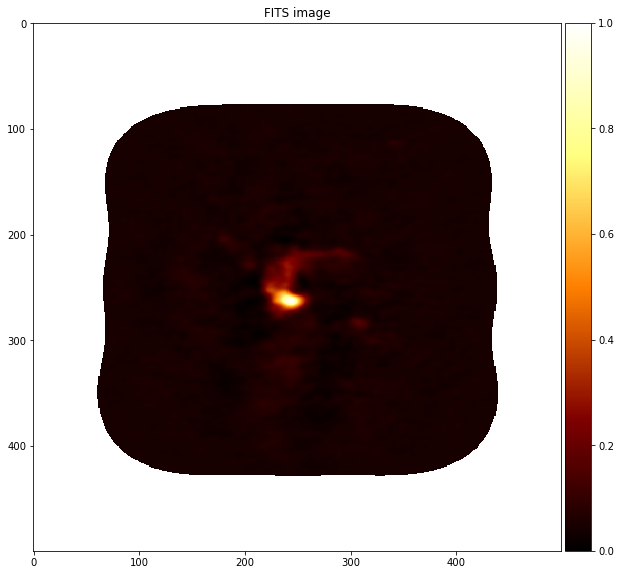

In [2]:
"""
Loading data
"""

fits_path = '../data/images/Antennae_North.CO3_2Line.Clean.pcal1.image.mom0.fits'
x, y, data, dfunc = load_data(fits_path)
image_plot(data)

In [3]:
base_level = estimate_rms(data)
interact(thresholded_image_plot, data=fixed(data), level=FloatSlider(min=base_level,max=1.,step=0.01,value=base_level))

/Users/mavillan/anaconda3/lib/python3.6/site-packages/numpy/ma/core.py:3902: FutureWarning: comparison to `None` will result in an elementwise object comparison in the future.
  check = self.filled(0).__eq__(other)


<function graph.thresholded_image_plot>

In [4]:
# max and min sigma allowed
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

method = 1
elm_list = list()

for Nc in range(50, 501, 25):
    # number of points of each type
    Nb = int(0.2*Nc)
    Ne = 4*Nc - Nb
    
    if method==1:
        # points generation
        center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
        collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        boundary_points = boundary_points_generation(data, base_level, Nb)
        
    elif method==2:    
        # points generation
        points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        center_points = points[0:Nc]
        collocation_points = points[0:Ne]
        boundary_points = boundary_points_generation(data, base_level, Nb)
    
    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]
    
#    # visualizing the choosen points
#    points_plot(data, center_points=center_points, title="Center Points")
#    points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


#    solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#    params_plot(c0, sig0, xc, yc)
#    params_distribution_plot(c0, sig0)
    elm_list.append(ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0., b=0., d1psi1=d1psi, 
                    d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1., minsig=minsig, maxsig=maxsig))

../lib/points_generation.py:29: RuntimeWarning: invalid value encountered in less_equal
  mask = data <= base_level
../lib/points_generation.py:106: RuntimeWarning: invalid value encountered in greater
  pixel_map = data > base_level
../lib/variational.py:79: RuntimeWarning: invalid value encountered in greater
  self.mask = data > base_level


##########################################################################################
Processing 50 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 20100.
nfev: 20111

Residual stats:
Residual RMS: 0.11321112435167113
Residual Variance: 0.0128067871181713
Flux Lost: 0.0887094076845271
Flux Addition: 0.11170898382515408
psi1(u-f): 47.876474516452376
Exceeded Pixels: 2602
Sharpness: 136.45583295510832
psi2(grad u): 57.66870603941738
Total elapsed time: 4.841054916381836 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.23437567170328838
Mean min distance between collocation and center points: 0

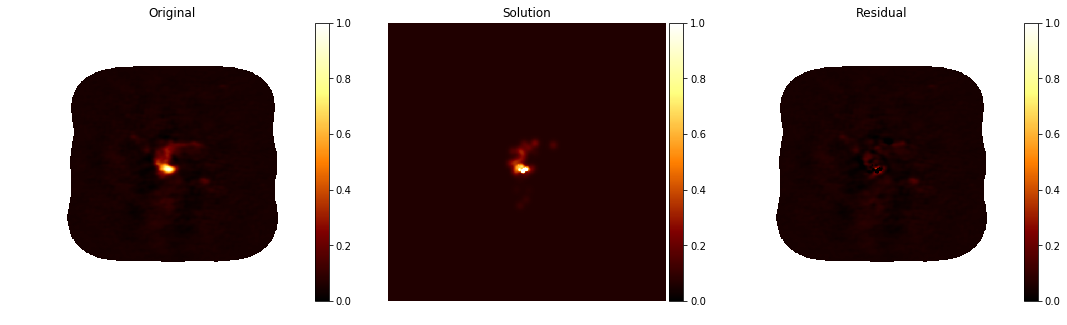

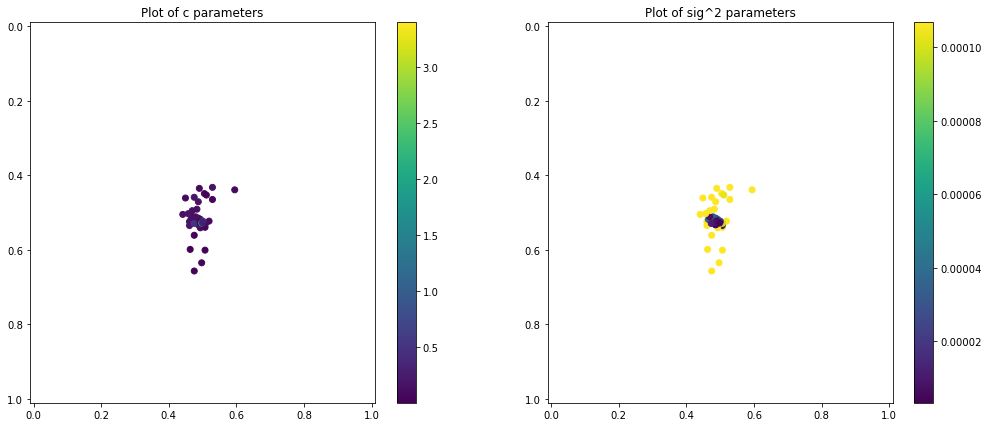

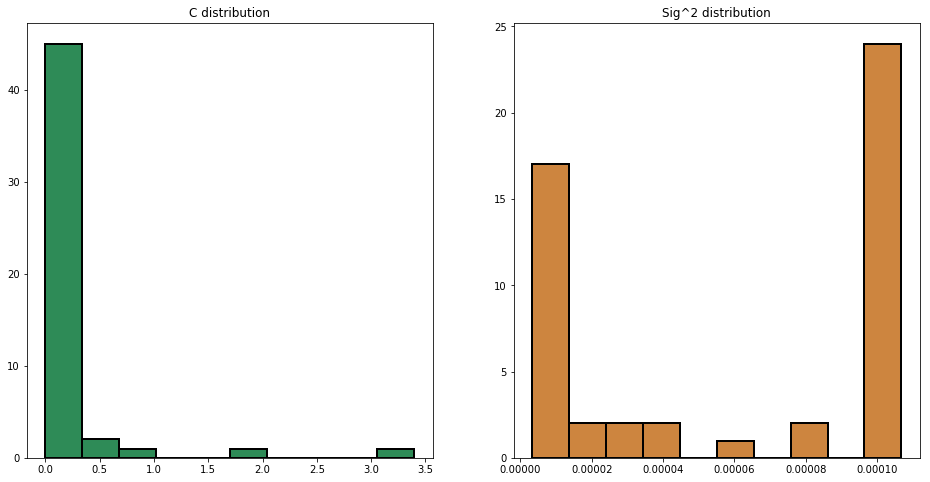

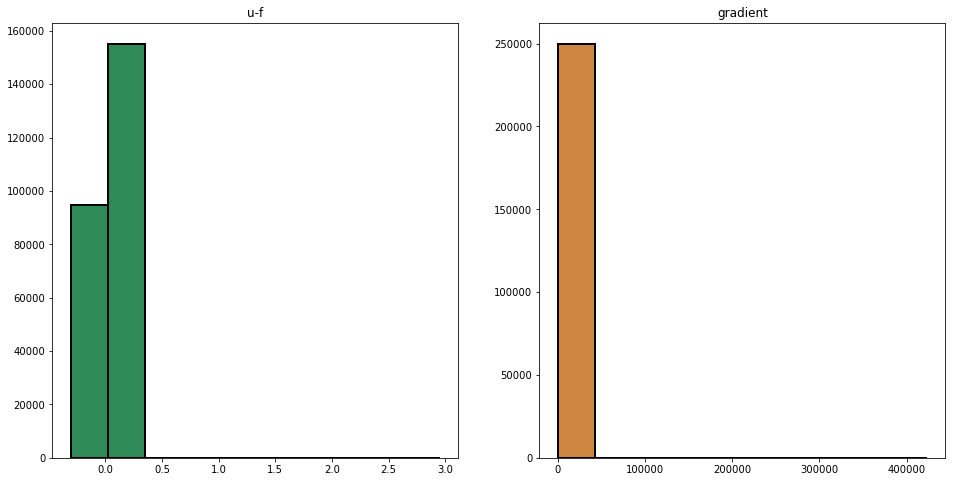

##########################################################################################
Processing 75 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 30100.
nfev: 30111

Residual stats:
Residual RMS: 0.1572570512981935
Residual Variance: 0.024689815682140348
Flux Lost: 0.07109204625332942
Flux Addition: 0.11713630670384152
psi1(u-f): 46.28703862871588
Exceeded Pixels: 2692
Sharpness: 144.5940213246786
psi2(grad u): 58.43517093803026
Total elapsed time: 11.0560622215271 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.23437567170328838
Mean min distance between collocation and center points: 0.

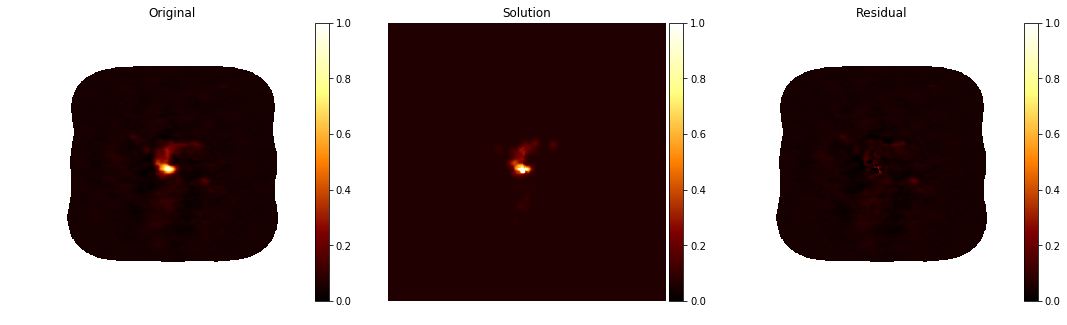

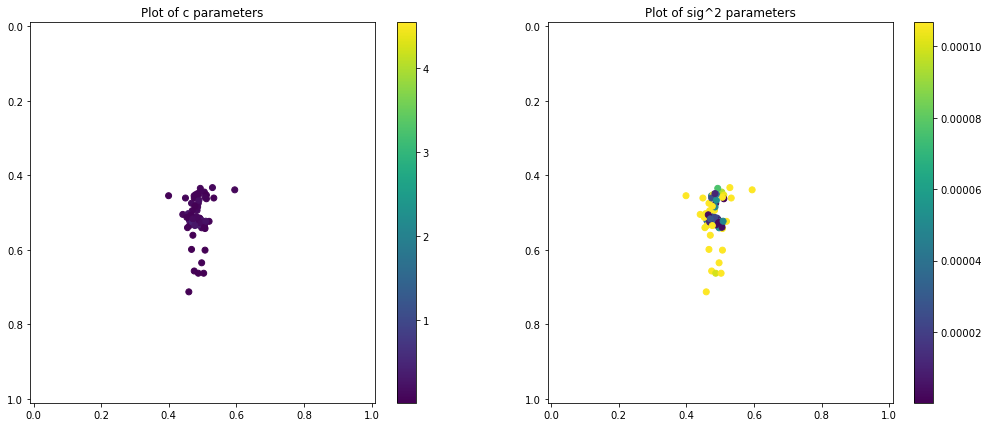

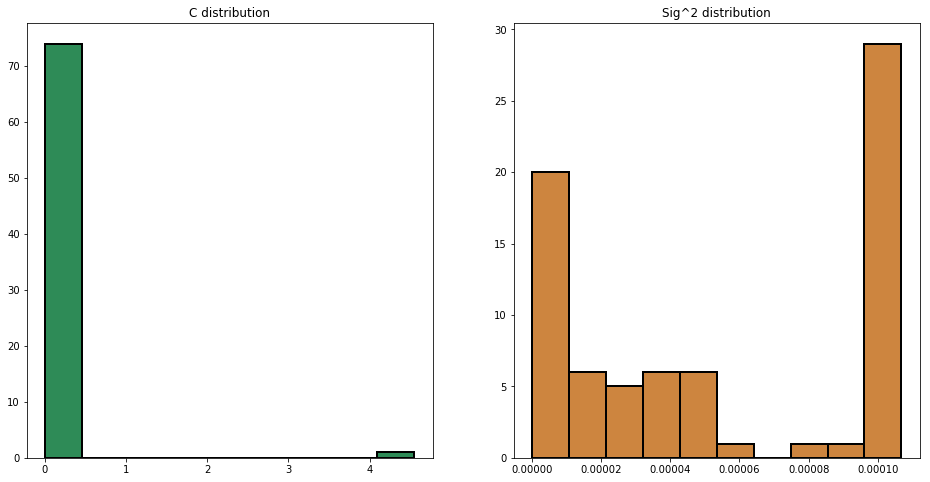

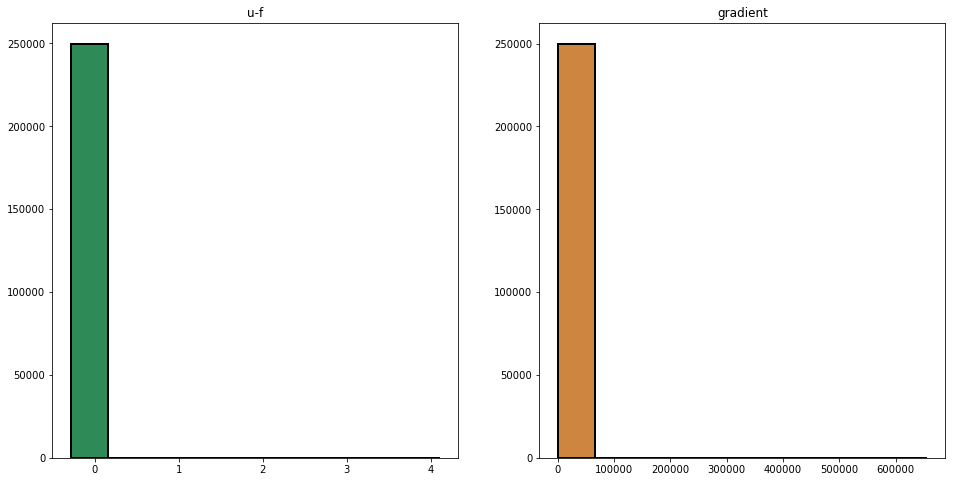

##########################################################################################
Processing 100 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 40100.
nfev: 40112

Residual stats:
Residual RMS: 0.022803547193378338
Residual Variance: 0.0005128491777031353
Flux Lost: 0.05489526812548638
Flux Addition: 0.03541612374382028
psi1(u-f): 2.4156431029363223
Exceeded Pixels: 2783
Sharpness: 93.30721127041062
psi2(grad u): 4.726925875715209
Total elapsed time: 21.596132516860962 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.23562721573662537
Mean min distance between collocation and center poi

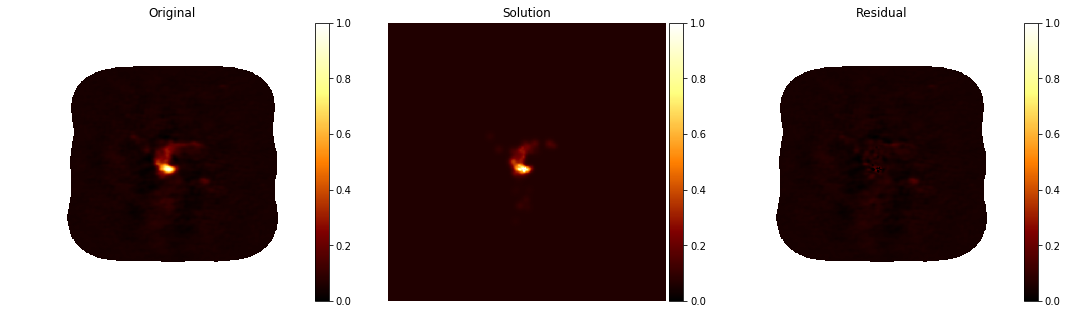

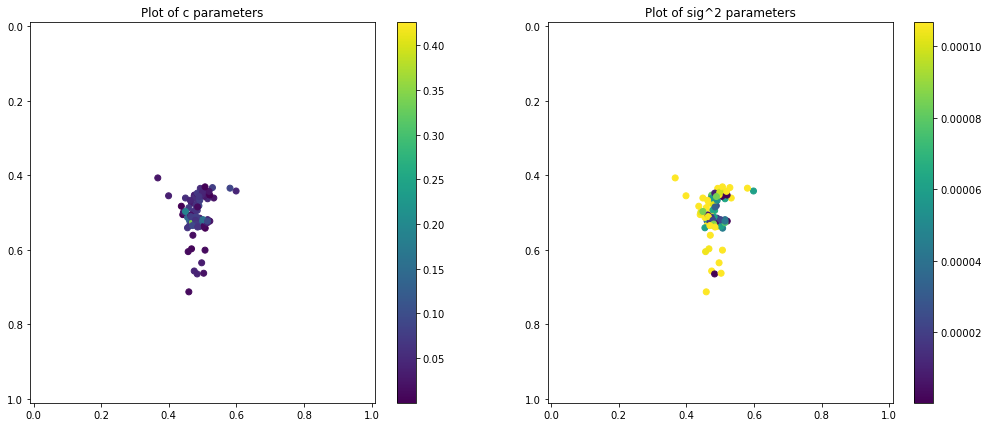

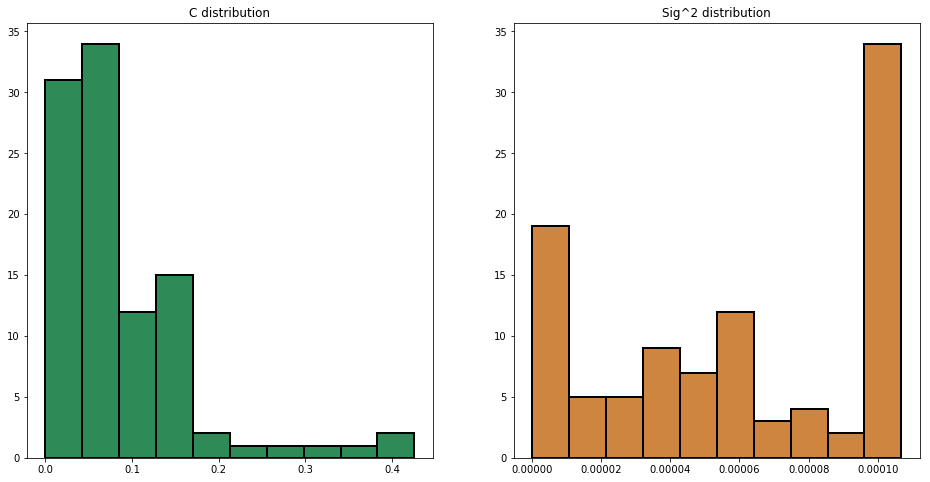

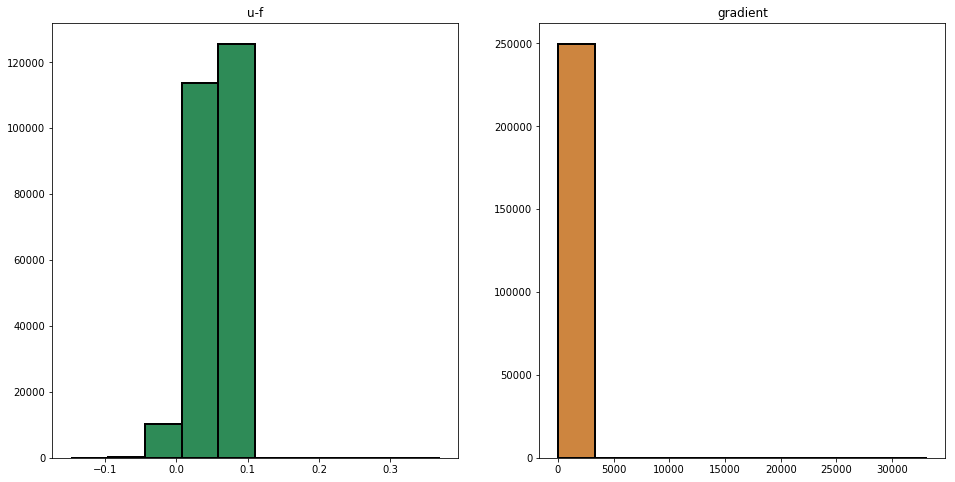

##########################################################################################
Processing 125 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 50100.
nfev: 50111

Residual stats:
Residual RMS: 0.02254121695453145
Residual Variance: 0.0005056366829903671
Flux Lost: 0.04417632179603294
Flux Addition: 0.0327299635425416
psi1(u-f): 3.4112475839028895
Exceeded Pixels: 2860
Sharpness: 96.98131574668442
psi2(grad u): 5.376605298577297
Total elapsed time: 36.8072030544281 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2355298626256601
Mean min distance between collocation and center points: 

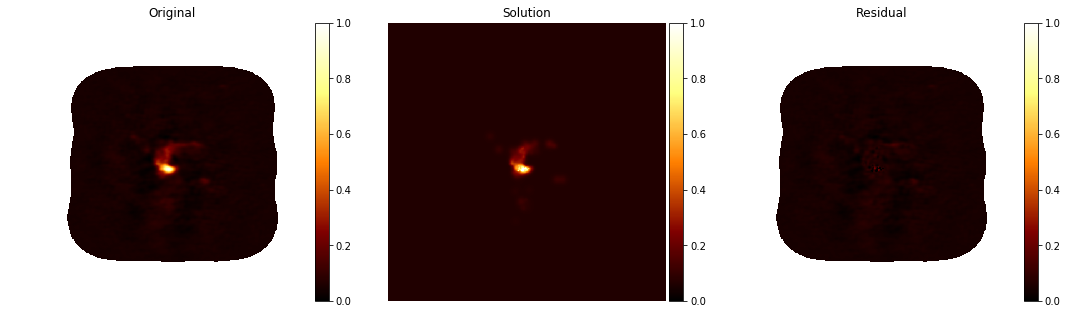

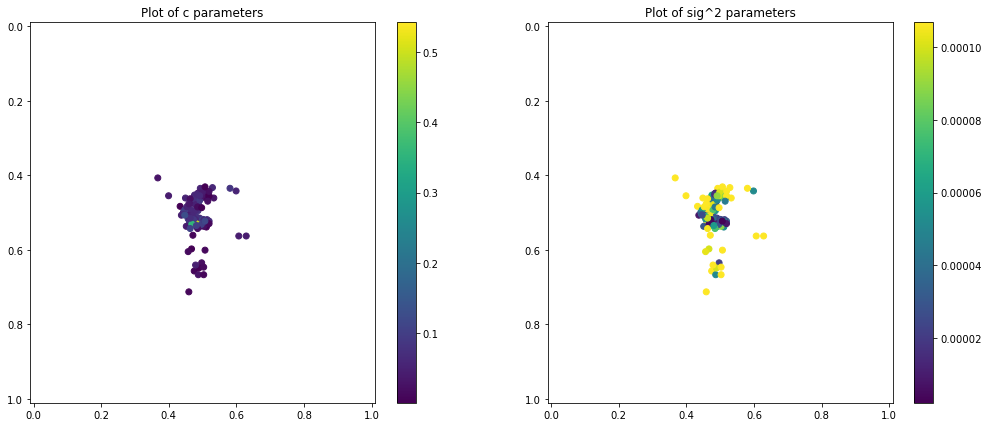

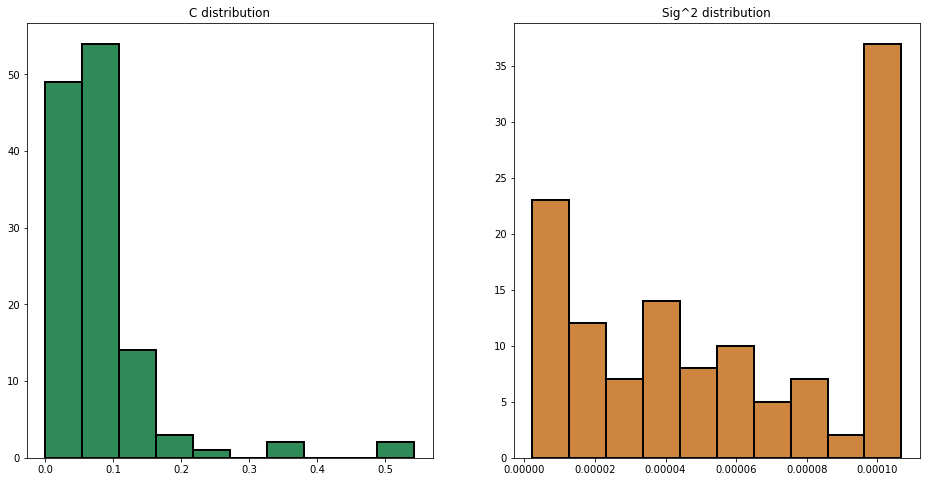

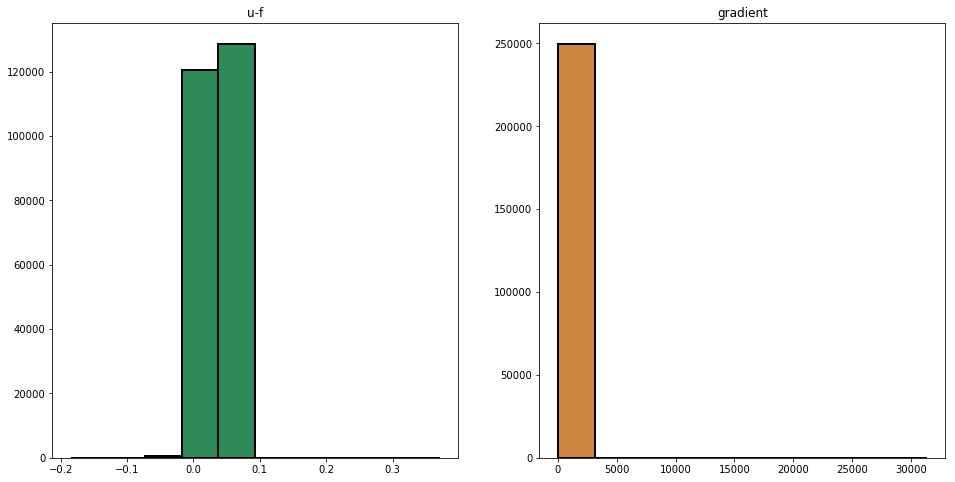

##########################################################################################
Processing 150 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 60100.
nfev: 60112

Residual stats:
Residual RMS: 0.028675256319058533
Residual Variance: 0.0008213999785409124
Flux Lost: 0.043409296070381125
Flux Addition: 0.03661437557521208
psi1(u-f): 6.680453020430006
Exceeded Pixels: 3099
Sharpness: 103.15058691324211
psi2(grad u): 8.046118682981838
Total elapsed time: 57.84823250770569 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.23461982754187133
Mean min distance between collocation and center poi

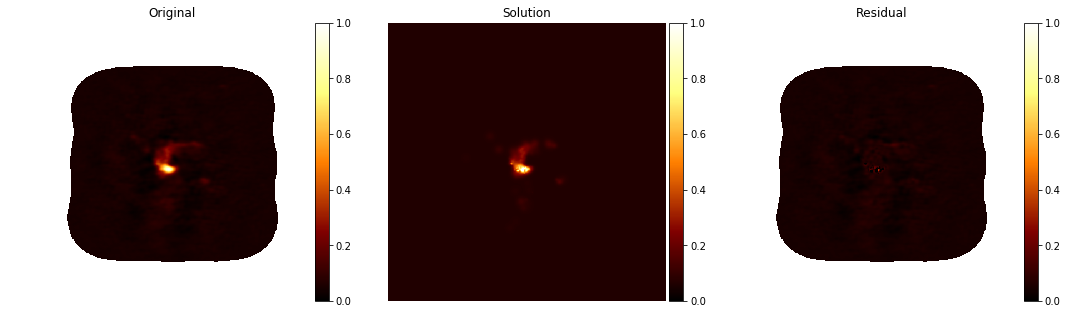

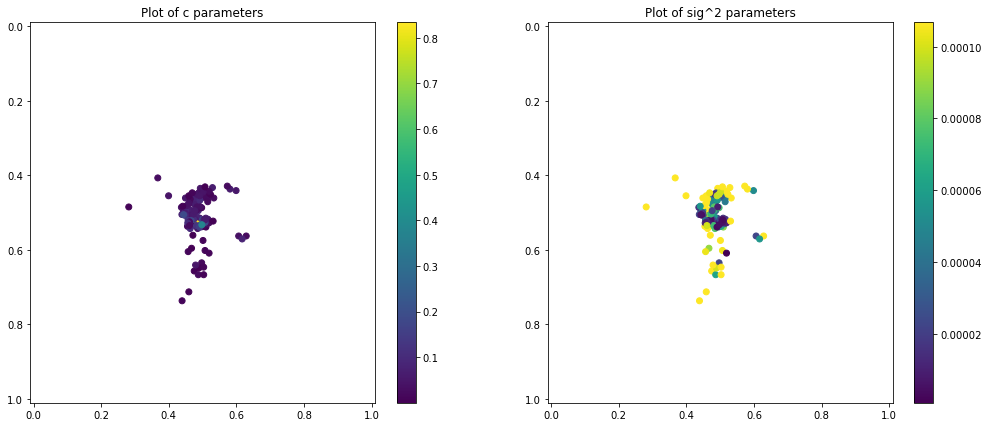

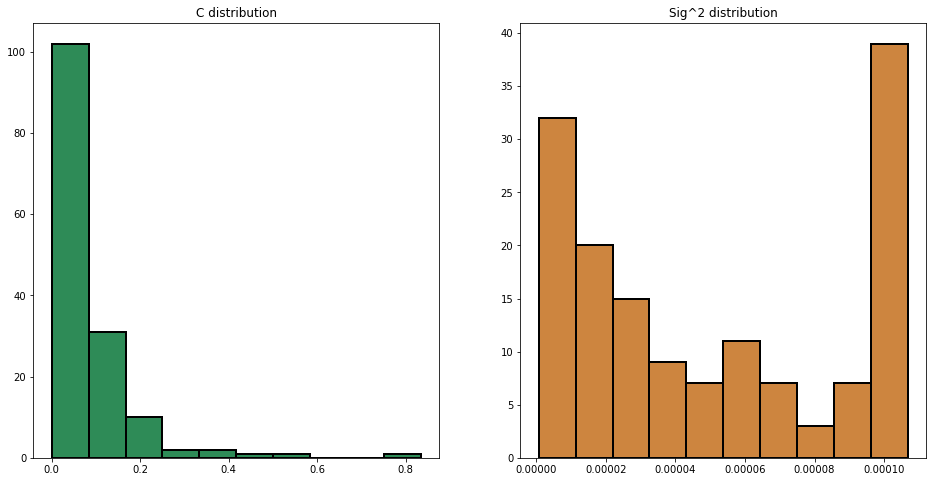

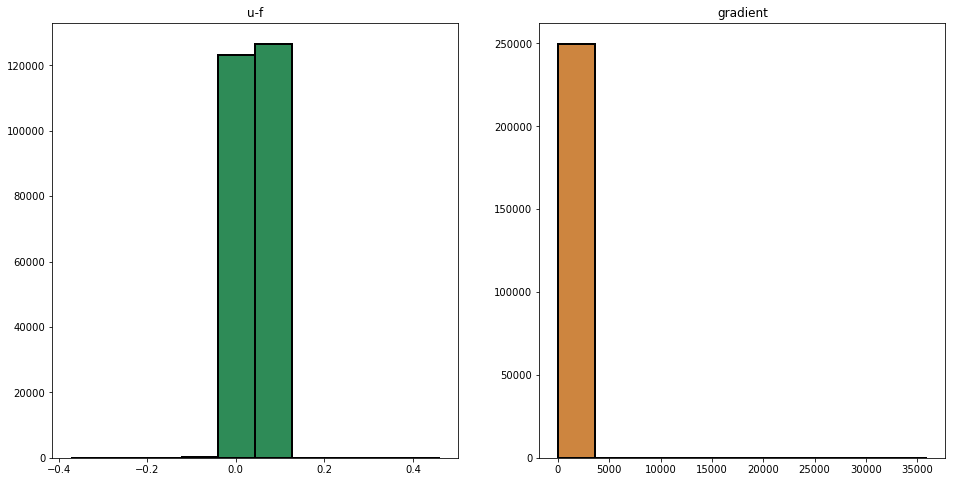

##########################################################################################
Processing 175 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 70100.
nfev: 70111

Residual stats:
Residual RMS: 0.029068928960973208
Residual Variance: 0.0008444755261814538
Flux Lost: 0.040836622915784014
Flux Addition: 0.03554867982098789
psi1(u-f): 6.703791332790301
Exceeded Pixels: 3277
Sharpness: 105.138776485988
psi2(grad u): 7.977937078537013
Total elapsed time: 85.45679187774658 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.23256797930528567
Mean min distance between collocation and center point

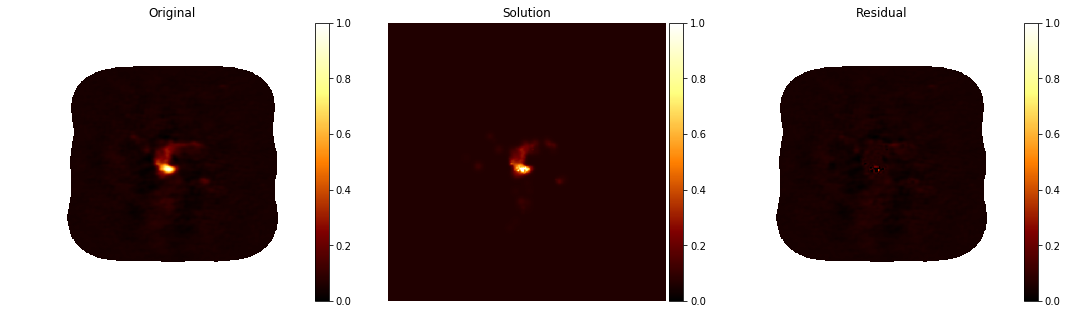

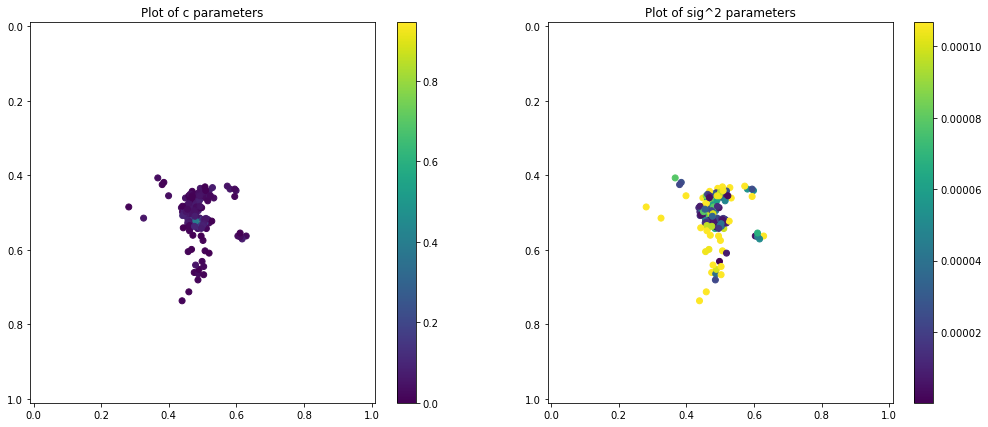

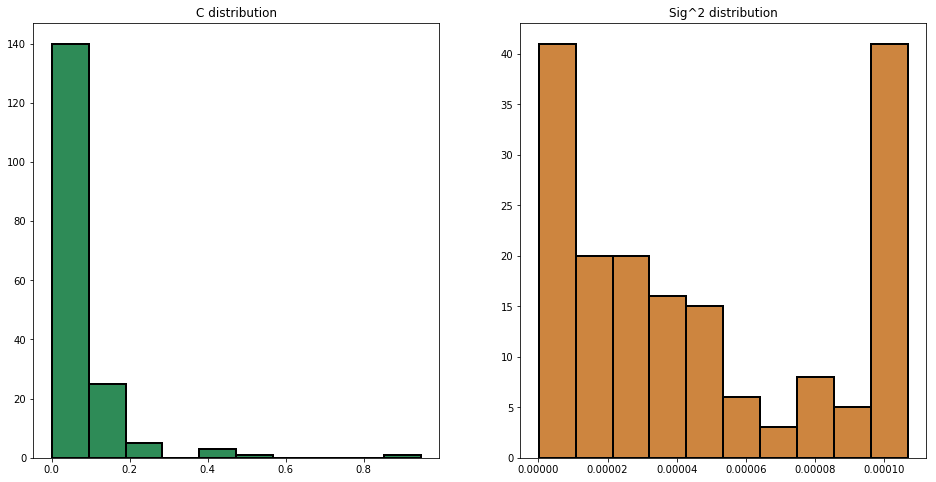

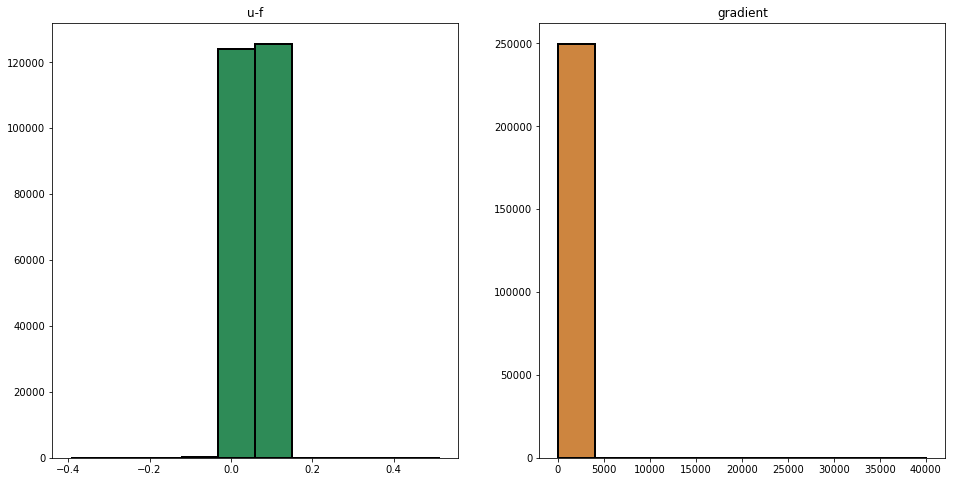

##########################################################################################
Processing 200 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80109

Residual stats:
Residual RMS: 0.017598725733593067
Residual Variance: 0.000308704676581647
Flux Lost: 0.03249033485990382
Flux Addition: 0.02516883255983744
psi1(u-f): 1.3301953653052694
Exceeded Pixels: 3302
Sharpness: 96.69092823078047
psi2(grad u): 4.273266867723631
Total elapsed time: 126.60081005096436 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2285754313953728
Mean min distance between collocation and center point

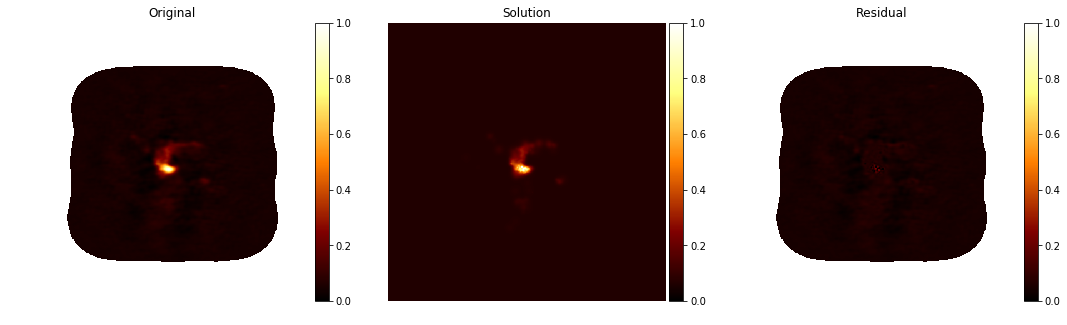

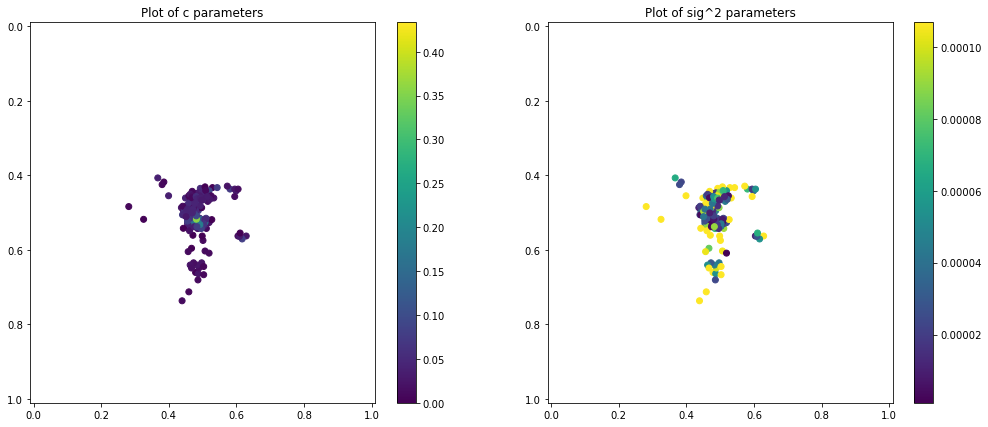

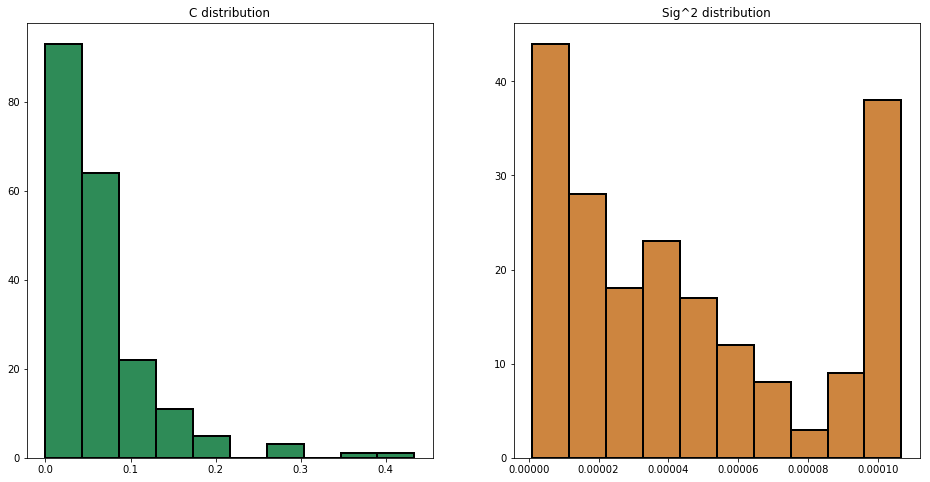

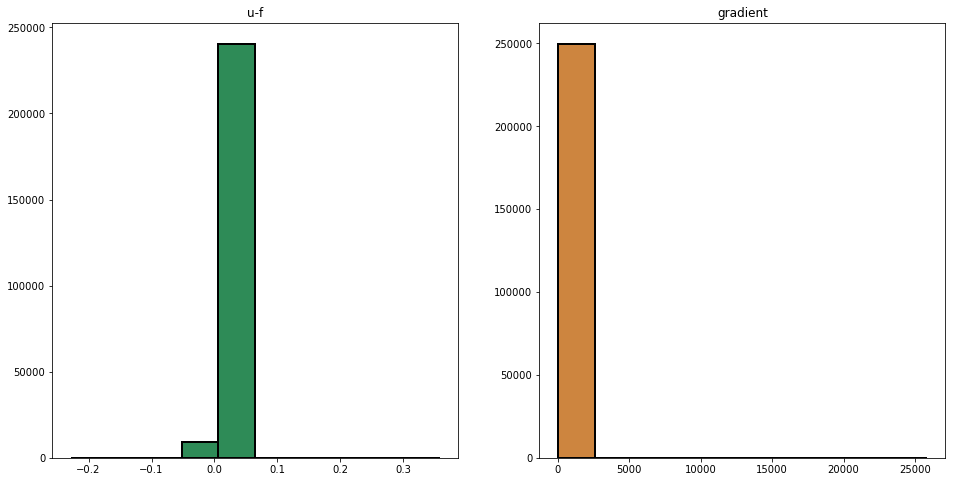

##########################################################################################
Processing 225 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 90100.
nfev: 90115

Residual stats:
Residual RMS: 0.01542736502414716
Residual Variance: 0.000237562304726478
Flux Lost: 0.029501112888147895
Flux Addition: 0.024662745925353634
psi1(u-f): 0.7602954330475401
Exceeded Pixels: 3394
Sharpness: 96.29515501581335
psi2(grad u): 3.3984964354901175
Total elapsed time: 180.50063824653625 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2285756039398377
Mean min distance between collocation and center poi

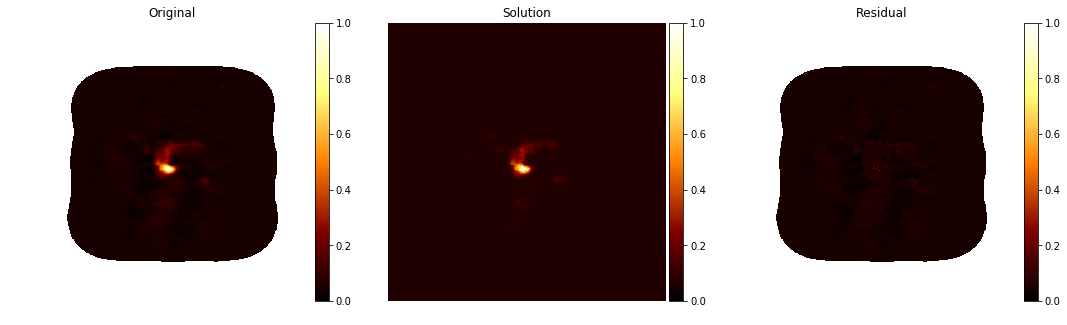

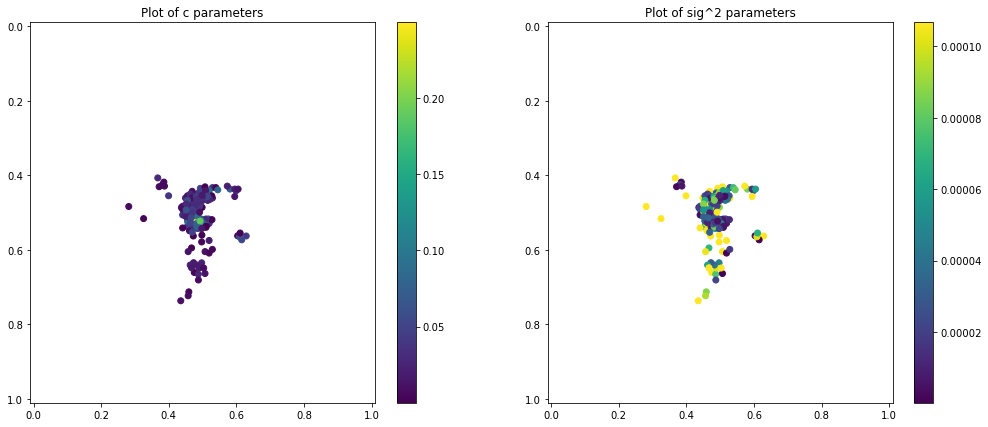

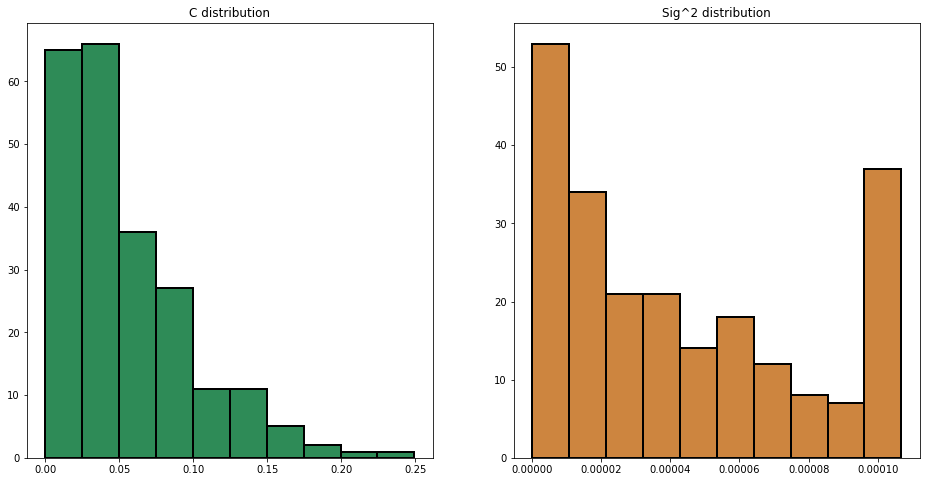

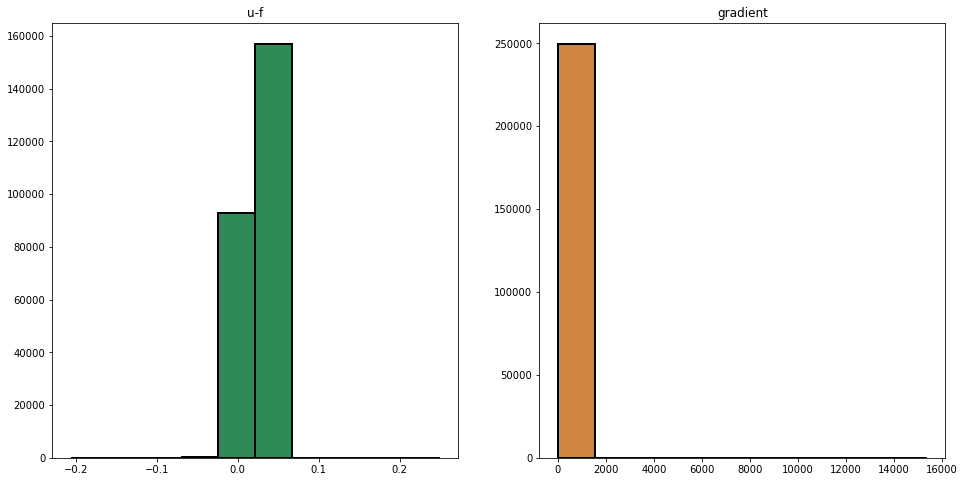

##########################################################################################
Processing 250 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100113

Residual stats:
Residual RMS: 0.01507595268408676
Residual Variance: 0.000226636380976853
Flux Lost: 0.029996744501091653
Flux Addition: 0.024133807820001584
psi1(u-f): 0.5047215439875283
Exceeded Pixels: 3403
Sharpness: 95.85718292196009
psi2(grad u): 3.2205339633055043
Total elapsed time: 247.1679332256317 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2285796569588777
Mean min distance between collocation and center po

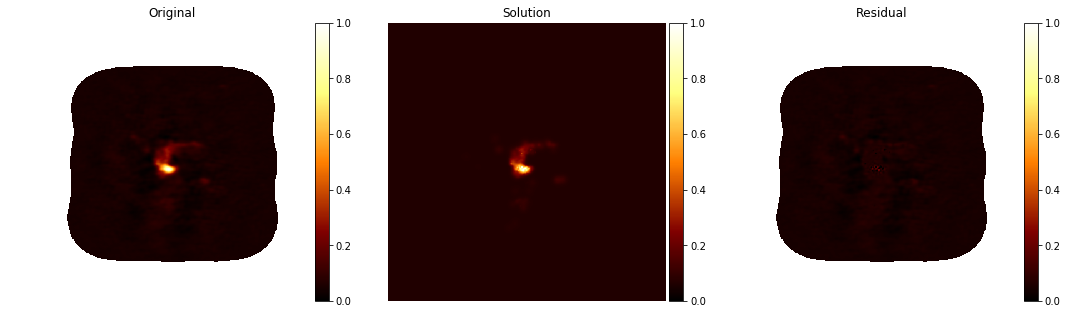

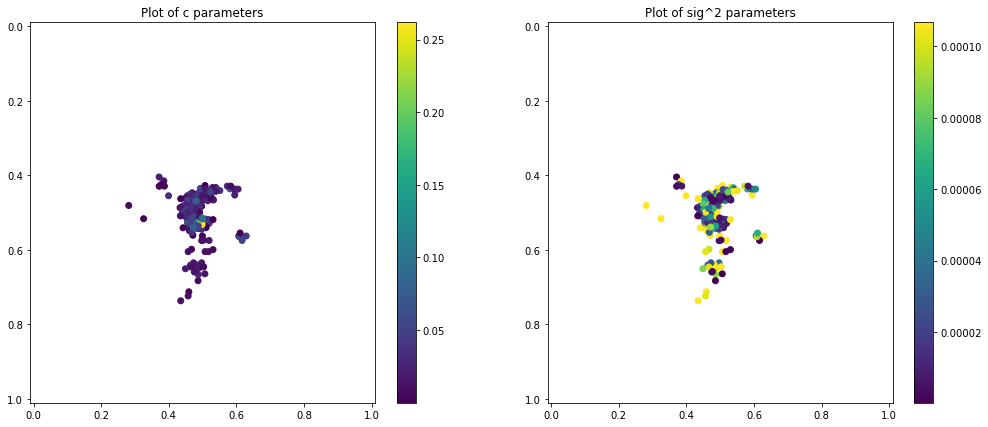

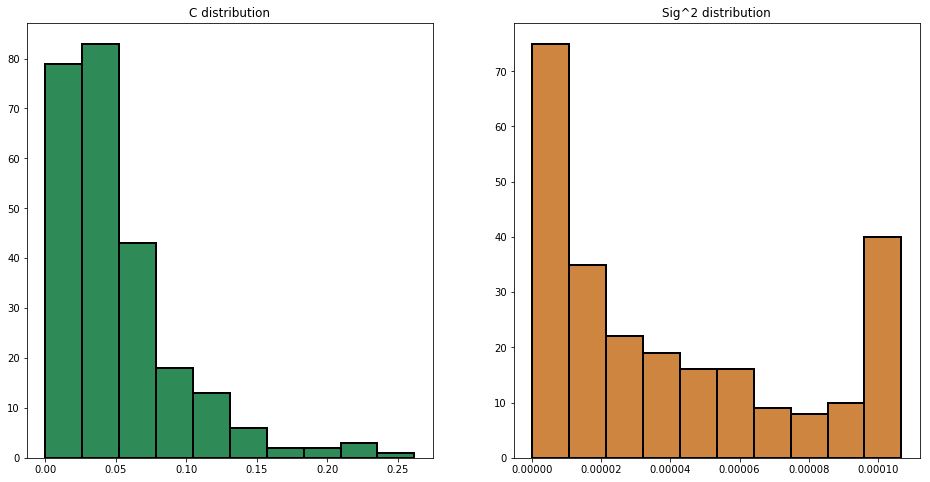

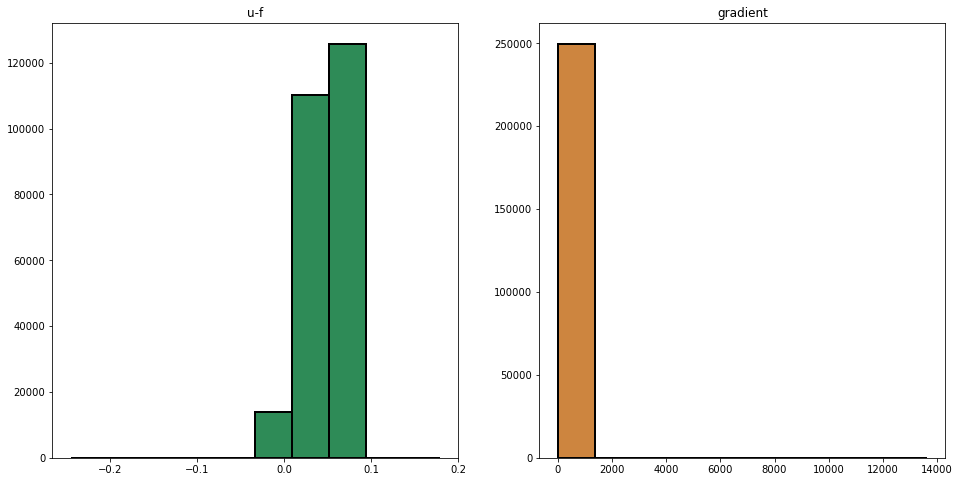

##########################################################################################
Processing 275 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 110100.
nfev: 110112

Residual stats:
Residual RMS: 0.012805413206540614
Residual Variance: 0.00016389035547696585
Flux Lost: 0.022281441294737612
Flux Addition: 0.020117724729445483
psi1(u-f): 0.5237671932888651
Exceeded Pixels: 3557
Sharpness: 96.58011751848126
psi2(grad u): 3.2155455306926473
Total elapsed time: 339.89634561538696 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.22857543064498523
Mean min distance between collocation and cent

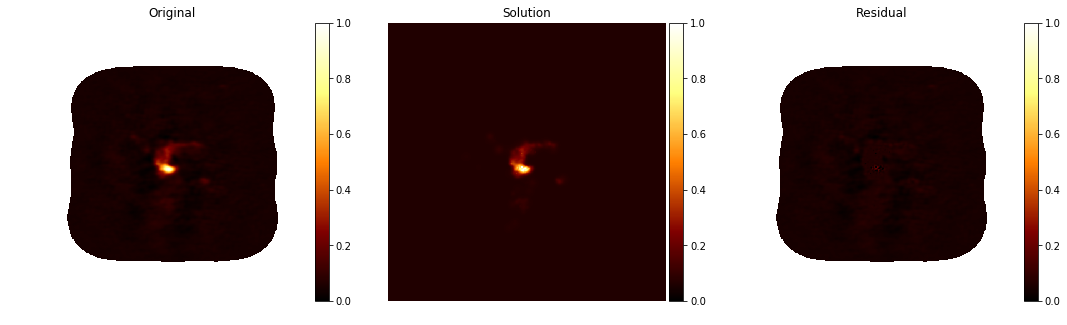

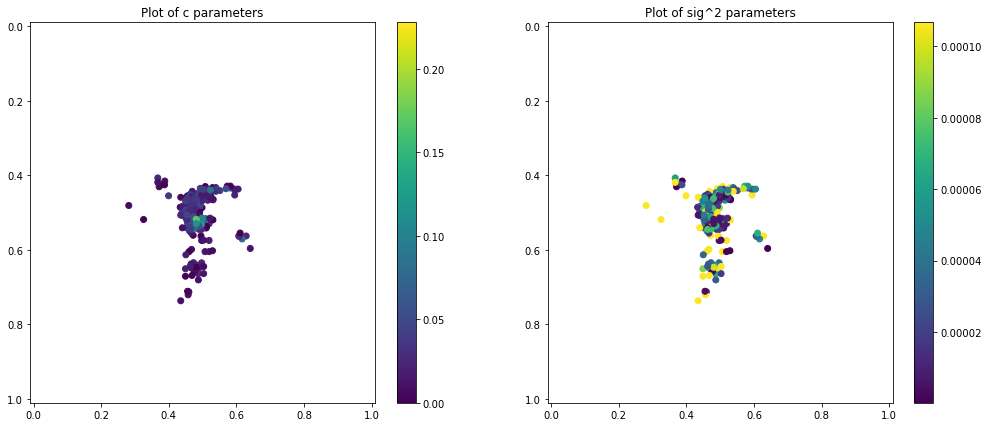

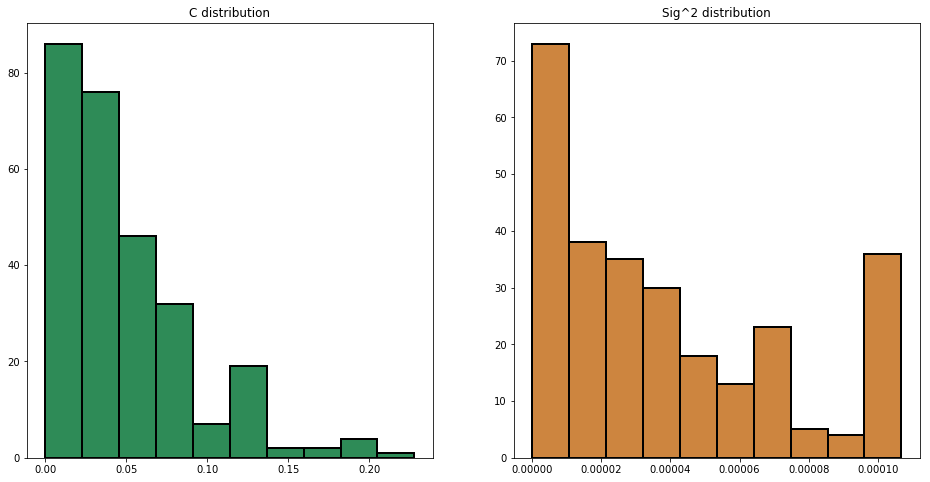

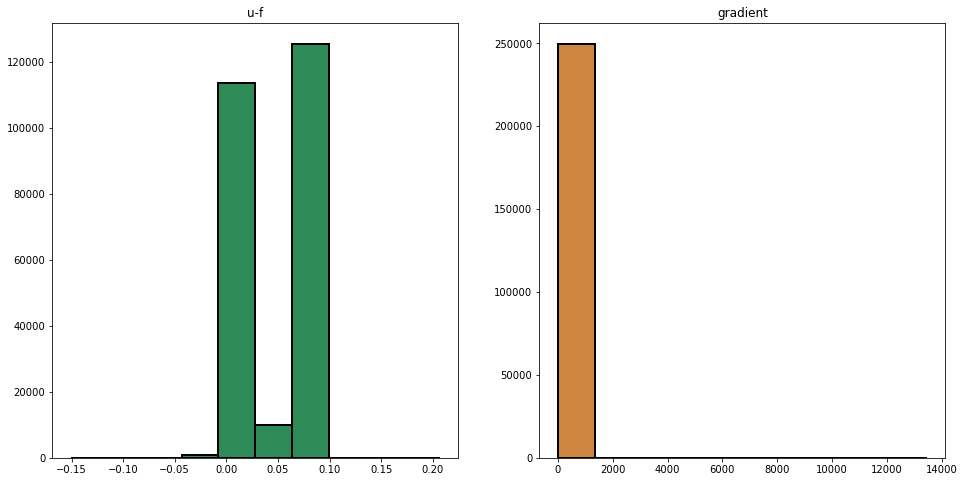

##########################################################################################
Processing 300 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120114

Residual stats:
Residual RMS: 0.010682003008988793
Residual Variance: 0.0001140648198862054
Flux Lost: 0.01956269618432865
Flux Addition: 0.0180993096249908
psi1(u-f): 0.2698682285320781
Exceeded Pixels: 3624
Sharpness: 95.69277376008158
psi2(grad u): 2.7107658413357205
Total elapsed time: 440.5739891529083 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2293478262281179
Mean min distance between collocation and center poi

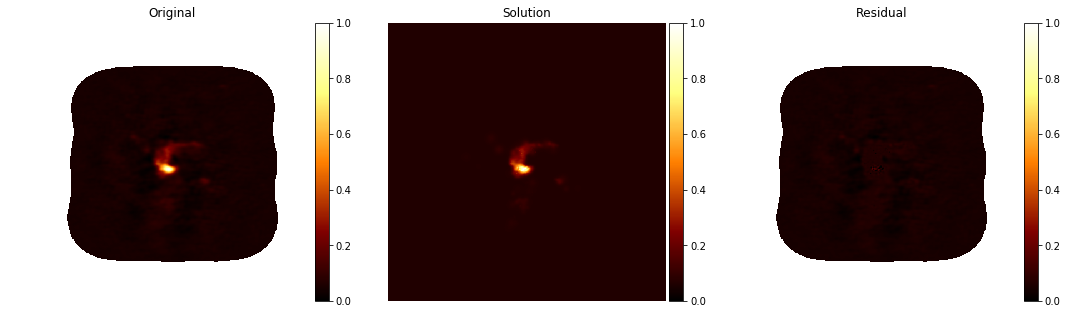

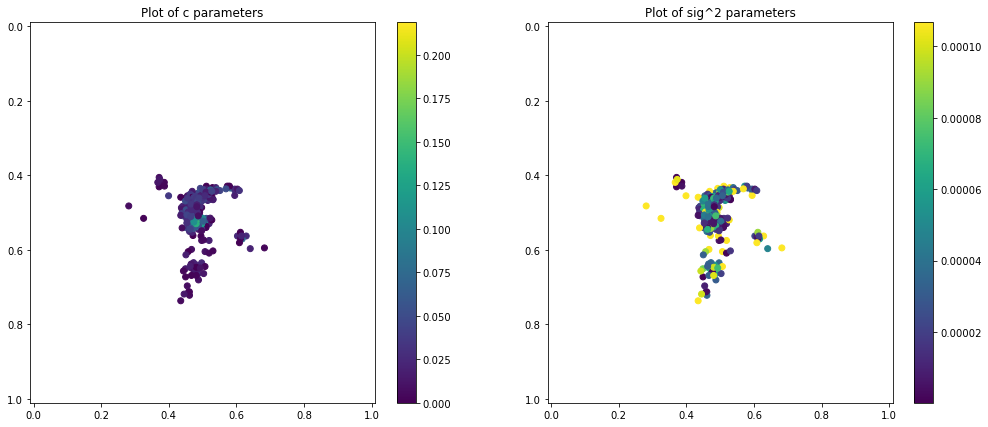

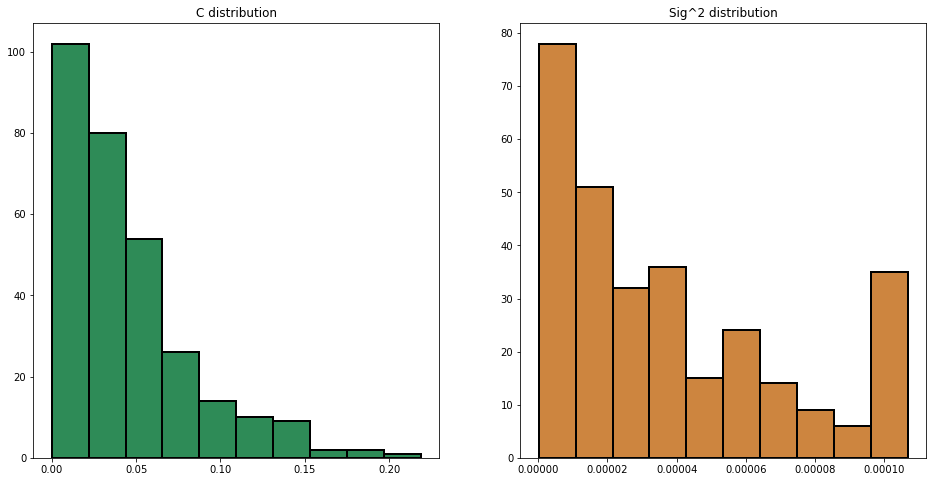

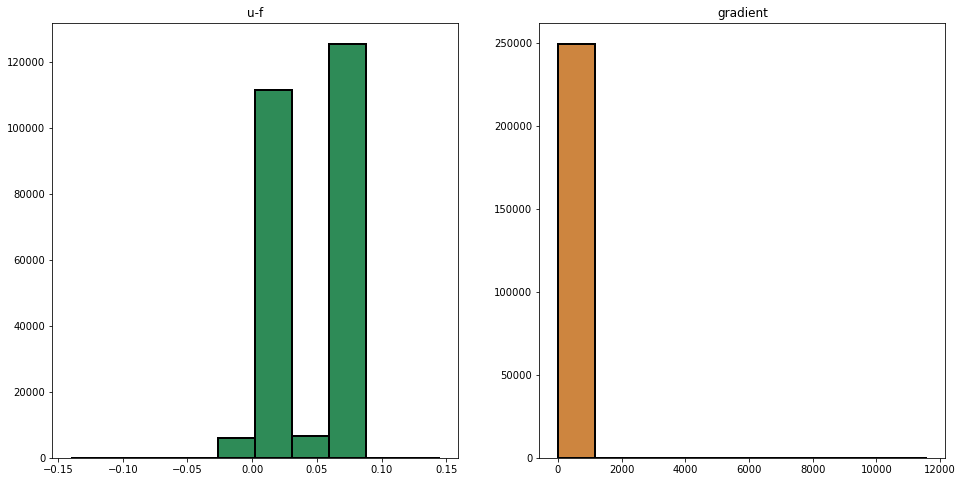

##########################################################################################
Processing 325 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 130100.
nfev: 130111

Residual stats:
Residual RMS: 0.010331651470682894
Residual Variance: 0.00010660870324102794
Flux Lost: 0.01894117273040095
Flux Addition: 0.01627181474217609
psi1(u-f): 0.20634683700456413
Exceeded Pixels: 3592
Sharpness: 94.81587633069185
psi2(grad u): 2.6951685018554223
Total elapsed time: 556.6067430973053 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.23001108357475322
Mean min distance between collocation and center

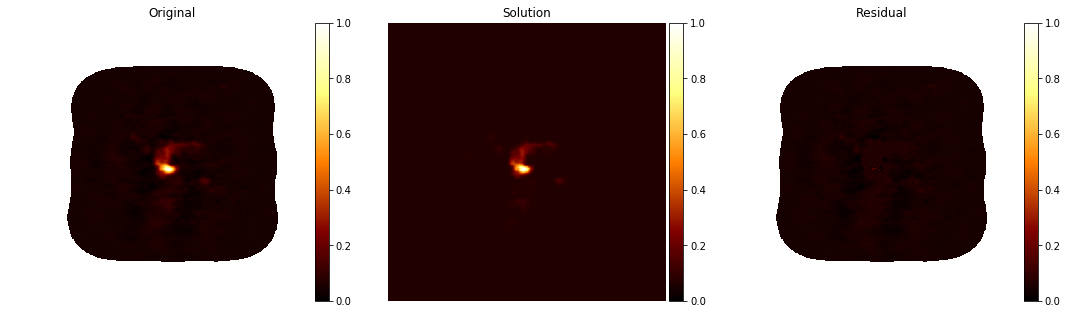

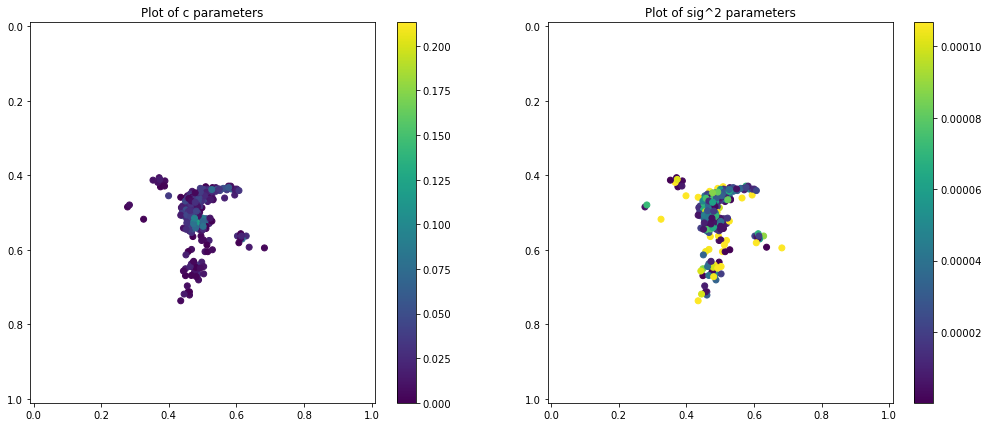

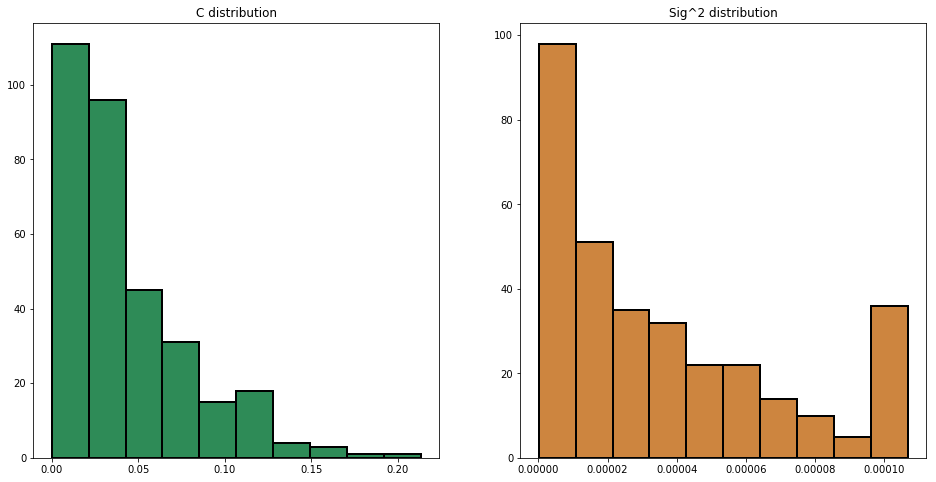

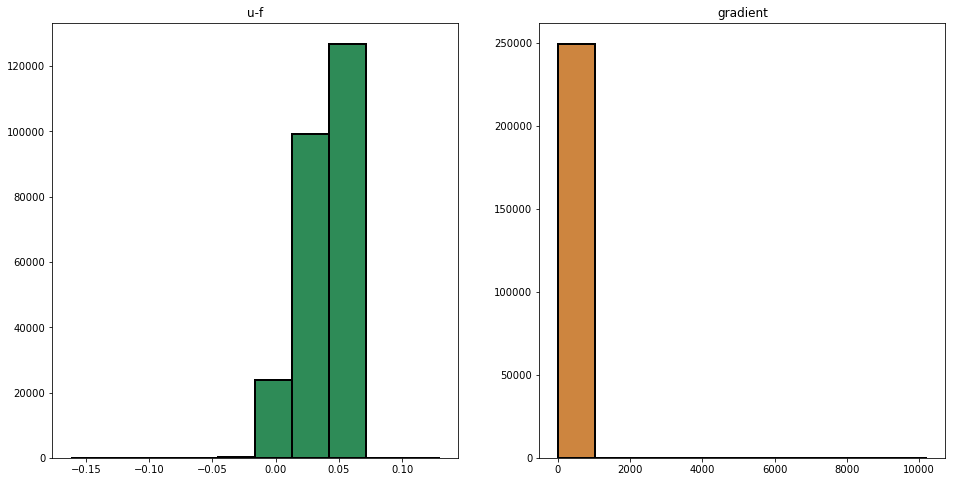

##########################################################################################
Processing 350 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 140100.
nfev: 140112

Residual stats:
Residual RMS: 0.010827108080368351
Residual Variance: 0.00011718973694881033
Flux Lost: 0.01802541006805017
Flux Addition: 0.016633287043598143
psi1(u-f): 0.26382902473344955
Exceeded Pixels: 3614
Sharpness: 95.55046762462779
psi2(grad u): 2.7783157022992535
Total elapsed time: 669.2337377071381 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.23013035302474927
Mean min distance between collocation and cente

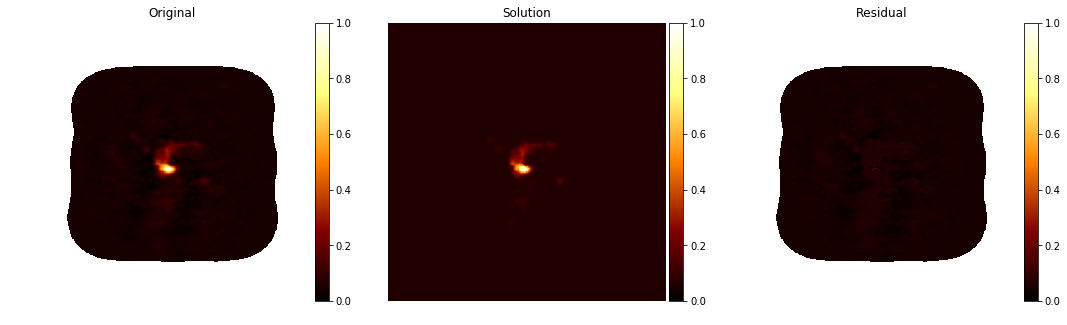

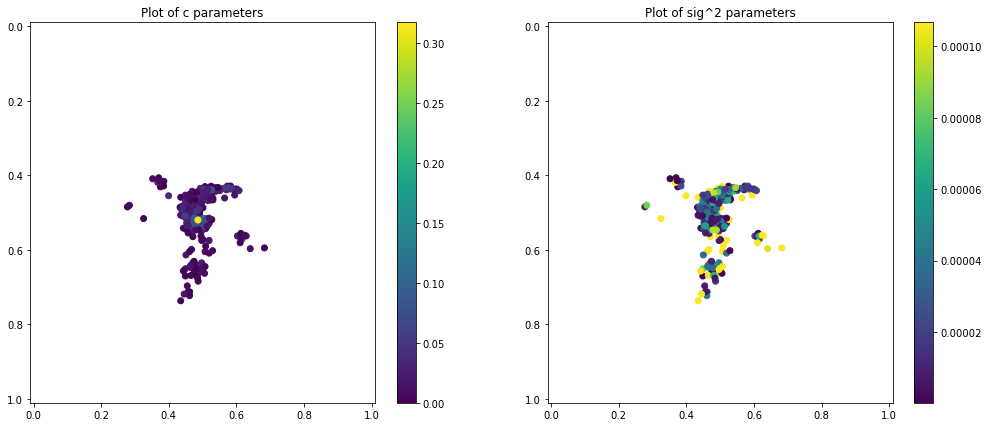

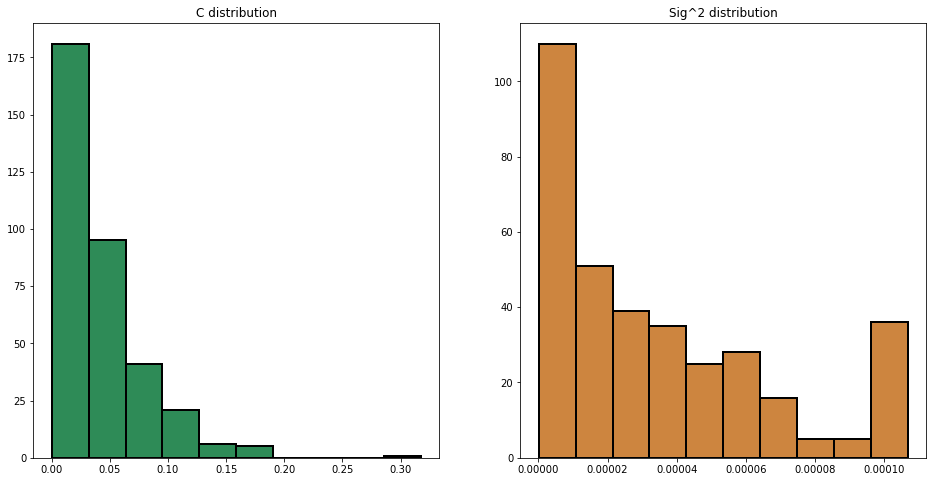

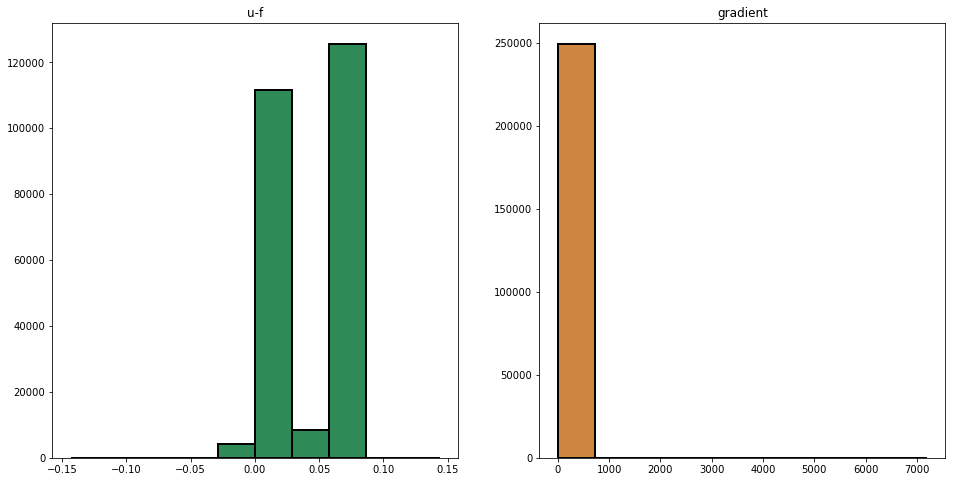

##########################################################################################
Processing 375 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 150100.
nfev: 150114

Residual stats:
Residual RMS: 0.009944157366882849
Residual Variance: 9.875153805736799e-05
Flux Lost: 0.017622320433105954
Flux Addition: 0.014948903337752156
psi1(u-f): 0.151717013586476
Exceeded Pixels: 3667
Sharpness: 95.11555279831754
psi2(grad u): 2.650518630430111
Total elapsed time: 874.3065433502197 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.22925511409020985
Mean min distance between collocation and center p

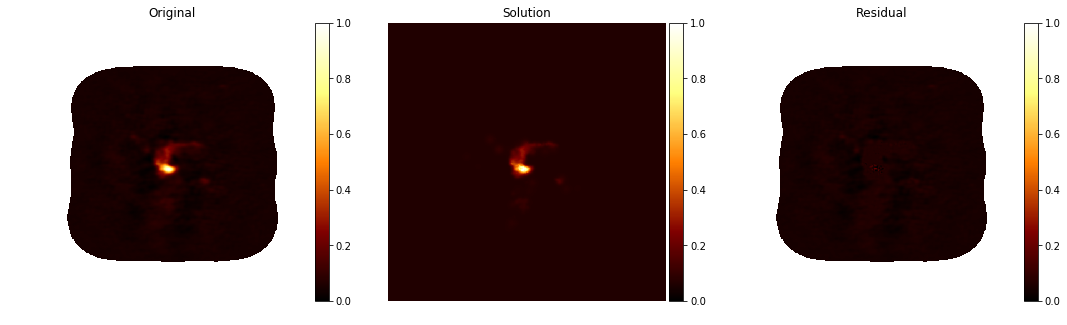

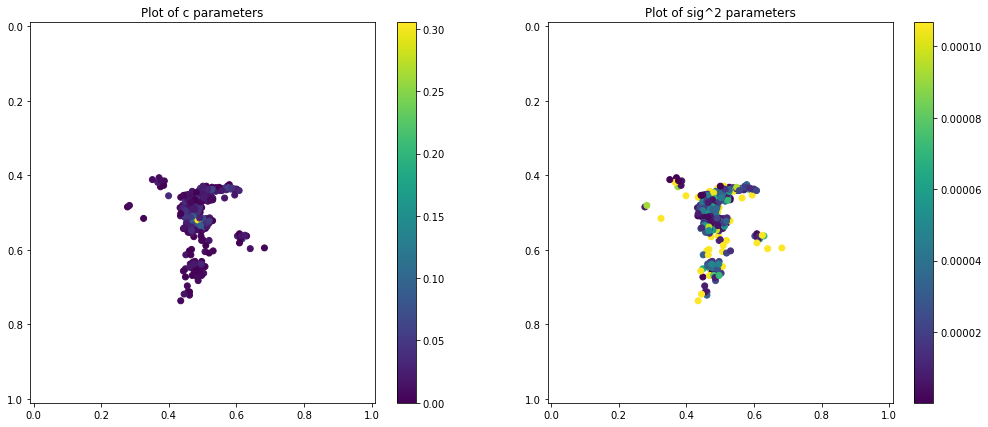

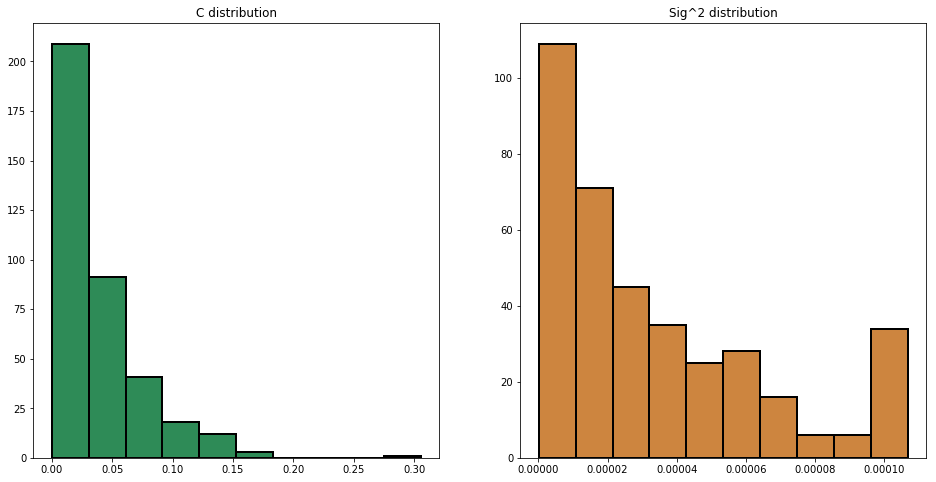

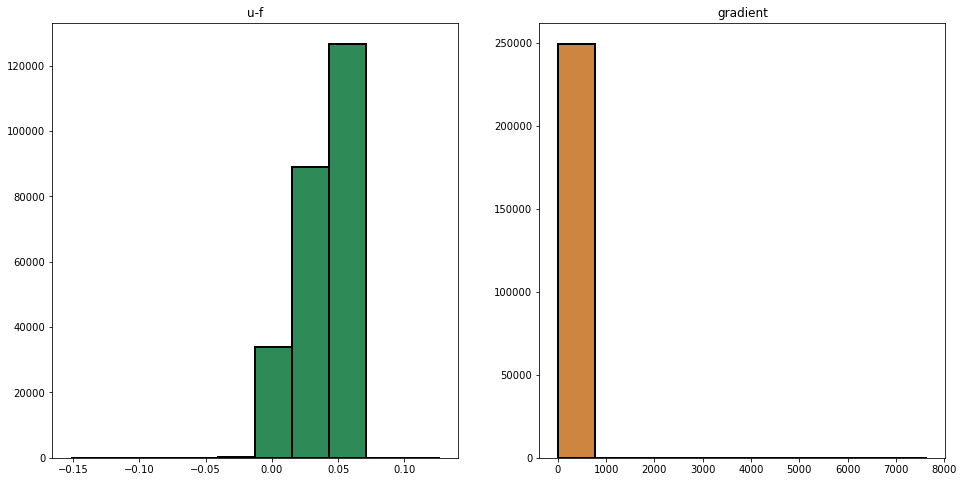

##########################################################################################
Processing 400 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 160100.
nfev: 160112

Residual stats:
Residual RMS: 0.008913092312105922
Residual Variance: 7.94400640097051e-05
Flux Lost: 0.015127324492135915
Flux Addition: 0.01471850480847918
psi1(u-f): 0.16387875286060638
Exceeded Pixels: 3721
Sharpness: 95.17504684887061
psi2(grad u): 2.580994038828006
Total elapsed time: 1039.3966827392578 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2301306448623198
Mean min distance between collocation and center p

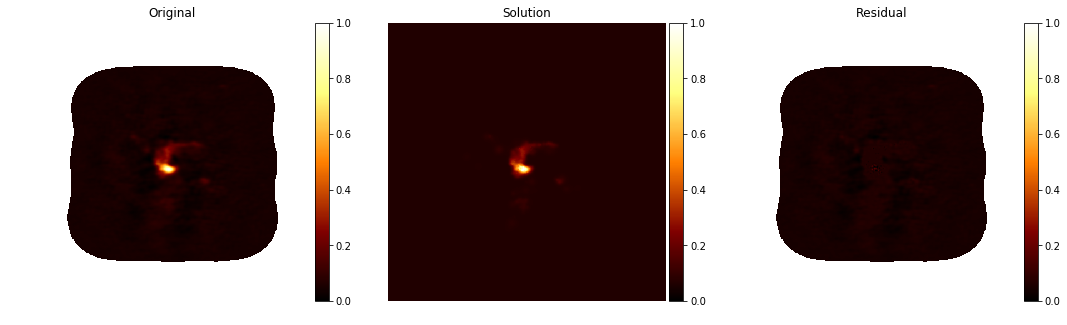

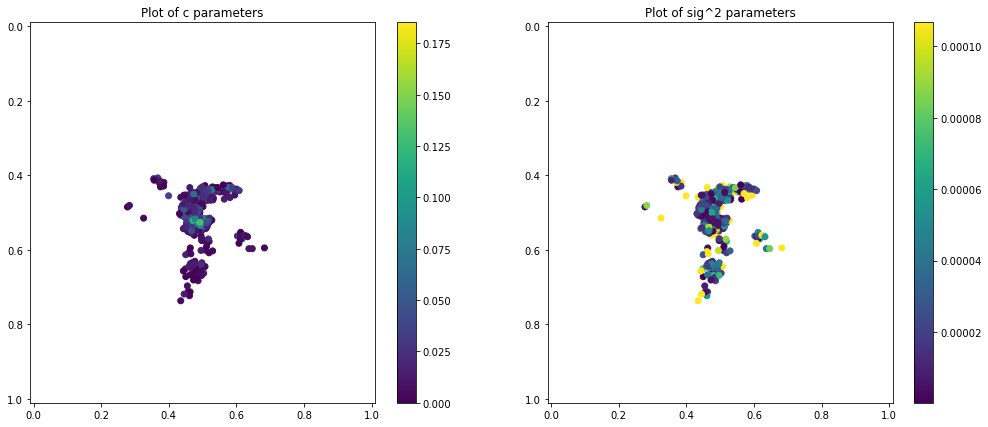

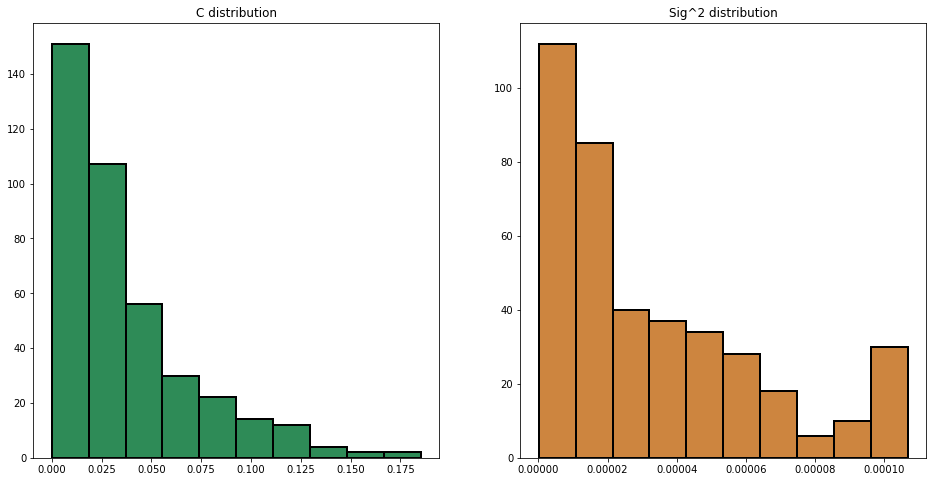

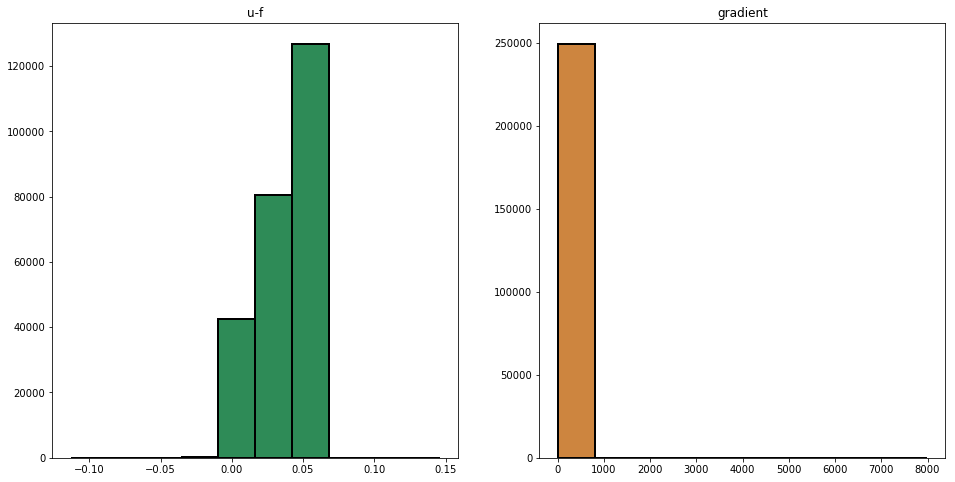

##########################################################################################
Processing 425 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 170100.
nfev: 170113

Residual stats:
Residual RMS: 0.006333875510323569
Residual Variance: 4.0115707963447745e-05
Flux Lost: 0.01242236304659835
Flux Addition: 0.012075267947572124
psi1(u-f): 0.042750146131979194
Exceeded Pixels: 3661
Sharpness: 94.75550607500416
psi2(grad u): 2.3325553586591274
Total elapsed time: 1242.6029150485992 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.23013057692935243
Mean min distance between collocation and cen

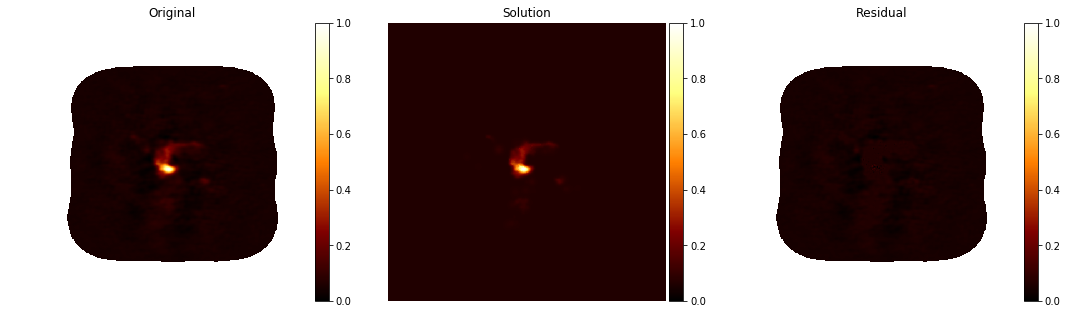

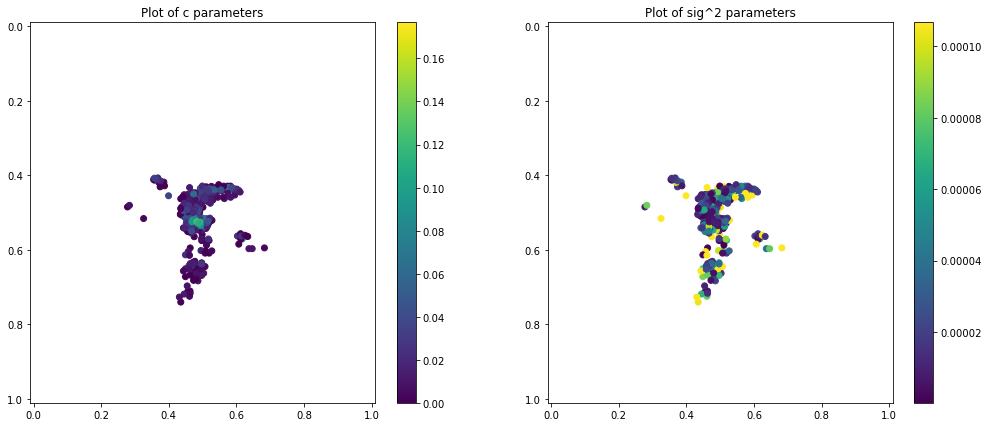

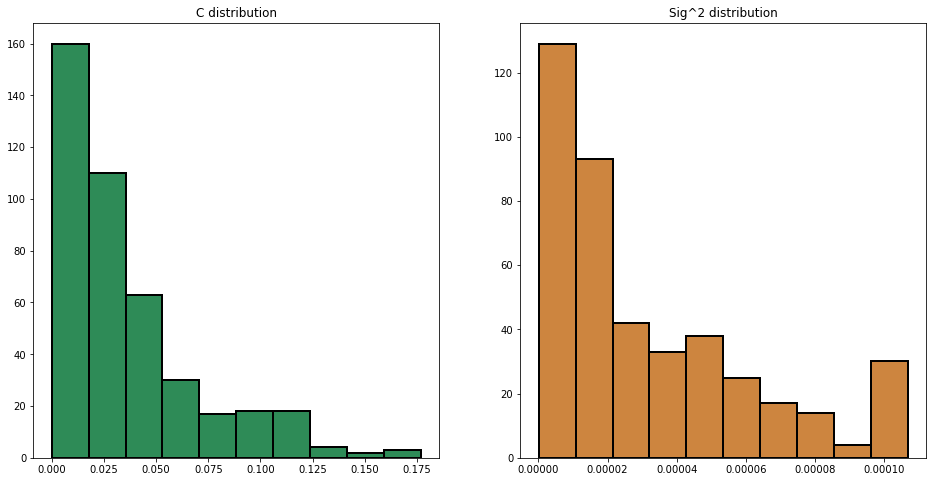

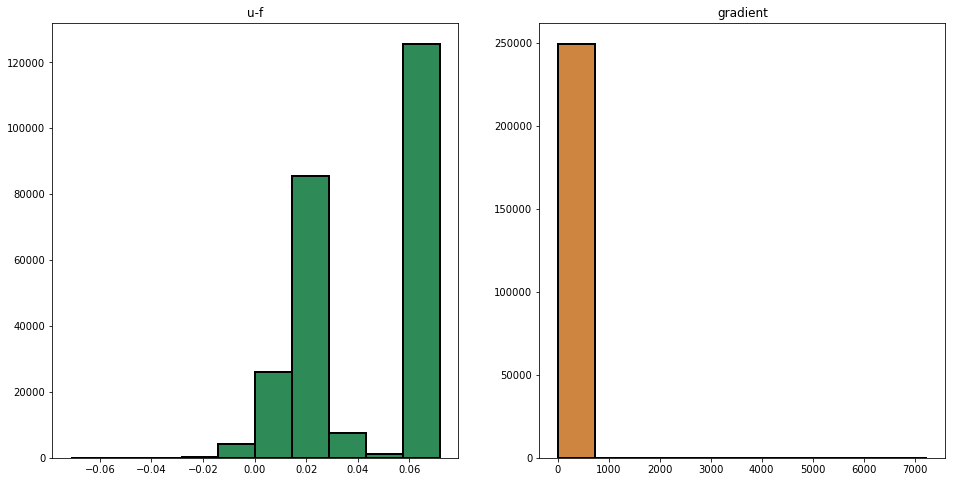

##########################################################################################
Processing 450 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 180100.
nfev: 180114

Residual stats:
Residual RMS: 0.00547170661281855
Residual Variance: 2.9939513767651746e-05
Flux Lost: 0.010998728048650944
Flux Addition: 0.010942551242693914
psi1(u-f): 0.02462824132762441
Exceeded Pixels: 3694
Sharpness: 94.51038440307252
psi2(grad u): 2.298485354241015
Total elapsed time: 1514.2986416816711 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.23013049241380362
Mean min distance between collocation and cente

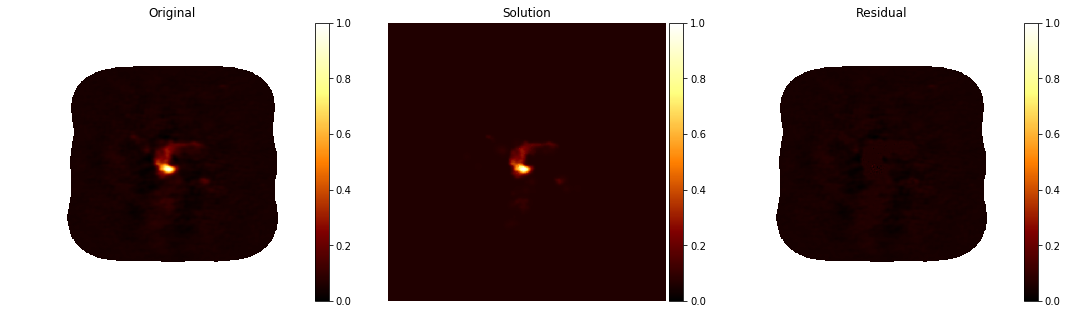

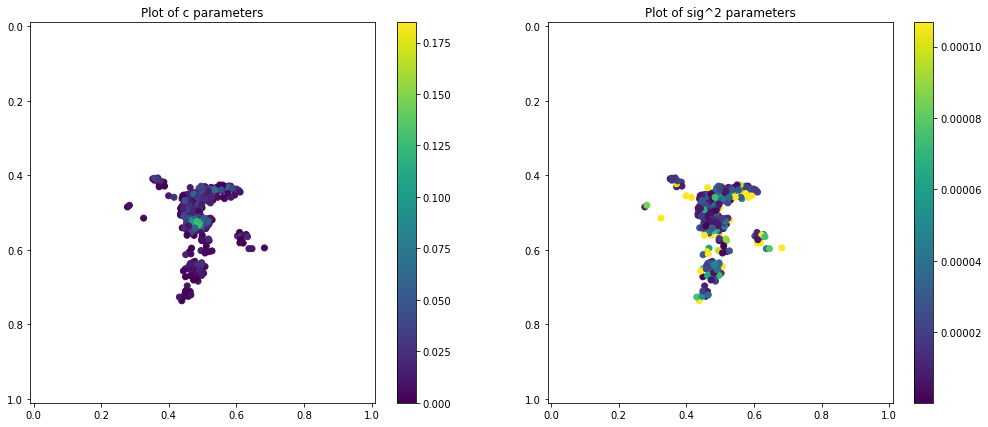

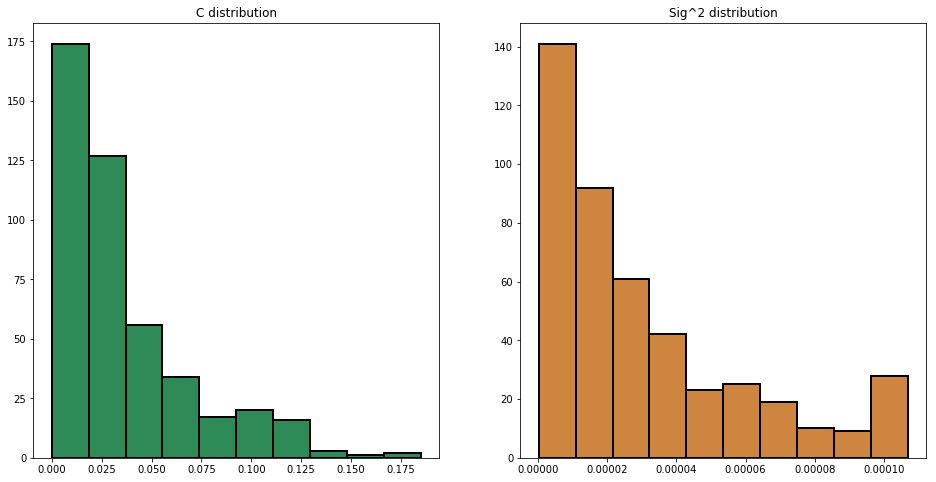

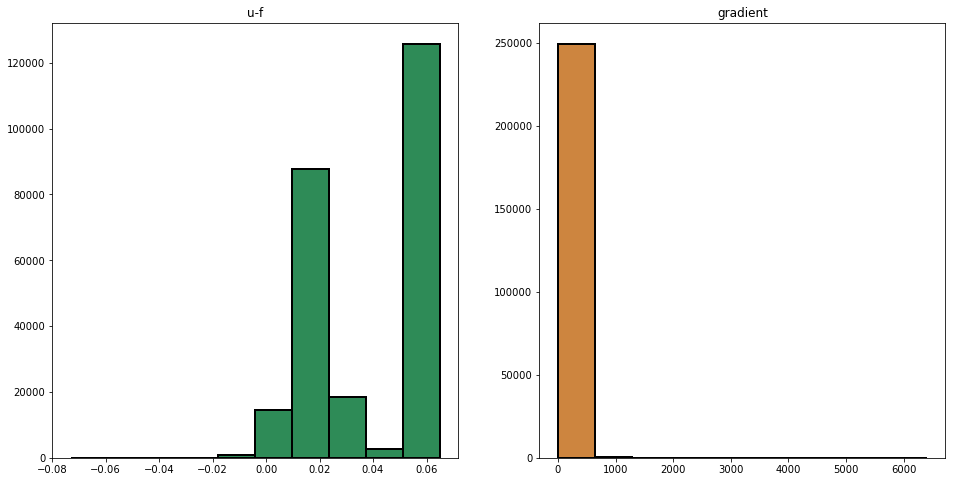

##########################################################################################
Processing 475 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 190100.
nfev: 190113

Residual stats:
Residual RMS: 0.005159990998155168
Residual Variance: 2.6622665358432887e-05
Flux Lost: 0.010582485333512968
Flux Addition: 0.010194218159405318
psi1(u-f): 0.02003778987012836
Exceeded Pixels: 3725
Sharpness: 94.52113777891559
psi2(grad u): 2.266492230147281
Total elapsed time: 1674.2510638237 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2292297349940317
Mean min distance between collocation and center p

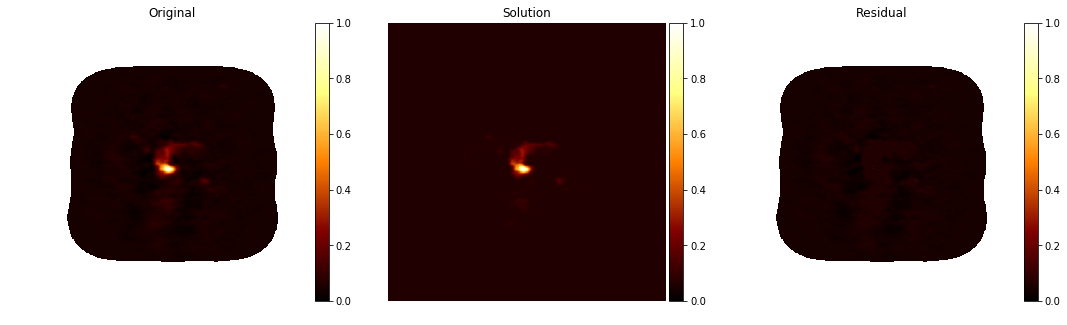

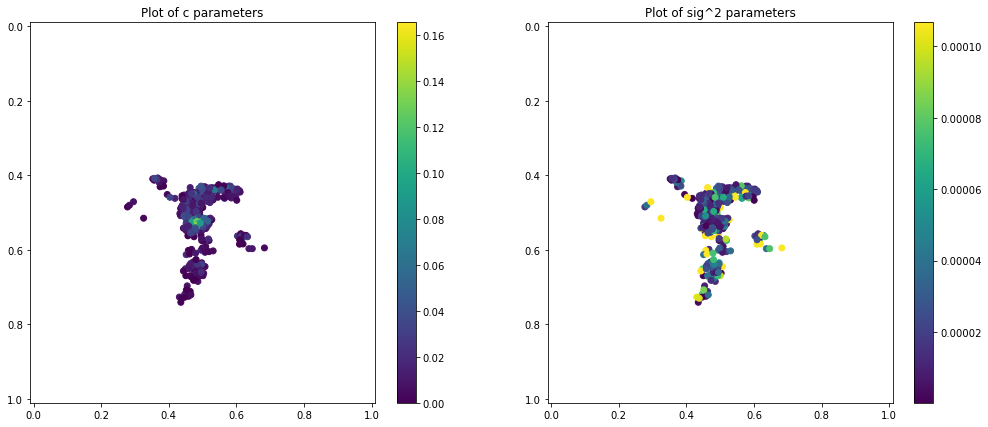

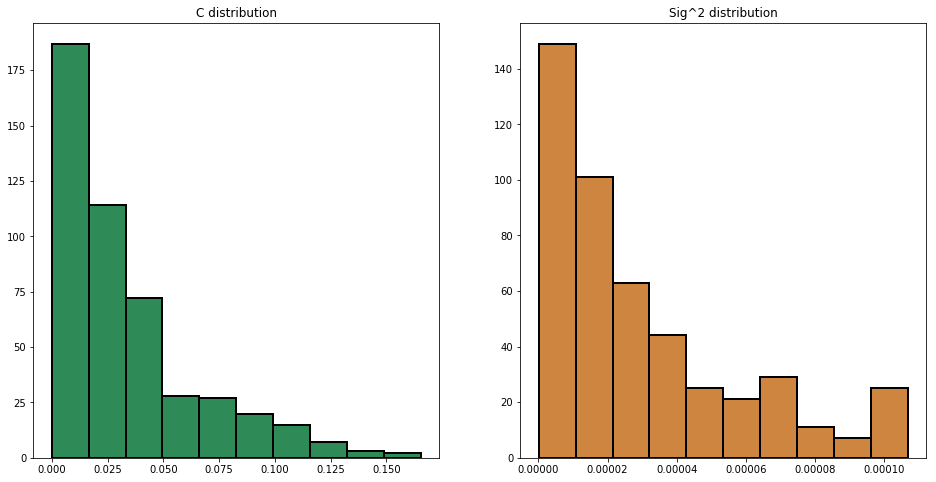

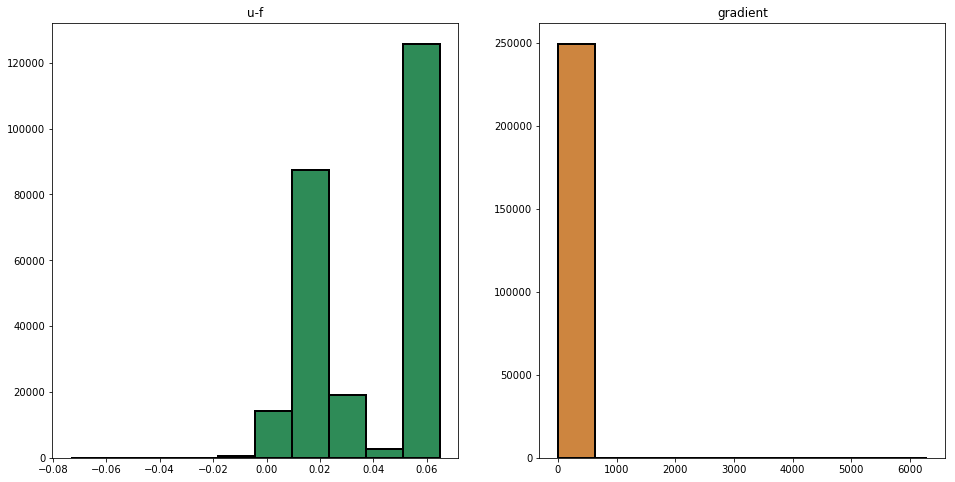

##########################################################################################
Processing 500 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 200100.
nfev: 200114

Residual stats:
Residual RMS: 0.004509708052953392
Residual Variance: 2.0335288677857153e-05
Flux Lost: 0.00995588927756506
Flux Addition: 0.009615973180928052
psi1(u-f): 0.011425968115383248
Exceeded Pixels: 3771
Sharpness: 94.52461268785522
psi2(grad u): 2.189531621722204
Total elapsed time: 1872.3923375606537 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.2291634745275934
Mean min distance between collocation and cente

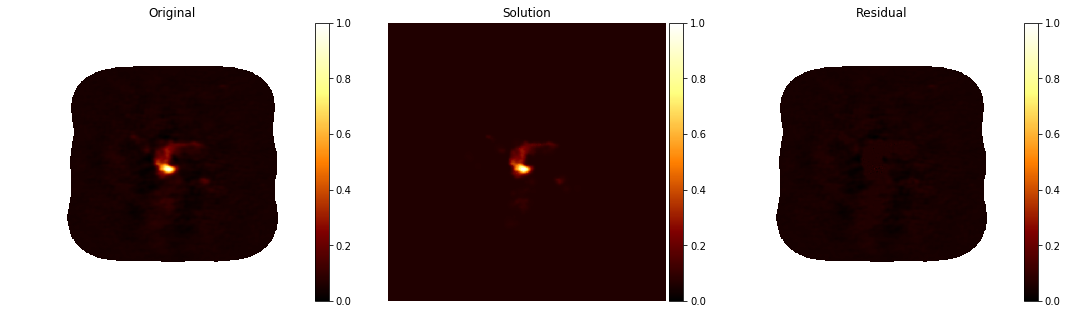

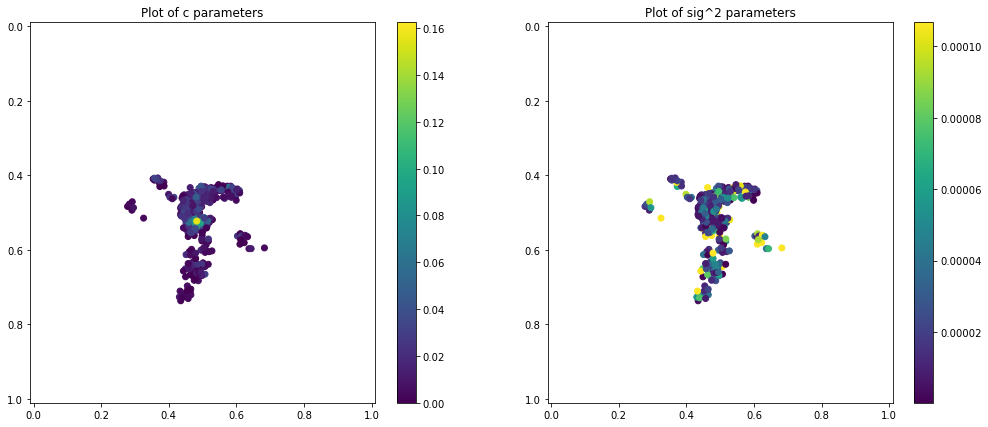

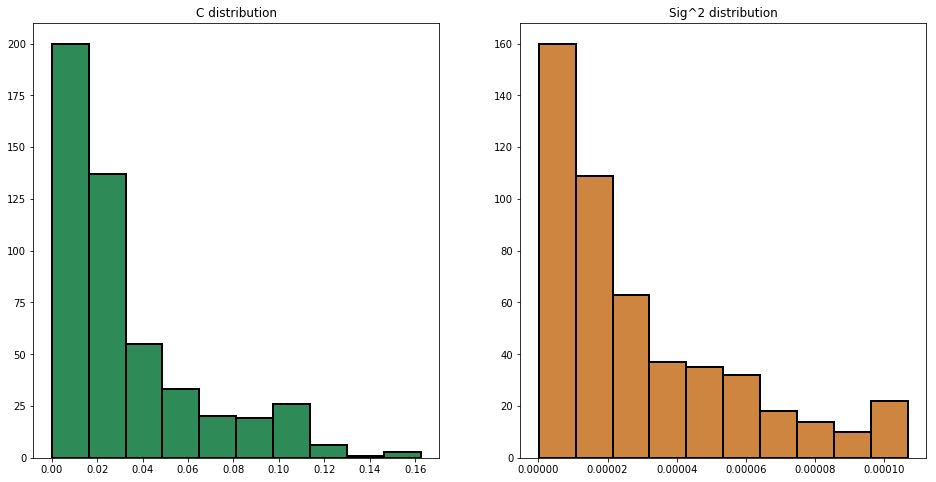

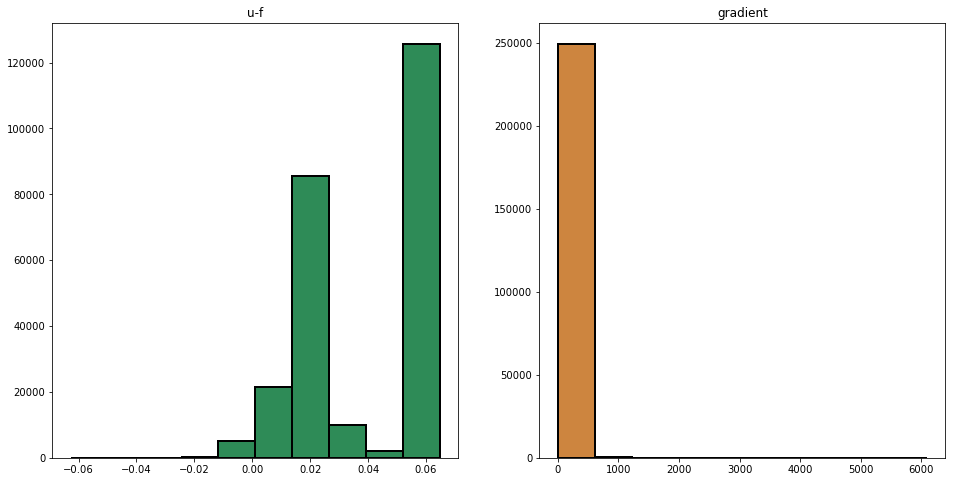

In [5]:
for elm in elm_list:
    print('#'*90)
    print('Processing {0} centers example'.format(len(elm.c)))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    #del elm.data; del elm.mask; del elm.dfunc
    
# pickling results
target = open("../results/exp01_m{0}_antennae.pkl".format(method), "wb")
pickle.dump(elm_list, target)
target.close()

In [6]:
# max and min sigma allowed
minsig = ( 0.5*(1./data.shape[0] + 1./data.shape[1]) ) / 6.
maxsig = 30*minsig

method = 2
elm_list = list()

for Nc in range(50, 501, 25):
    # number of points of each type
    Nb = int(0.2*Nc)
    Ne = 4*Nc - Nb
    
    if method==1:
        # points generation
        center_points = random_centers_generation(data, Nc, base_level=base_level, power=2.)
        collocation_points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        boundary_points = boundary_points_generation(data, base_level, Nb)
        
    elif method==2:    
        # points generation
        points = qrandom_centers_generation(dfunc, Ne, base_level, ndim=2)
        center_points = points[0:Nc]
        collocation_points = points[0:Ne]
        boundary_points = boundary_points_generation(data, base_level, Nb)
    
    # right format
    xc = center_points[:,0]
    yc = center_points[:,1]
    xe = collocation_points[:,0]
    ye = collocation_points[:,1]
    xb = boundary_points[:,0]
    yb = boundary_points[:,1]
    
#    # visualizing the choosen points
#    points_plot(data, center_points=center_points, title="Center Points")
#    points_plot(data, center_points=collocation_points, title="Collocation Points")


    ####################################
    # Initial parameters estimation
    ####################################
    c0, sig0 = estimate_initial_guess(center_points, dfunc, minsig=minsig, maxsig=maxsig, method='min_dist')


#    solution_plot(dfunc, c0, sig0, xc, yc, dims=data.shape, base_level=base_level)
#    params_plot(c0, sig0, xc, yc)
#    params_distribution_plot(c0, sig0)
    elm_list.append(ELModel(data, dfunc, data.shape, xe, ye, xc, yc, xb, yb, c0, sig0, a=0., b=0., d1psi1=d1psi, 
                    d1psi2=d1psi, d2psi2=d2psi, base_level=base_level, pix_freedom=1., minsig=minsig, maxsig=maxsig))

../lib/points_generation.py:106: RuntimeWarning: invalid value encountered in greater
  pixel_map = data > base_level
../lib/variational.py:79: RuntimeWarning: invalid value encountered in greater
  self.mask = data > base_level


##########################################################################################
Processing 50 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 20100.
nfev: 20111

Residual stats:
Residual RMS: 0.036289097402159284
Residual Variance: 0.0012919847814187022
Flux Lost: 0.088533957082628
Flux Addition: 0.052179440906602155
psi1(u-f): 1.73918420543147
Exceeded Pixels: 3413
Sharpness: 86.71910343227998
psi2(grad u): 1.9048934358226053
Total elapsed time: 5.427969932556152 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.09420769972062192
Mean min distance between collocation and center points:

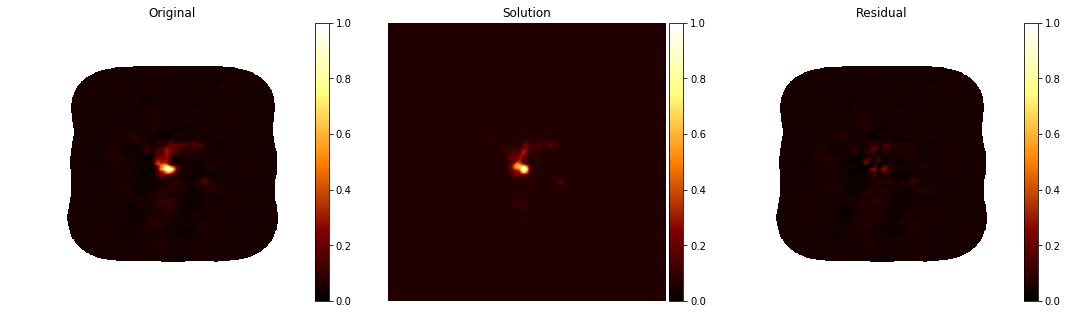

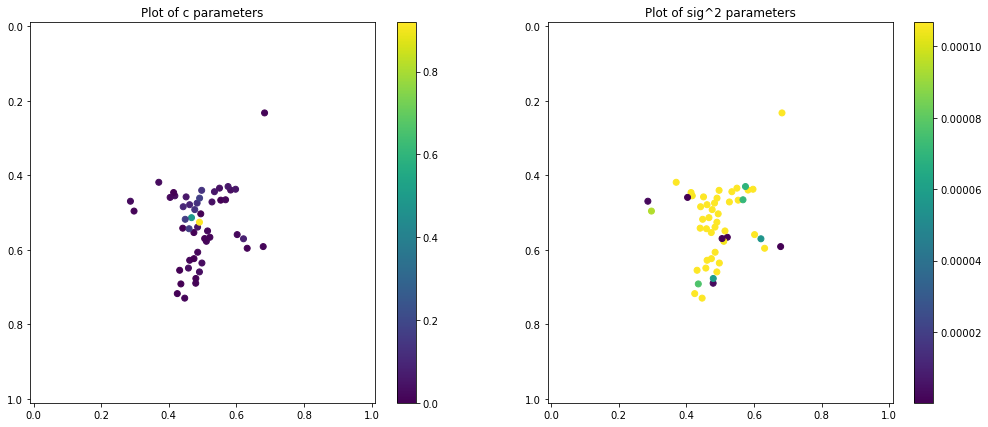

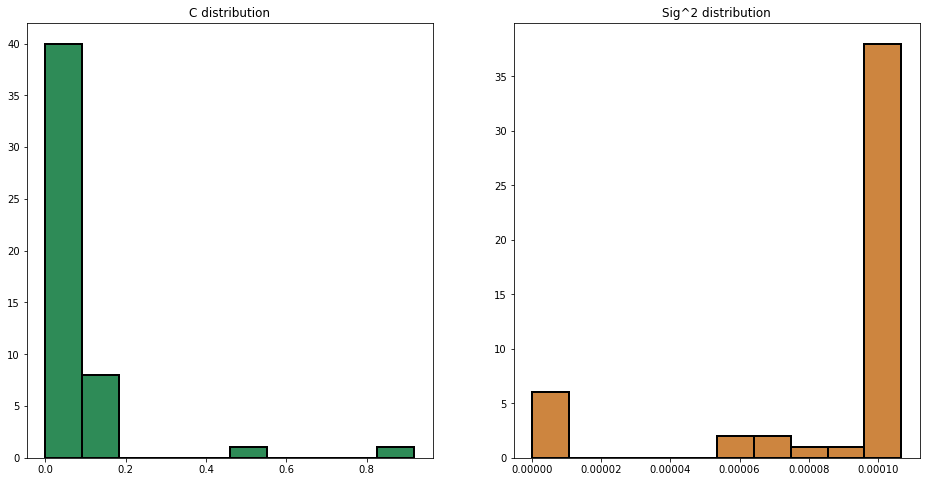

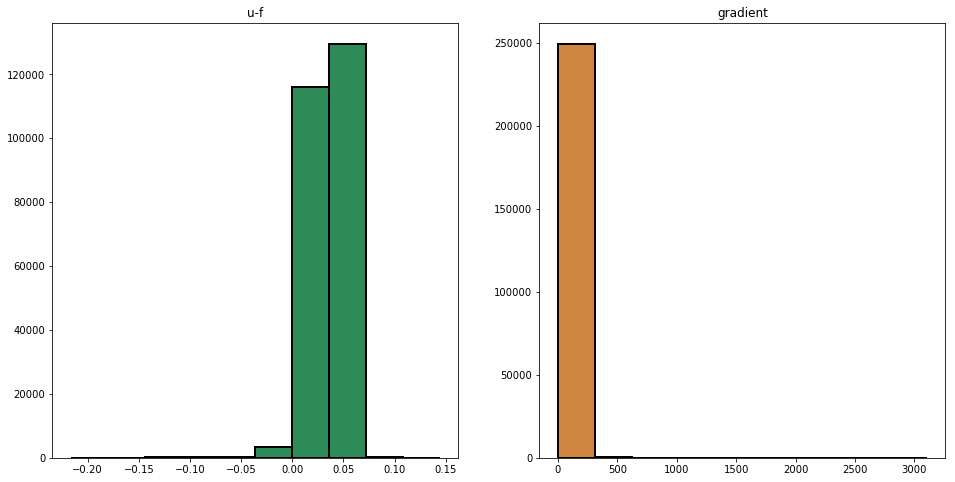

##########################################################################################
Processing 75 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 30100.
nfev: 30111

Residual stats:
Residual RMS: 0.026944415208701052
Residual Variance: 0.0007259542367787293
Flux Lost: 0.0534939789439008
Flux Addition: 0.055077596166663766
psi1(u-f): 1.5715769637967107
Exceeded Pixels: 3709
Sharpness: 89.12772444951406
psi2(grad u): 1.716876756328989
Total elapsed time: 12.472424983978271 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0934614099416137
Mean min distance between collocation and center point

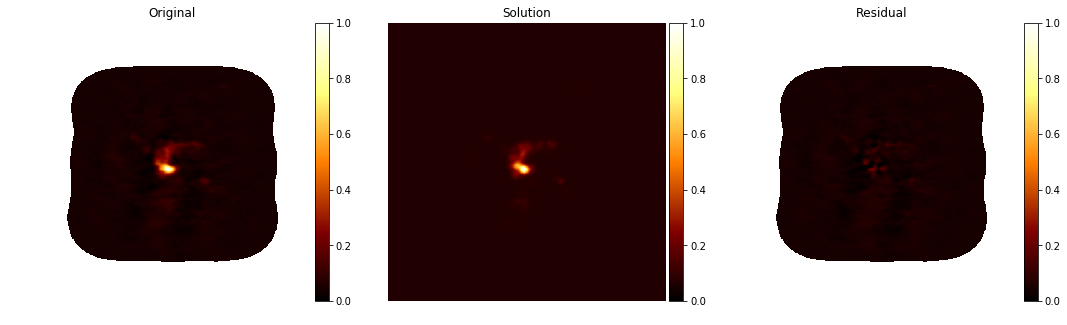

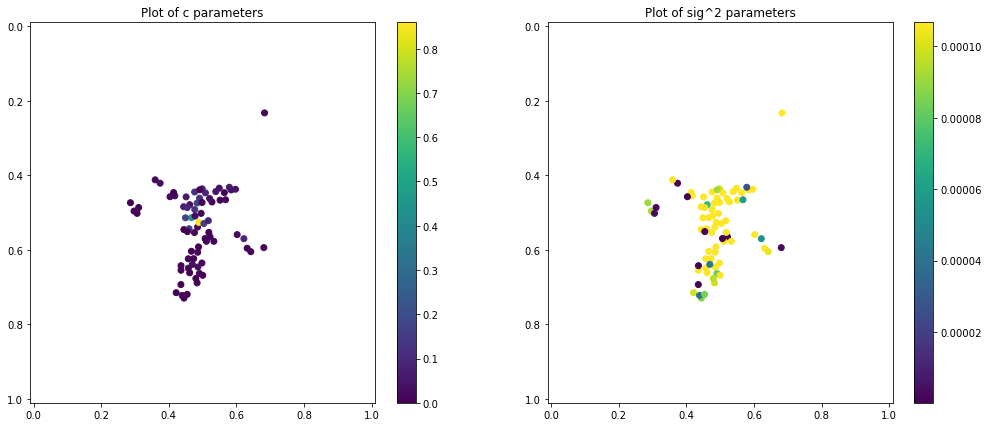

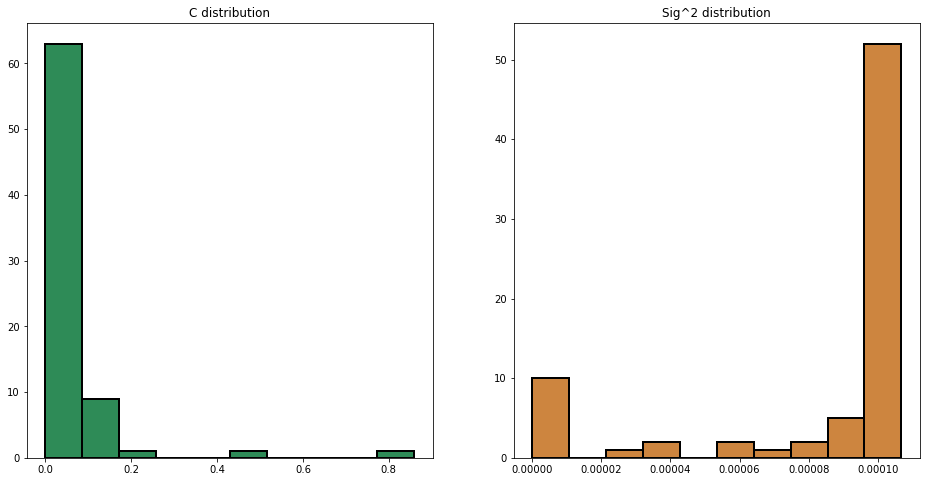

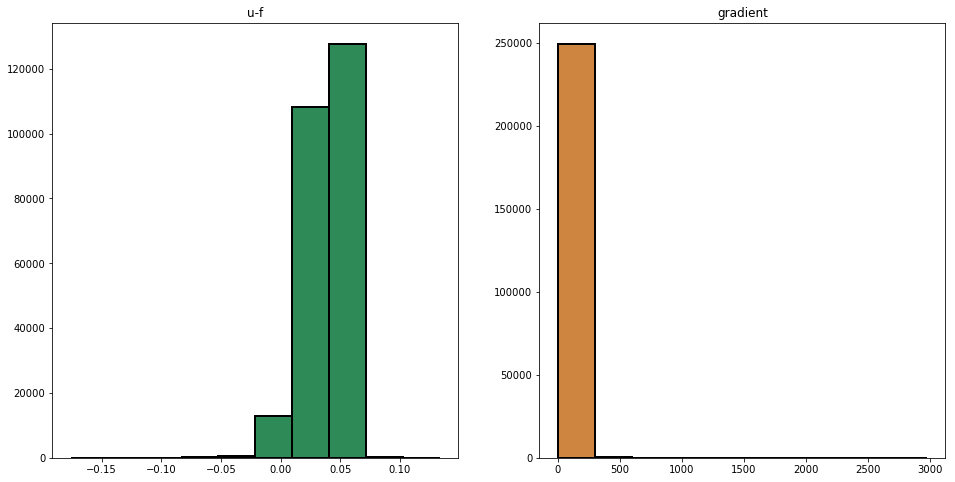

##########################################################################################
Processing 100 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 40100.
nfev: 40107

Residual stats:
Residual RMS: 0.044831688989264935
Residual Variance: 0.0020072918182098836
Flux Lost: 0.08813087324824861
Flux Addition: 0.0764125892522048
psi1(u-f): 5.911032973376905
Exceeded Pixels: 3374
Sharpness: 83.67535849430206
psi2(grad u): 1.3765074946366764
Total elapsed time: 19.635653257369995 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.0878933727671765
Mean min distance between collocation and center point

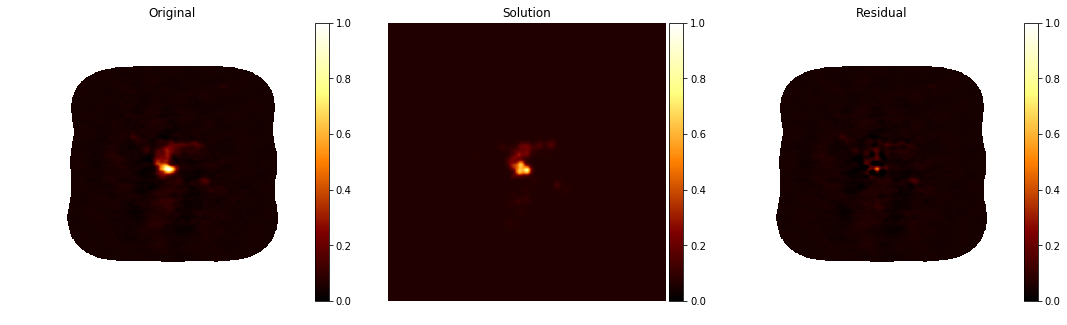

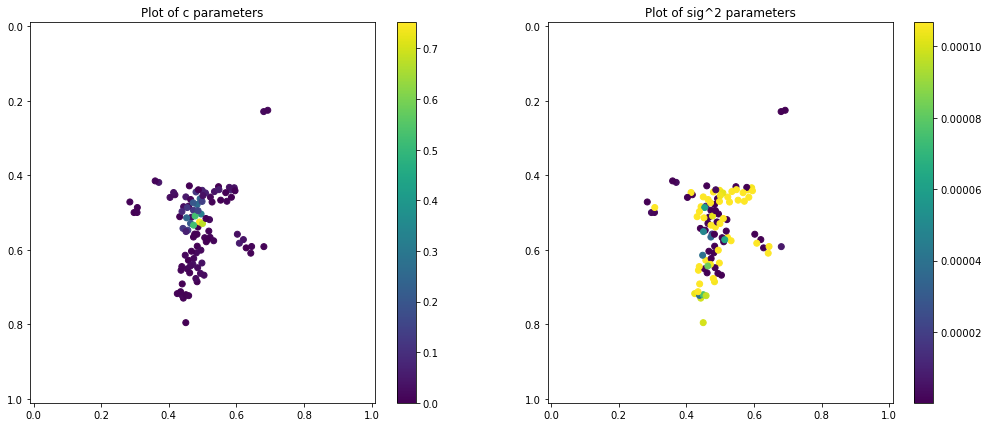

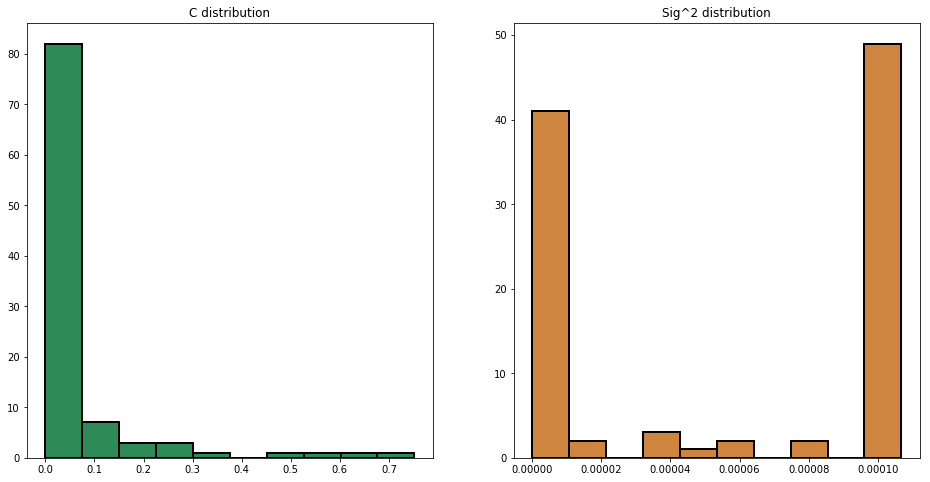

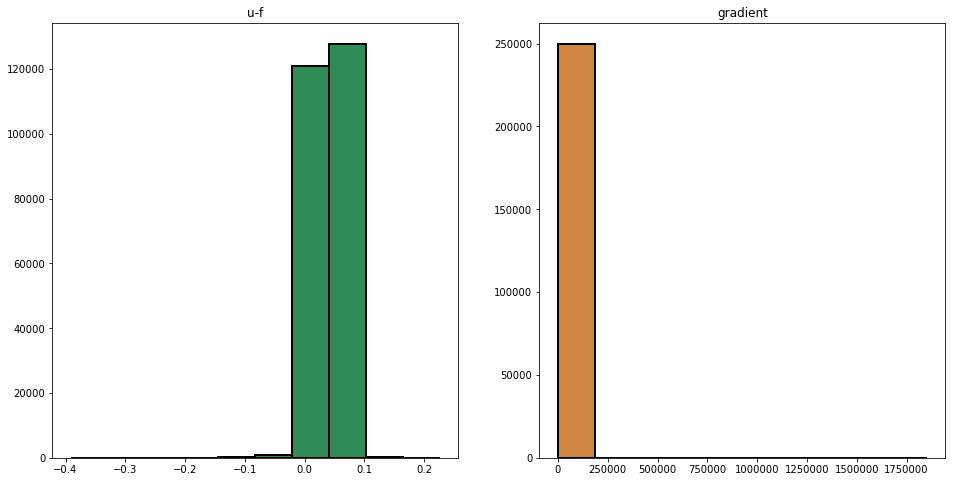

##########################################################################################
Processing 125 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 50100.
nfev: 50110

Residual stats:
Residual RMS: 0.04134015510627931
Residual Variance: 0.001709000420448987
Flux Lost: 0.070070294461857
Flux Addition: 0.0694186879814282
psi1(u-f): 5.506779106545052
Exceeded Pixels: 3620
Sharpness: 85.2382436225171
psi2(grad u): 1.3834827028445658
Total elapsed time: 33.12315368652344 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.09130934938077416
Mean min distance between collocation and center points: 0.

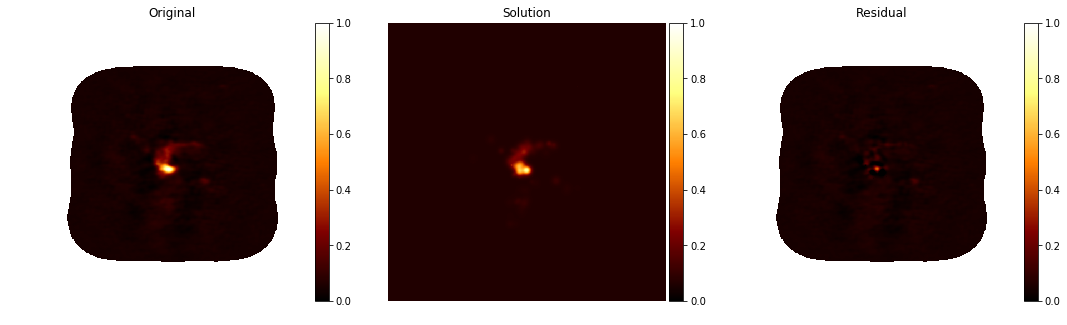

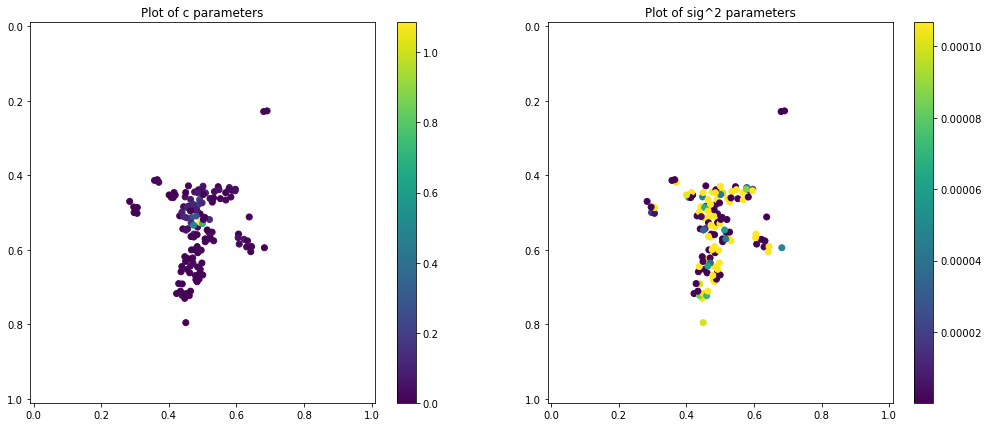

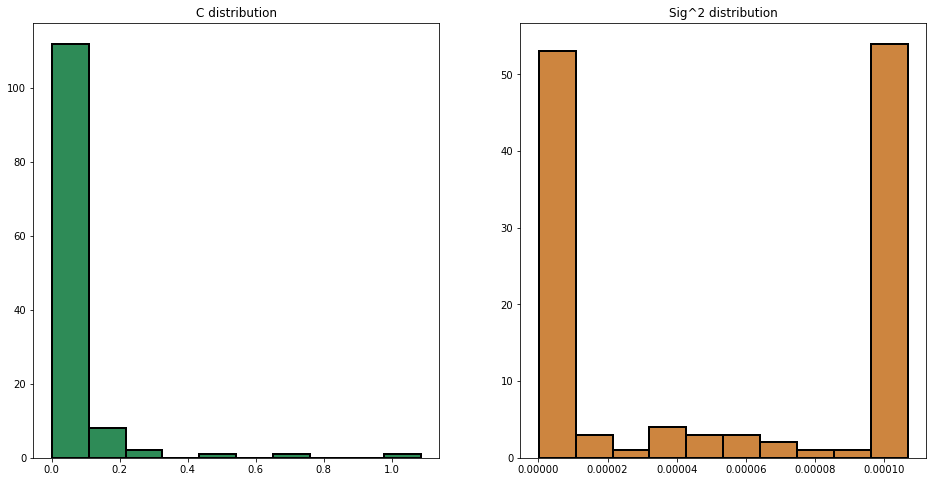

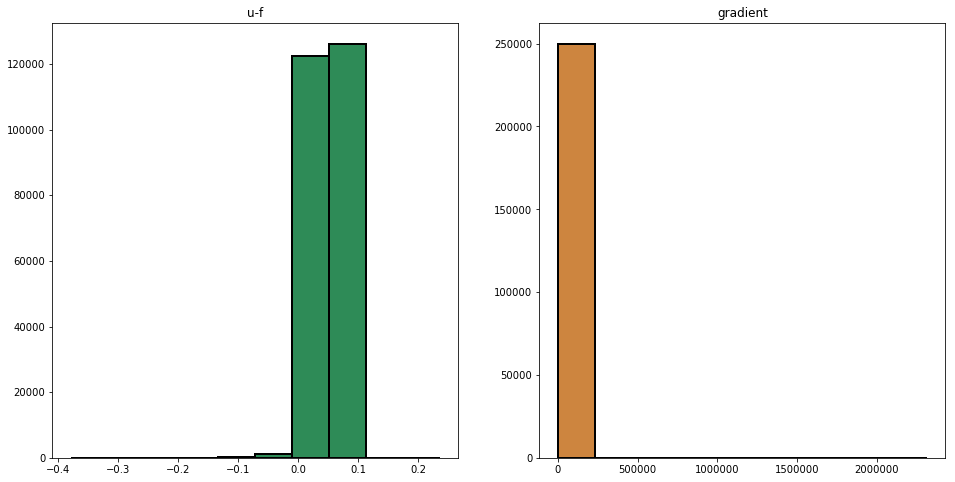

##########################################################################################
Processing 150 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 60100.
nfev: 60115

Residual stats:
Residual RMS: 0.027573153708817643
Residual Variance: 0.0007598171118505793
Flux Lost: 0.05003509739688033
Flux Addition: 0.05498407208074522
psi1(u-f): 1.9766079583655711
Exceeded Pixels: 3693
Sharpness: 87.6691404393395
psi2(grad u): 1.6262025090160488
Total elapsed time: 54.20636034011841 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.08989624800759734
Mean min distance between collocation and center poin

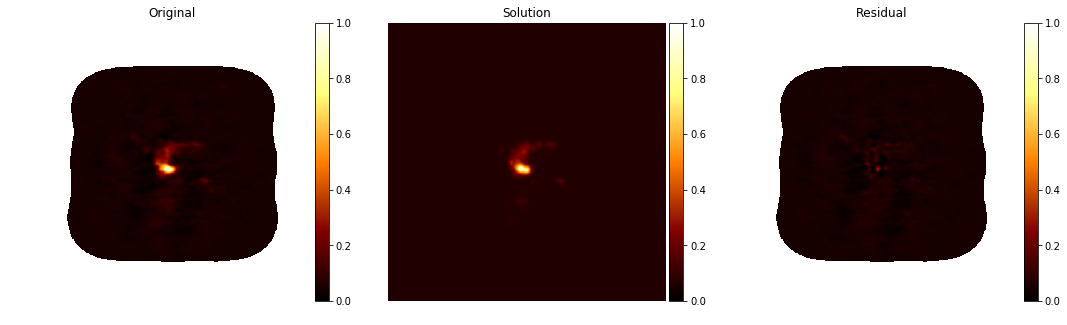

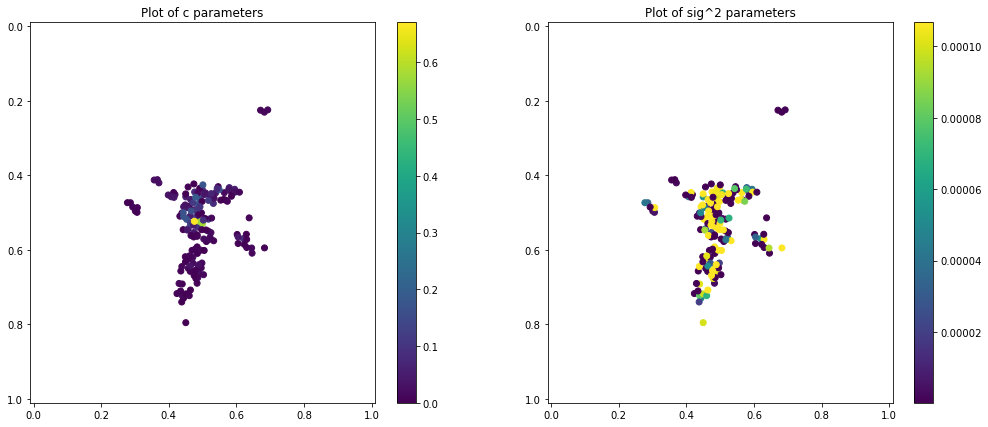

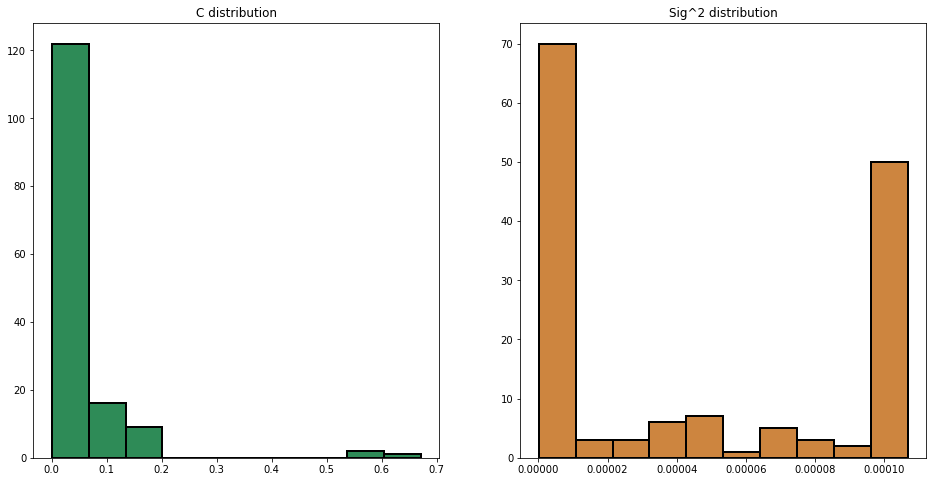

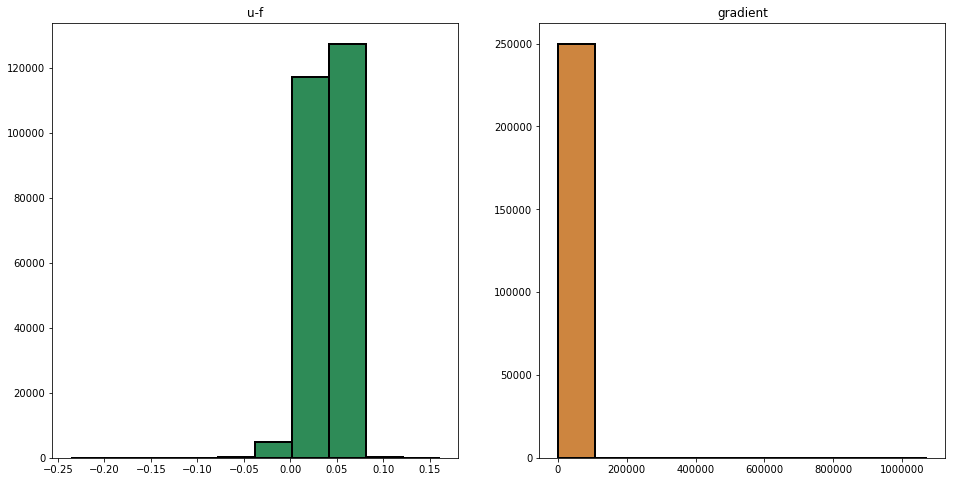

##########################################################################################
Processing 175 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 70100.
nfev: 70112

Residual stats:
Residual RMS: 0.02423378920828508
Residual Variance: 0.0005869586640892118
Flux Lost: 0.039782712270263657
Flux Addition: 0.04388916377521528
psi1(u-f): 1.414398447911458
Exceeded Pixels: 3897
Sharpness: 88.42686812429686
psi2(grad u): 1.3094086699742589
Total elapsed time: 86.90154838562012 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.09010196694147801
Mean min distance between collocation and center poin

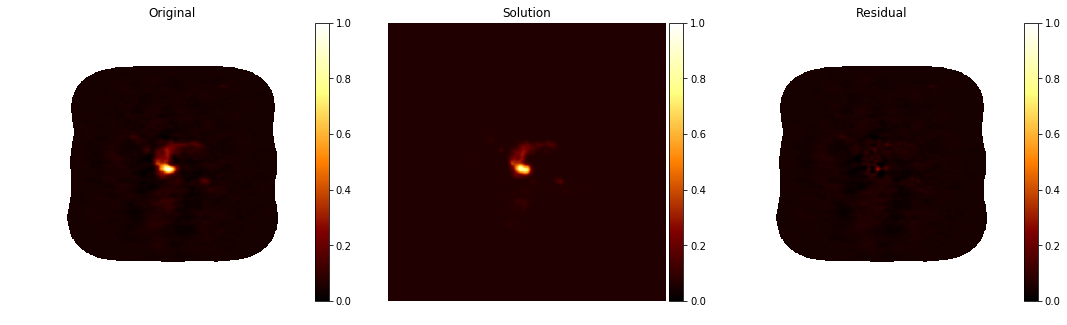

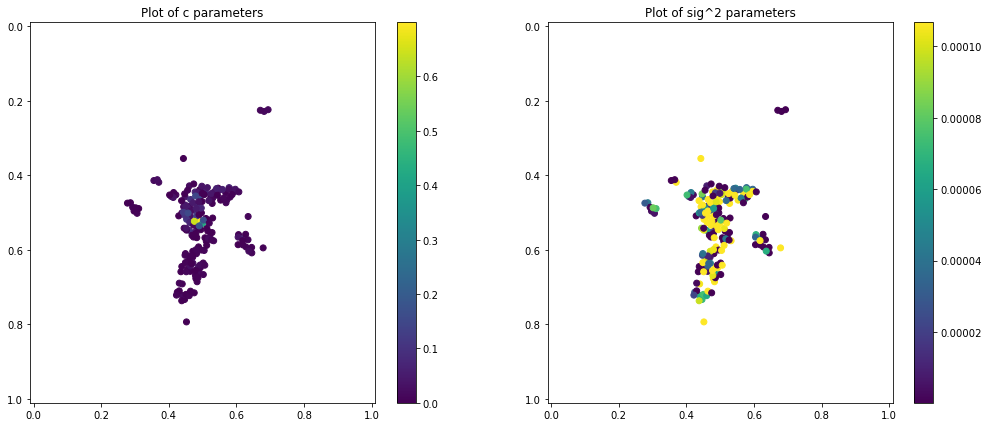

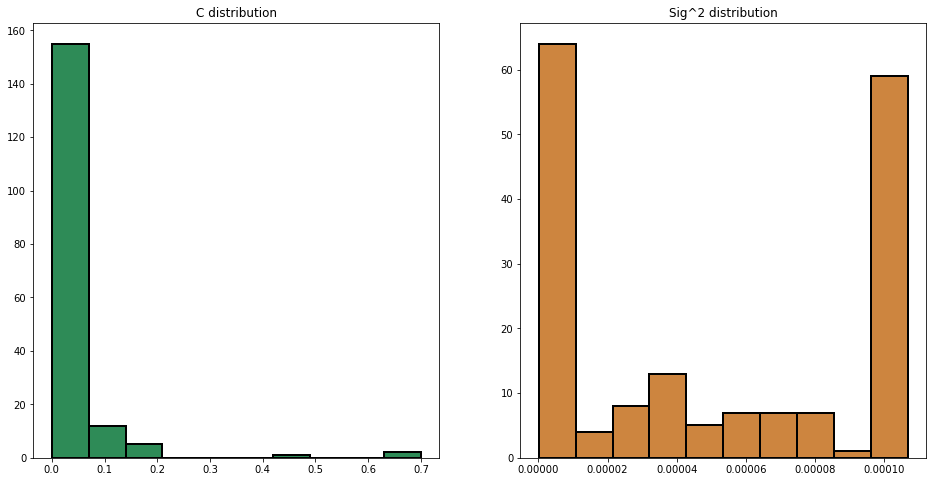

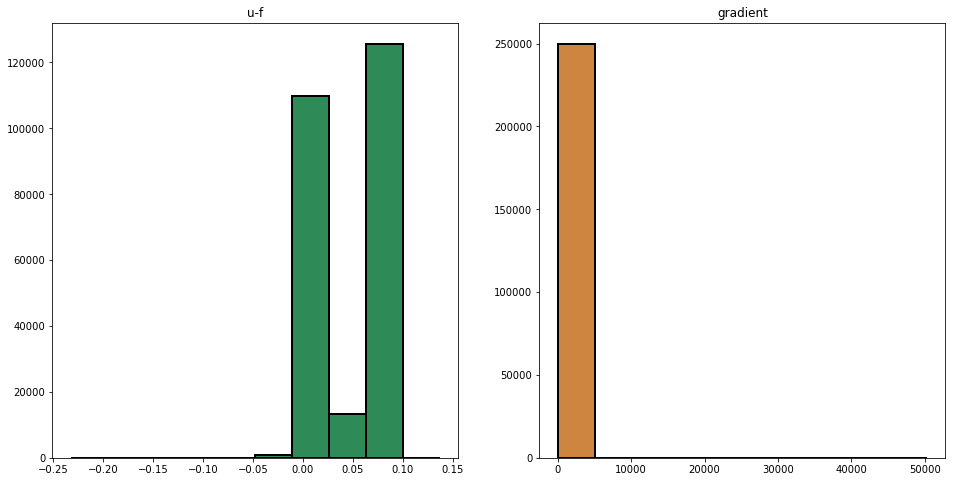

##########################################################################################
Processing 200 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 80100.
nfev: 80112

Residual stats:
Residual RMS: 0.021039048299585934
Residual Variance: 0.00044263650078082143
Flux Lost: 0.03289498521805232
Flux Addition: 0.03341270473674913
psi1(u-f): 0.8697834168047418
Exceeded Pixels: 3740
Sharpness: 90.863475922
psi2(grad u): 1.5032316768193752
Total elapsed time: 126.20932221412659 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.08949955368986844
Mean min distance between collocation and center points

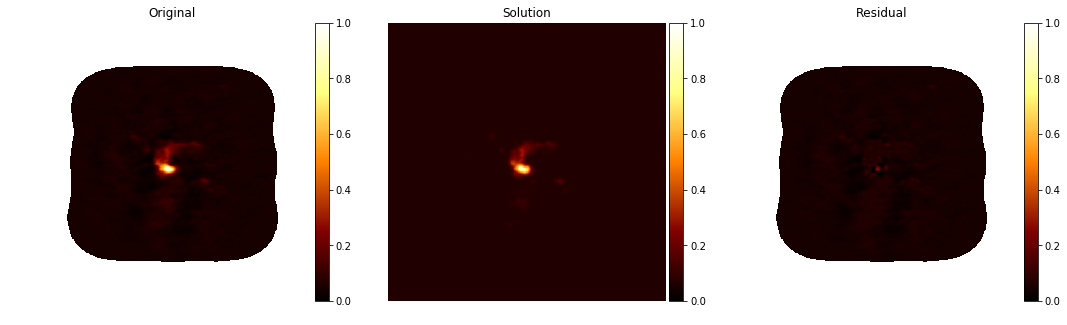

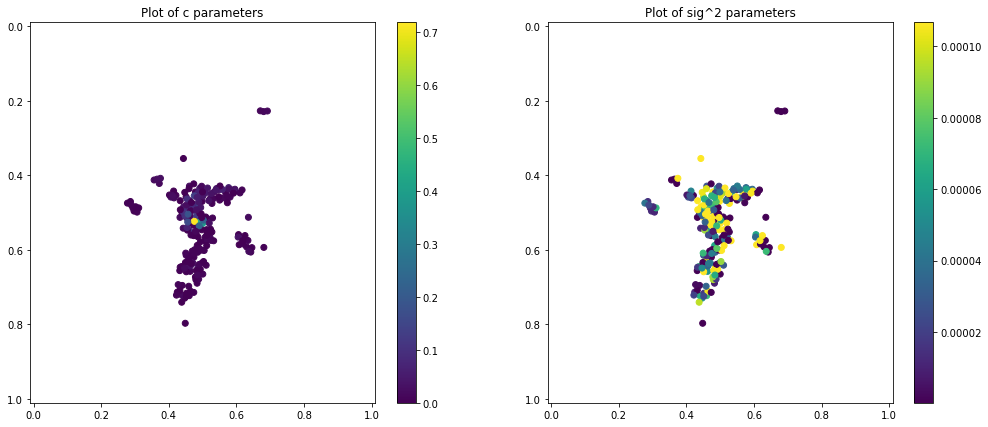

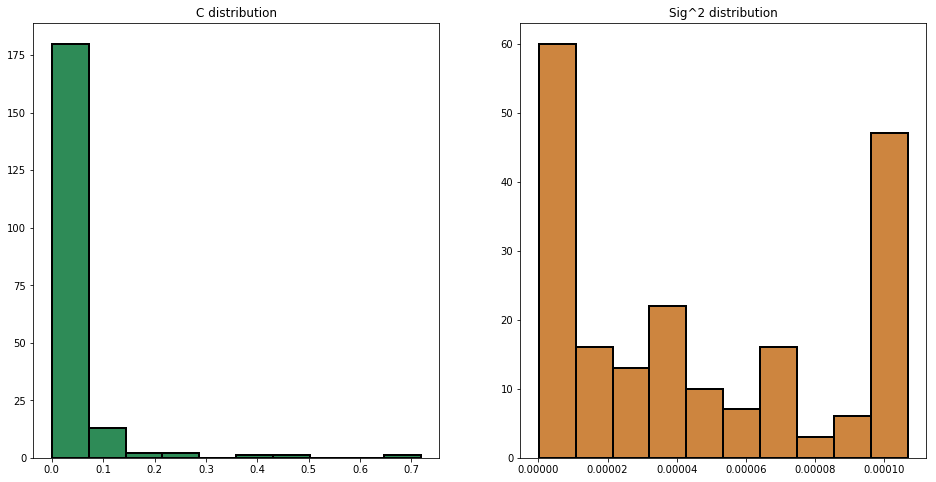

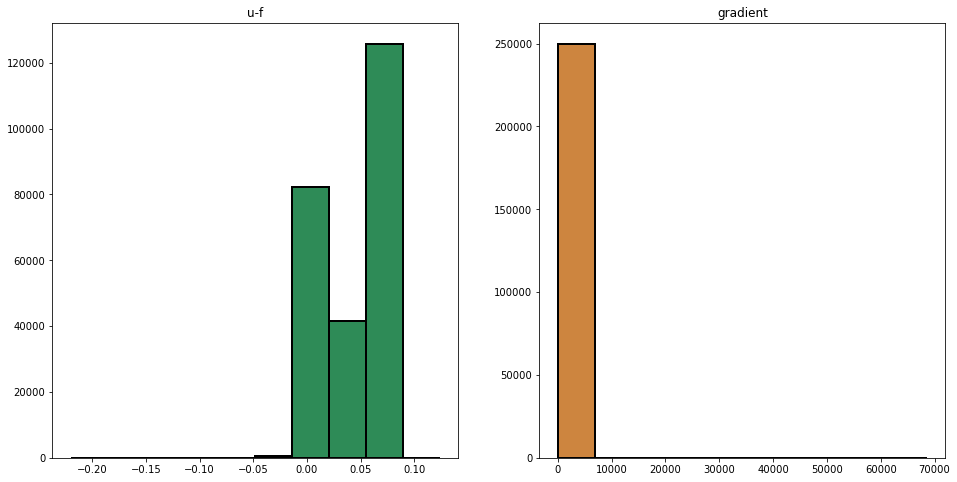

##########################################################################################
Processing 225 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 90100.
nfev: 90112

Residual stats:
Residual RMS: 0.008791714978020828
Residual Variance: 7.71194033254002e-05
Flux Lost: 0.020722498320975957
Flux Addition: 0.01767691984921448
psi1(u-f): 0.04264246331601737
Exceeded Pixels: 3734
Sharpness: 92.60736409100045
psi2(grad u): 1.9586470408007097
Total elapsed time: 190.07994627952576 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02064745218078258
Mean min distance between collocation and center p

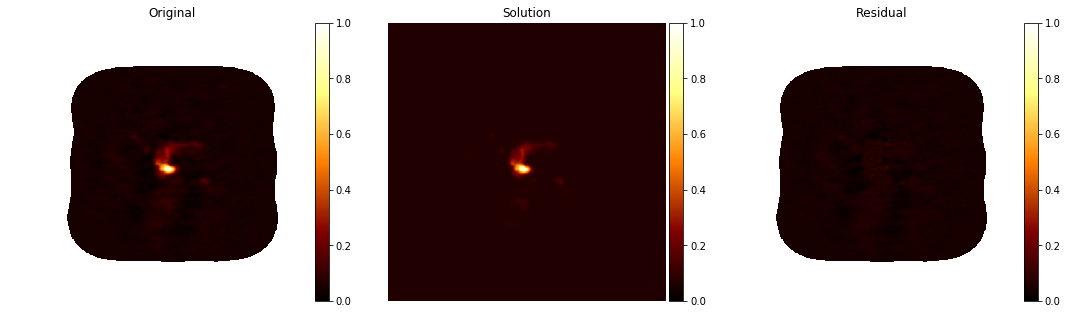

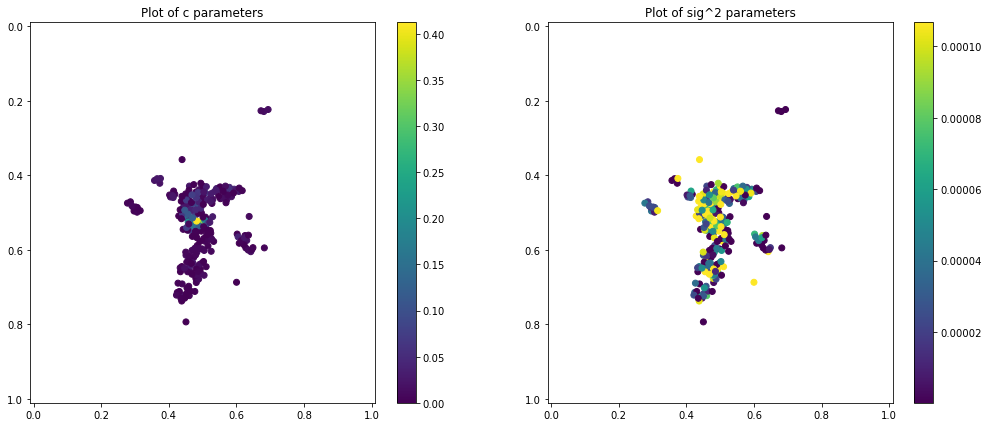

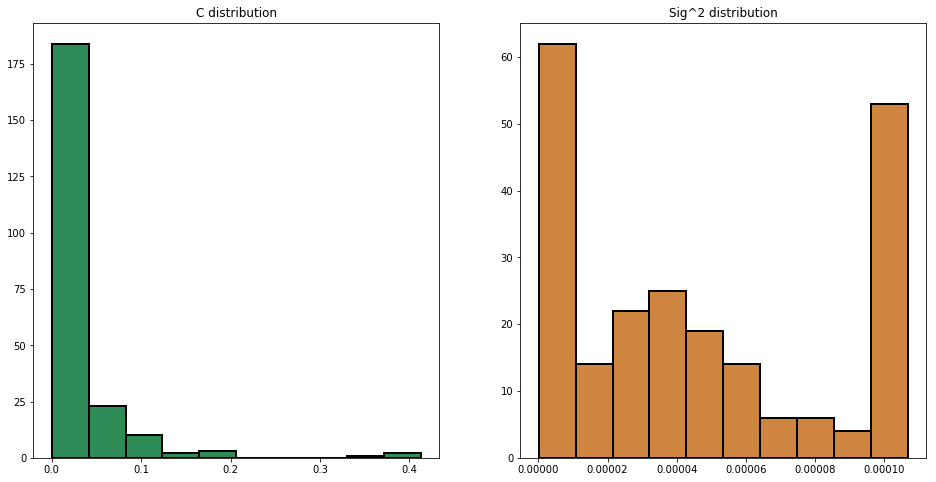

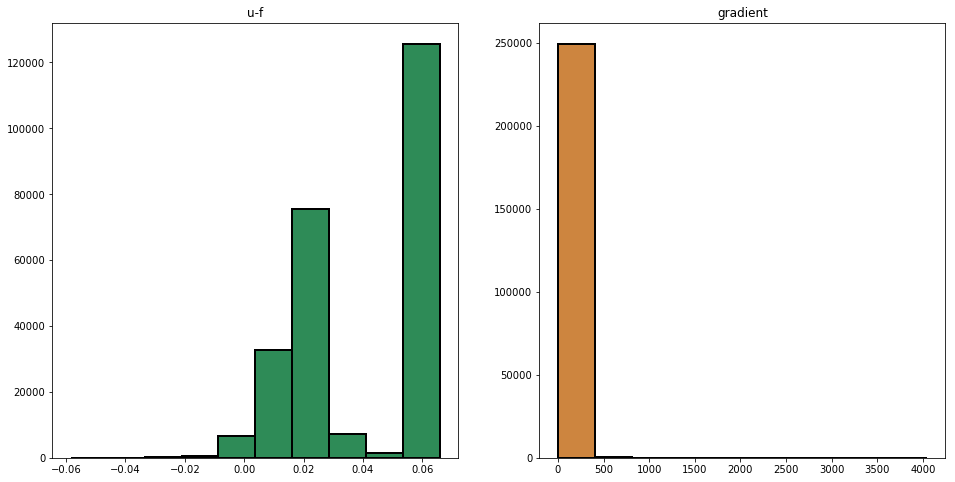

##########################################################################################
Processing 250 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 100100.
nfev: 100111

Residual stats:
Residual RMS: 0.008221758824210734
Residual Variance: 6.742077217026007e-05
Flux Lost: 0.016149791030398698
Flux Addition: 0.019210113831416648
psi1(u-f): 0.07012616160667946
Exceeded Pixels: 3746
Sharpness: 93.77454542333626
psi2(grad u): 1.9025678178439427
Total elapsed time: 263.71943616867065 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.019282275842965473
Mean min distance between collocation and cen

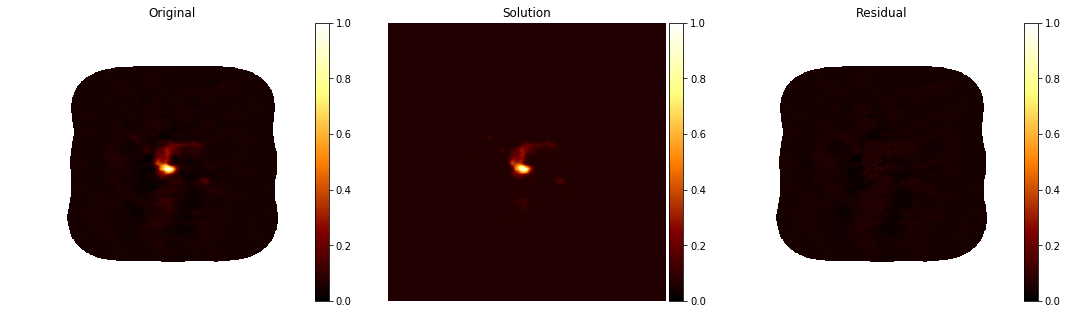

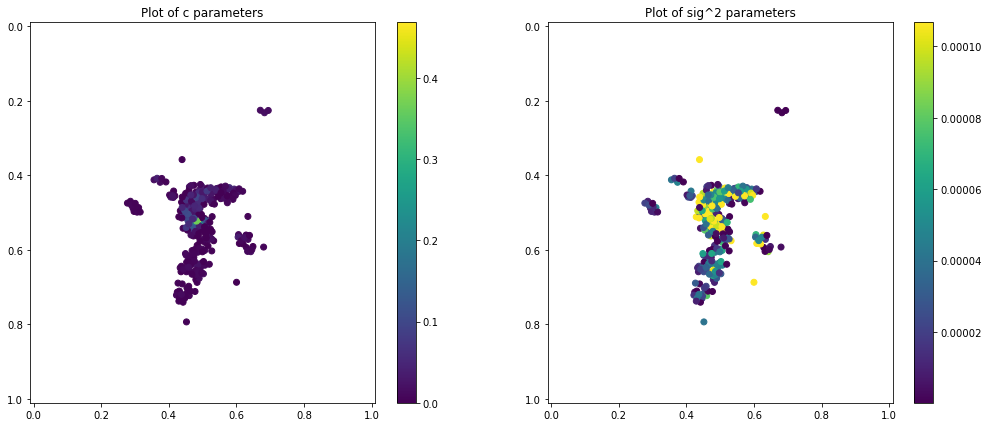

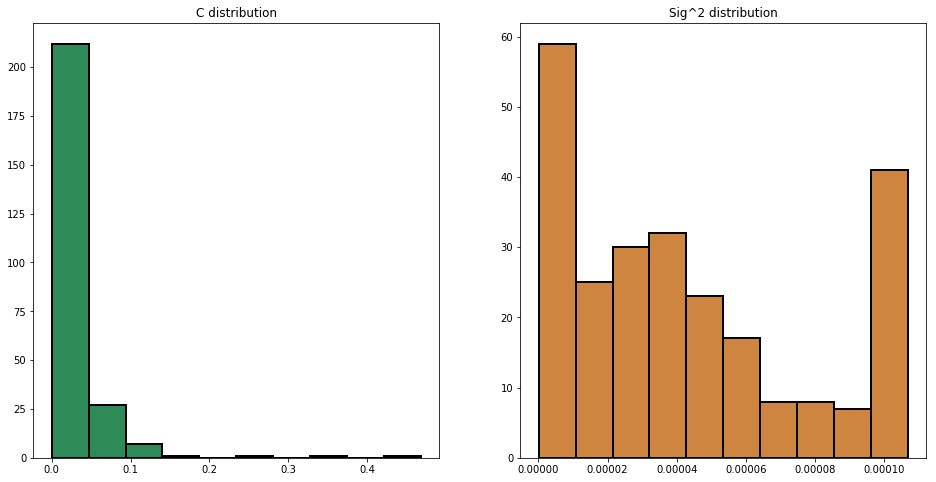

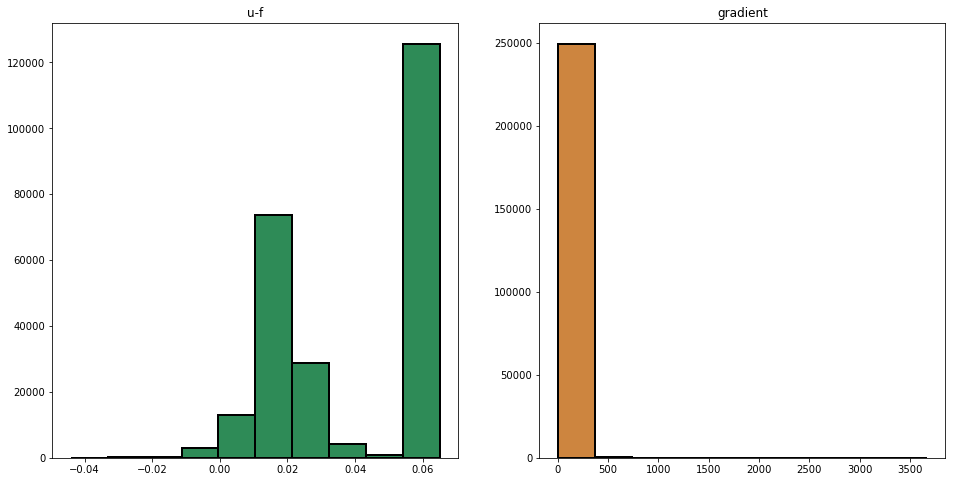

##########################################################################################
Processing 275 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 110100.
nfev: 110115

Residual stats:
Residual RMS: 0.006082656947339714
Residual Variance: 3.699065442920193e-05
Flux Lost: 0.012981126469825958
Flux Addition: 0.013635063188978872
psi1(u-f): 0.020016892019305503
Exceeded Pixels: 3821
Sharpness: 94.4643953897959
psi2(grad u): 2.012983732505834
Total elapsed time: 333.02461314201355 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.01695821167063071
Mean min distance between collocation and cente

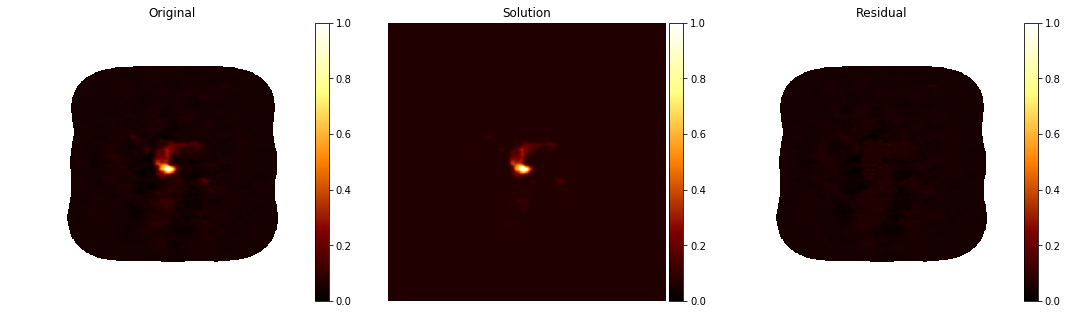

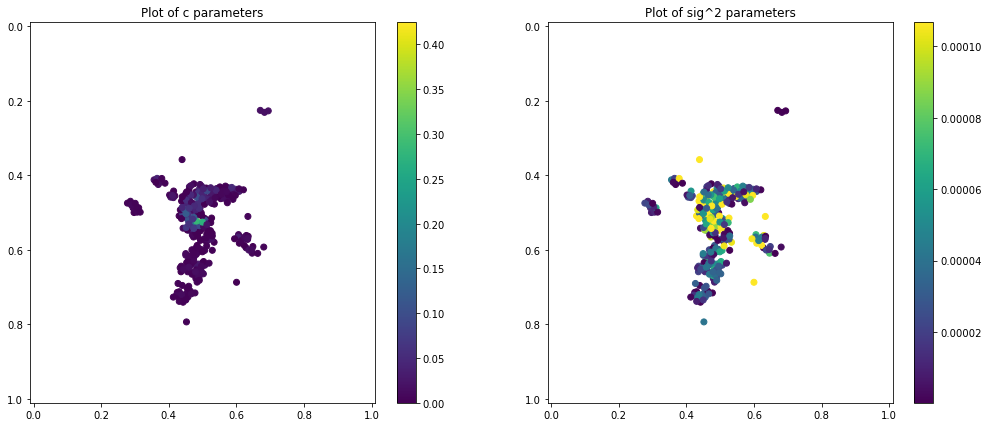

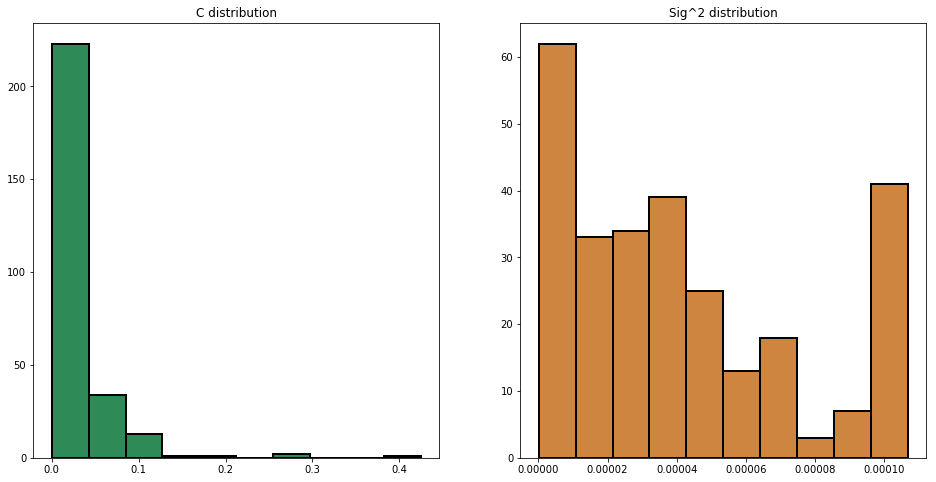

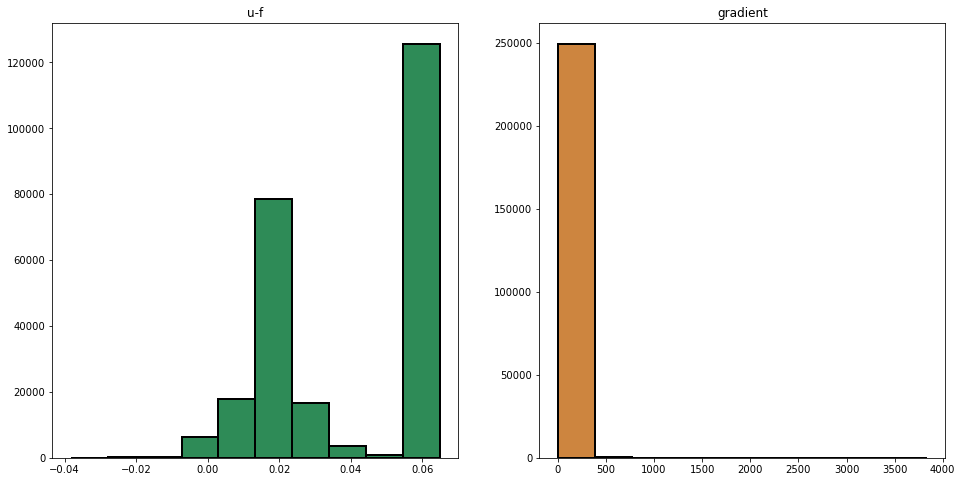

##########################################################################################
Processing 300 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 120100.
nfev: 120111

Residual stats:
Residual RMS: 0.005529369803696376
Residual Variance: 3.055116361559995e-05
Flux Lost: 0.011279242606316188
Flux Addition: 0.012378221624537413
psi1(u-f): 0.017957191265457174
Exceeded Pixels: 3804
Sharpness: 95.20535428163369
psi2(grad u): 2.0170664624069587
Total elapsed time: 422.9155926704407 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.016986005110474132
Mean min distance between collocation and cen

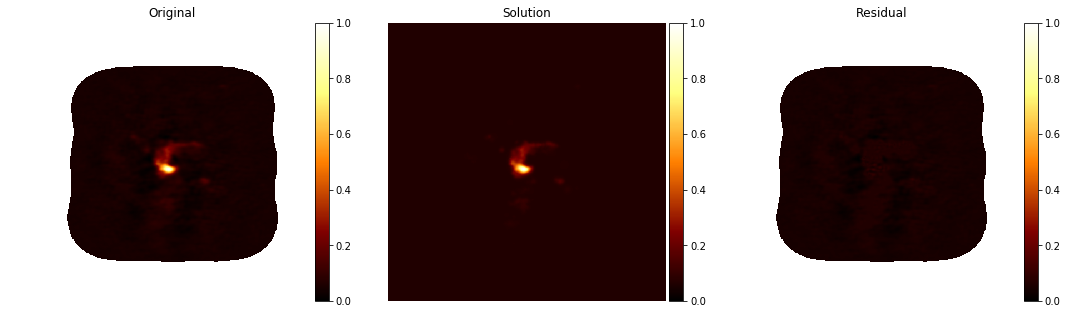

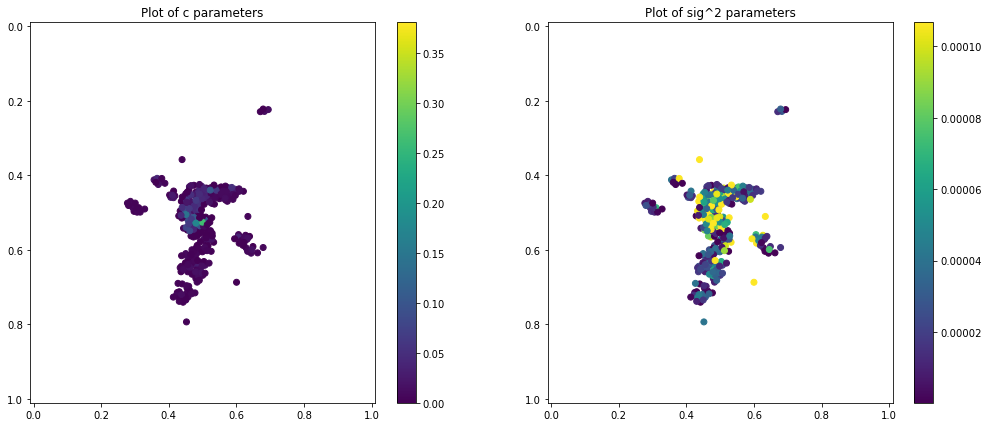

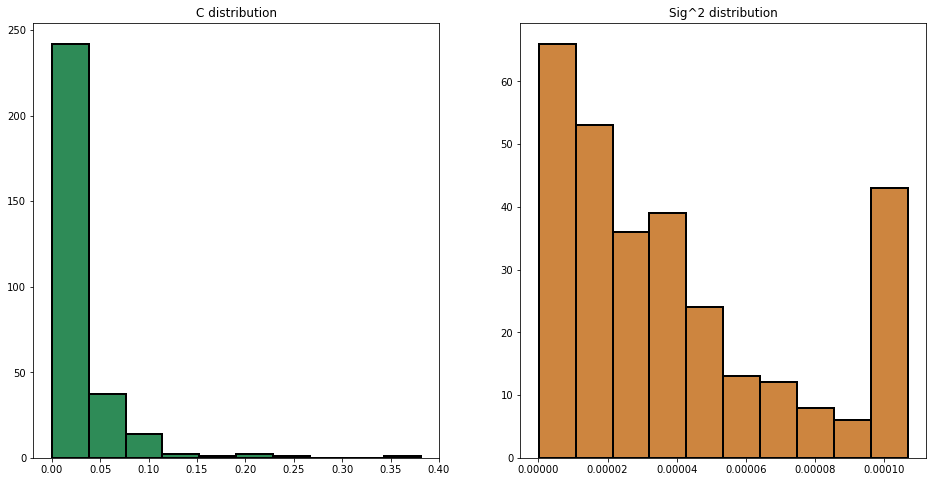

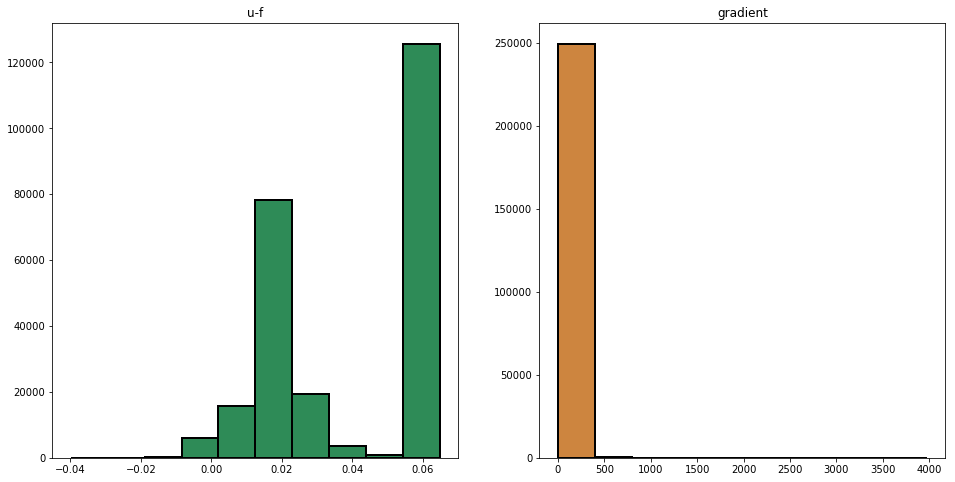

##########################################################################################
Processing 325 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 130100.
nfev: 130111

Residual stats:
Residual RMS: 0.006030361914226871
Residual Variance: 3.6365182464212435e-05
Flux Lost: 0.013163893737439057
Flux Addition: 0.013229989907010211
psi1(u-f): 0.023644180797274227
Exceeded Pixels: 3723
Sharpness: 94.52637618292248
psi2(grad u): 2.0253258259323728
Total elapsed time: 527.5793681144714 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02591980564278877
Mean min distance between collocation and cen

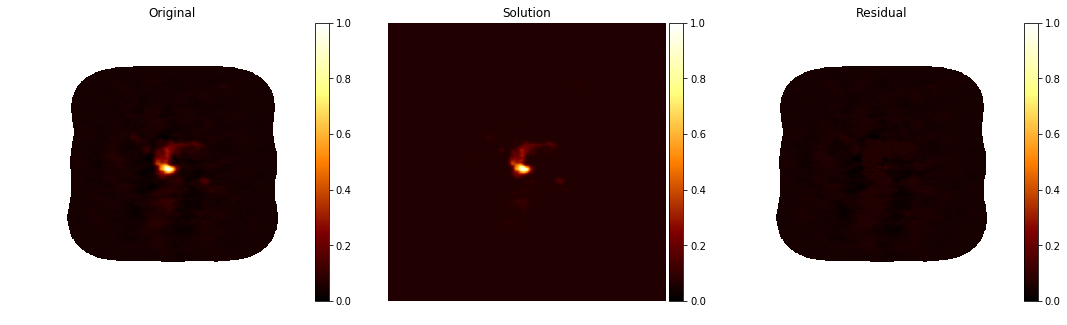

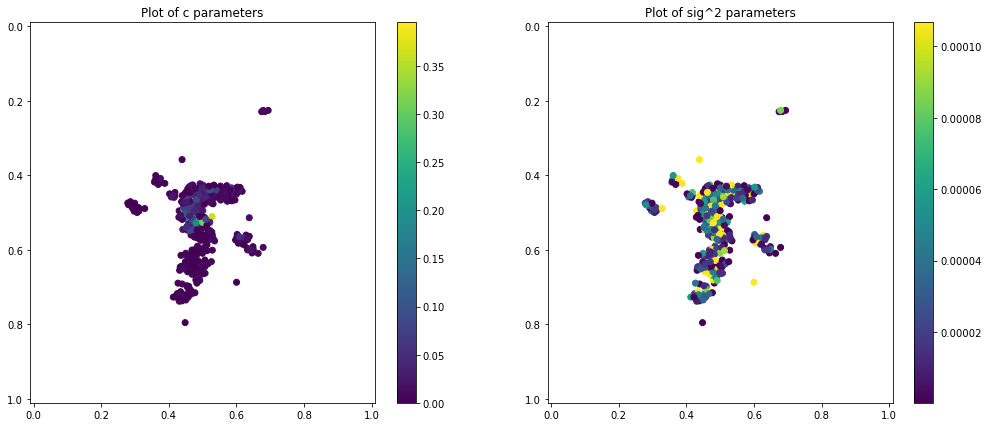

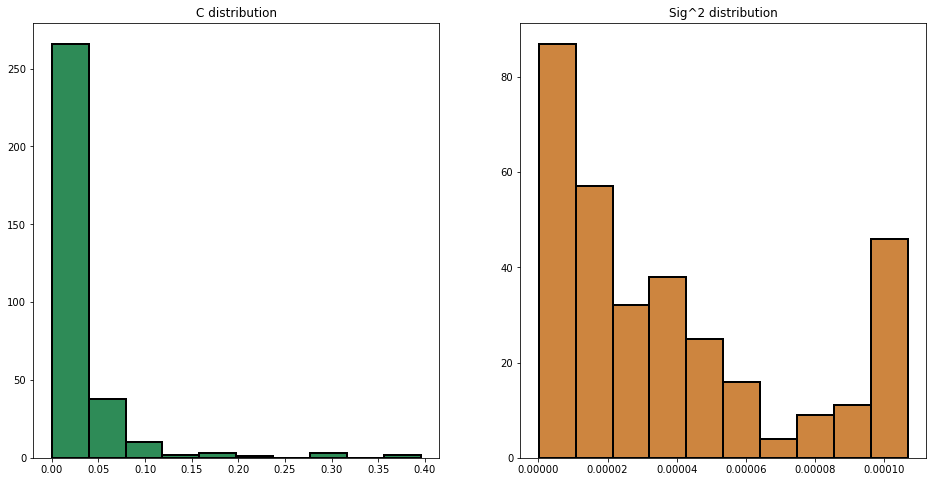

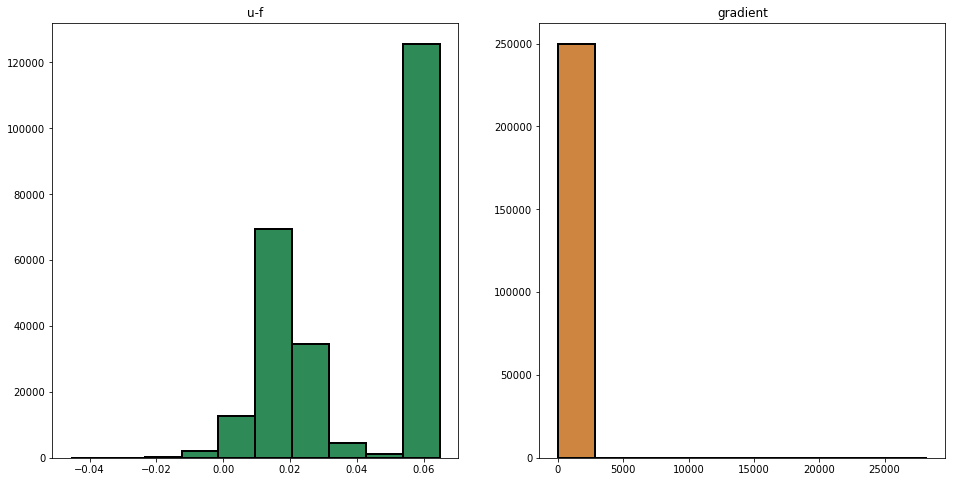

##########################################################################################
Processing 350 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 140100.
nfev: 140113

Residual stats:
Residual RMS: 0.007777130475949922
Residual Variance: 6.046715685075504e-05
Flux Lost: 0.014196919599787564
Flux Addition: 0.015135373917463262
psi1(u-f): 0.10208174057457942
Exceeded Pixels: 3717
Sharpness: 94.9397055278627
psi2(grad u): 2.0067389757644767
Total elapsed time: 661.4054353237152 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.025379170168249445
Mean min distance between collocation and cente

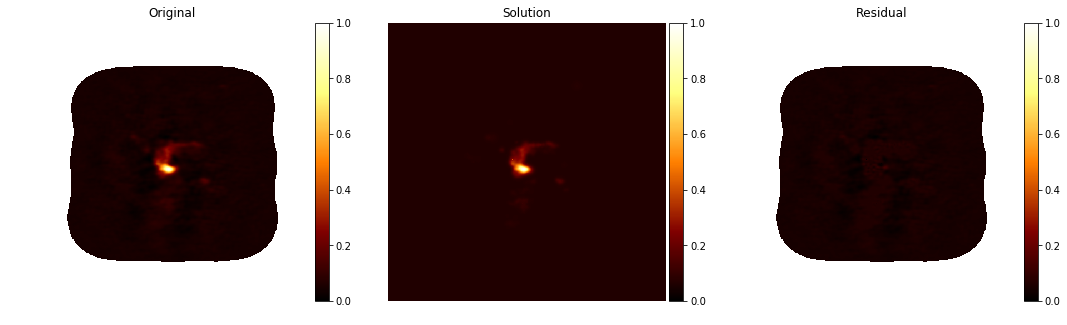

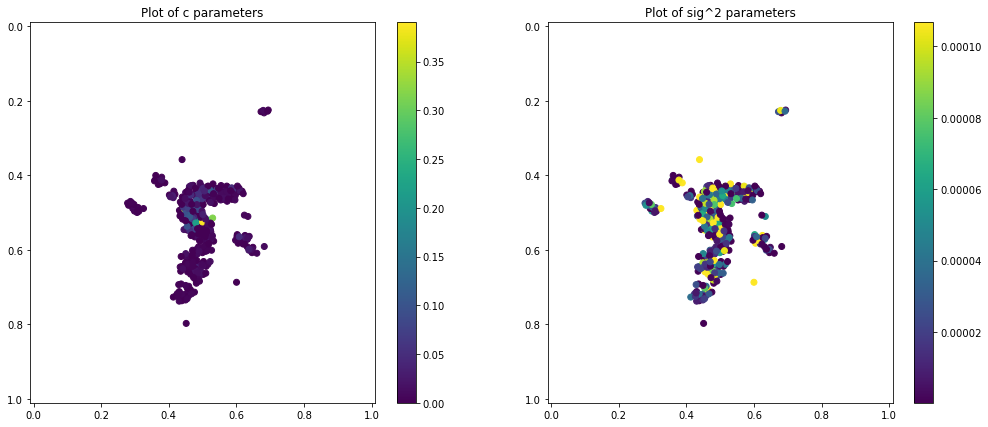

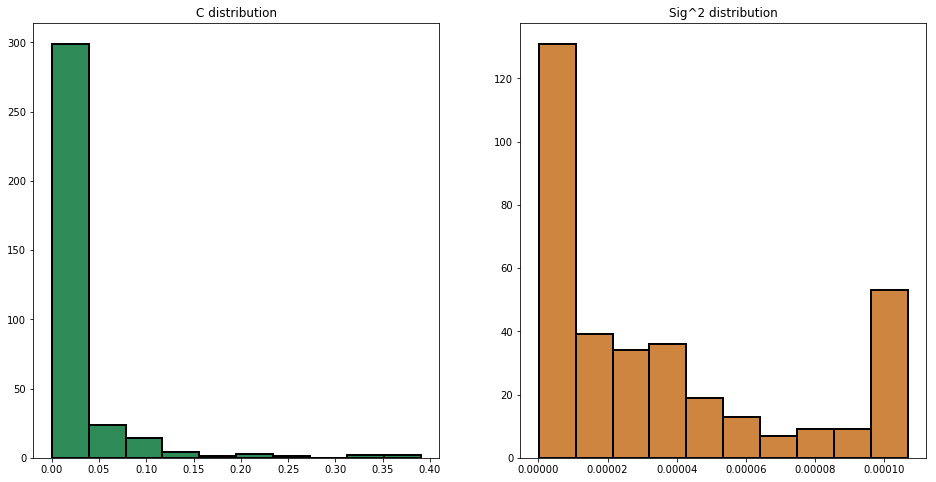

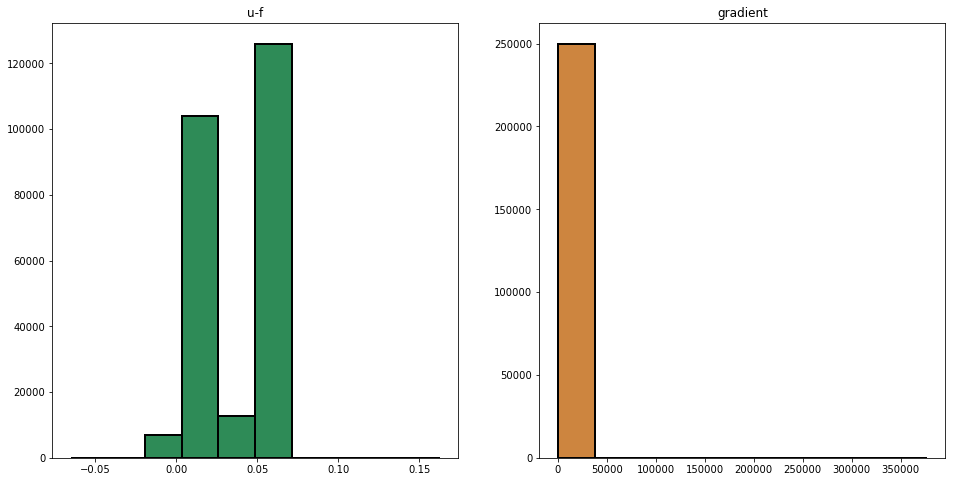

##########################################################################################
Processing 375 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 150100.
nfev: 150113

Residual stats:
Residual RMS: 0.006276812473433057
Residual Variance: 3.9358375826795904e-05
Flux Lost: 0.012699831787049969
Flux Addition: 0.014156507473221747
psi1(u-f): 0.030822522736882327
Exceeded Pixels: 3768
Sharpness: 95.11544645624883
psi2(grad u): 2.0288441565195963
Total elapsed time: 814.8442115783691 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.024057015582975967
Mean min distance between collocation and ce

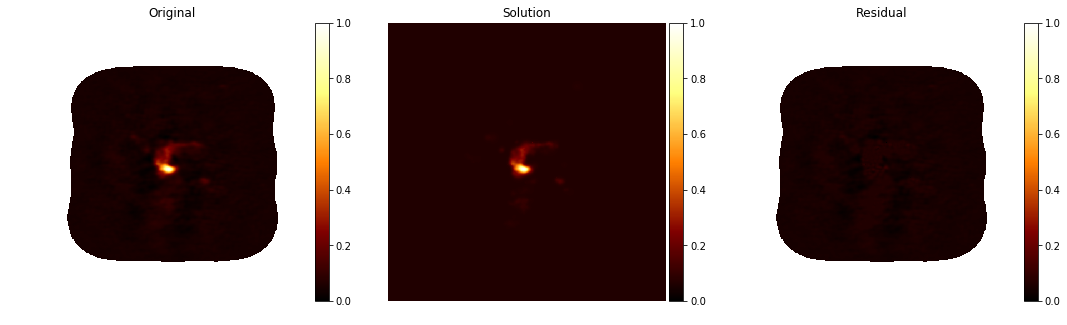

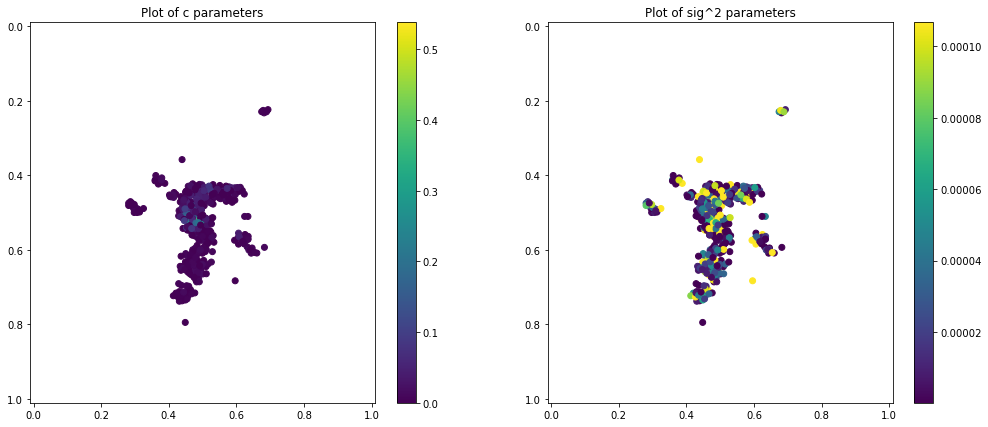

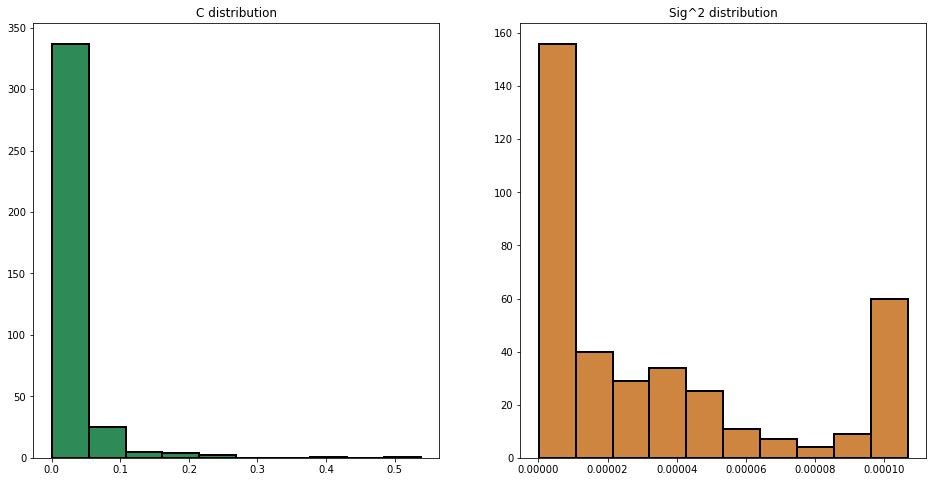

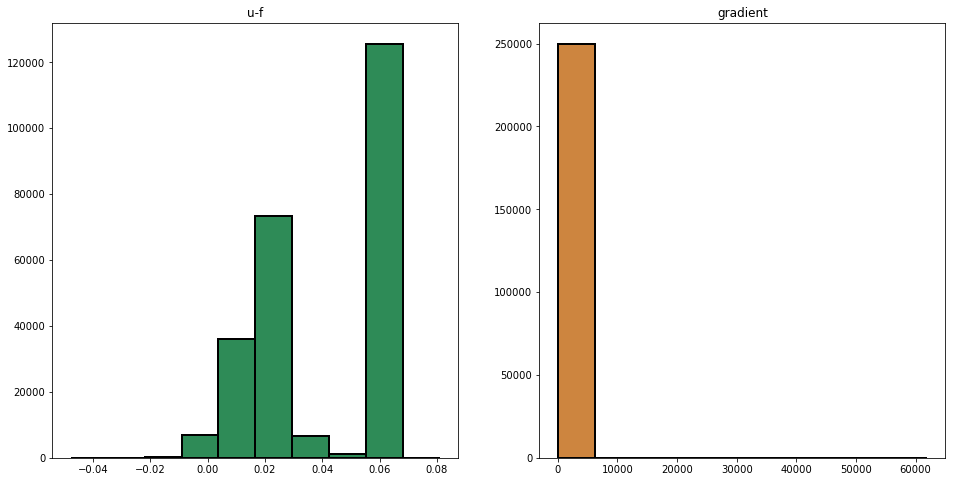

##########################################################################################
Processing 400 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 160100.
nfev: 160111

Residual stats:
Residual RMS: 0.005978042199625279
Residual Variance: 3.5706205462588376e-05
Flux Lost: 0.011732890402059321
Flux Addition: 0.013010782916061281
psi1(u-f): 0.028522502251811854
Exceeded Pixels: 3800
Sharpness: 94.87379947116989
psi2(grad u): 2.022221905300211
Total elapsed time: 967.7219476699829 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.02557118624392253
Mean min distance between collocation and cent

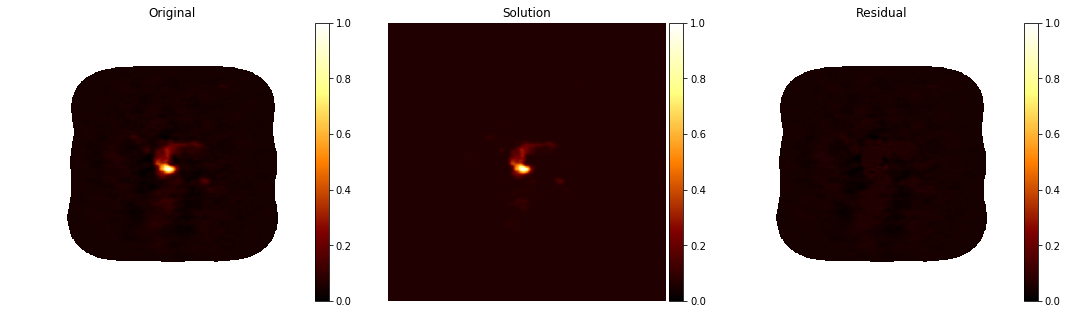

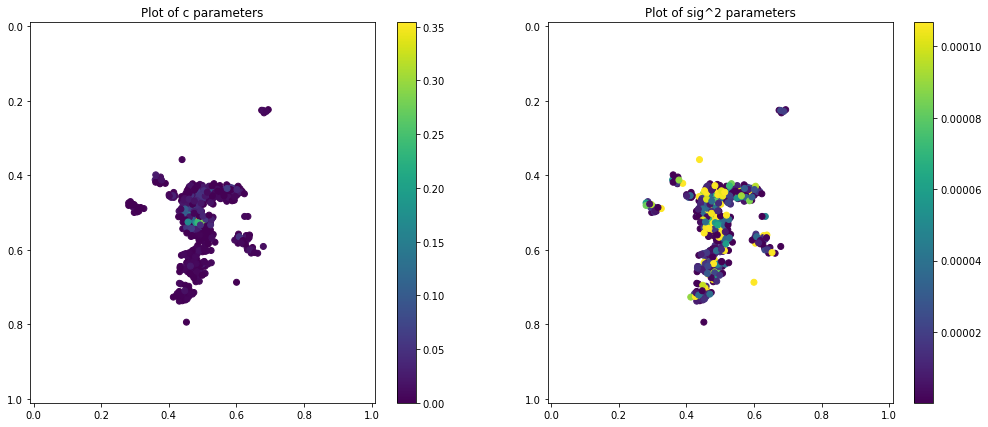

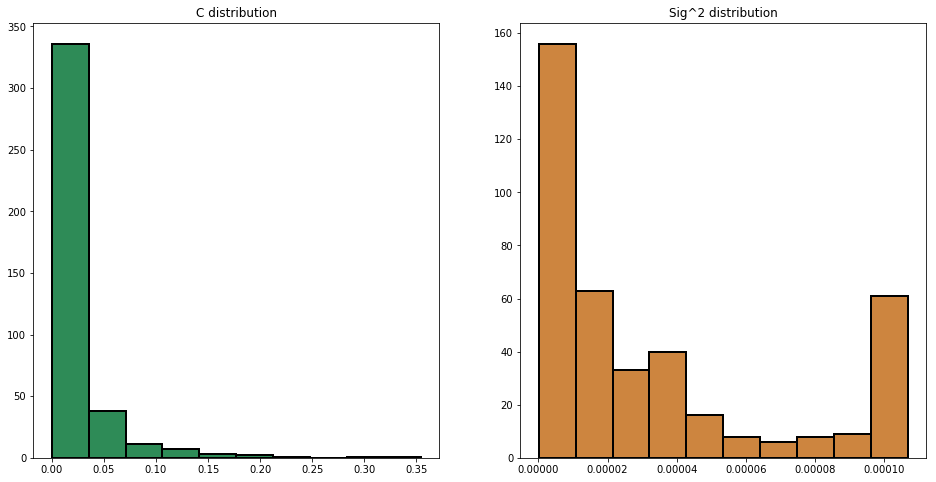

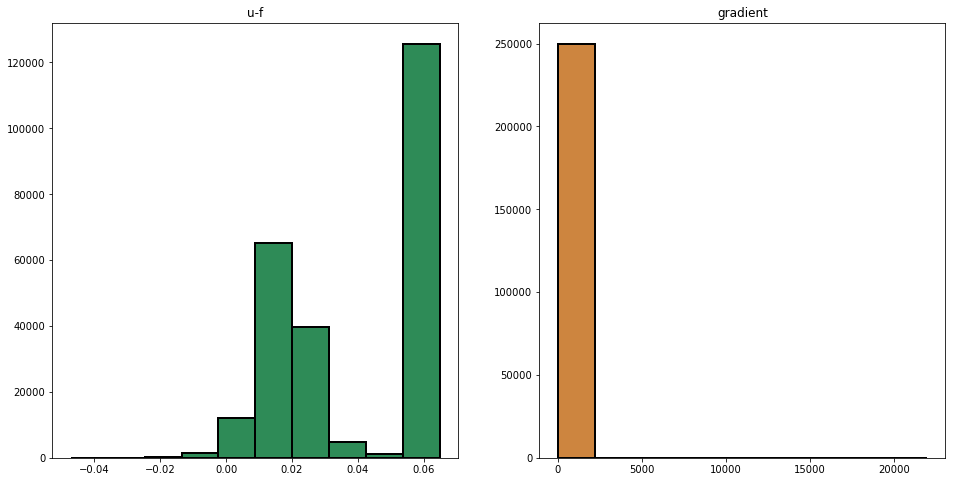

##########################################################################################
Processing 425 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 170100.
nfev: 170113

Residual stats:
Residual RMS: 0.005171201510896507
Residual Variance: 2.6719662461086932e-05
Flux Lost: 0.00946436225672829
Flux Addition: 0.010536359448709816
psi1(u-f): 0.015613677243046088
Exceeded Pixels: 3737
Sharpness: 95.25648662537651
psi2(grad u): 2.05444881035042
Total elapsed time: 1089.6335916519165 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.024579767953233675
Mean min distance between collocation and cent

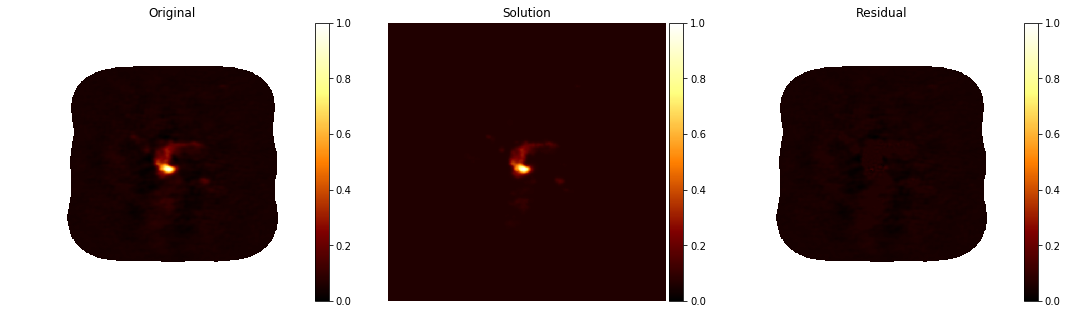

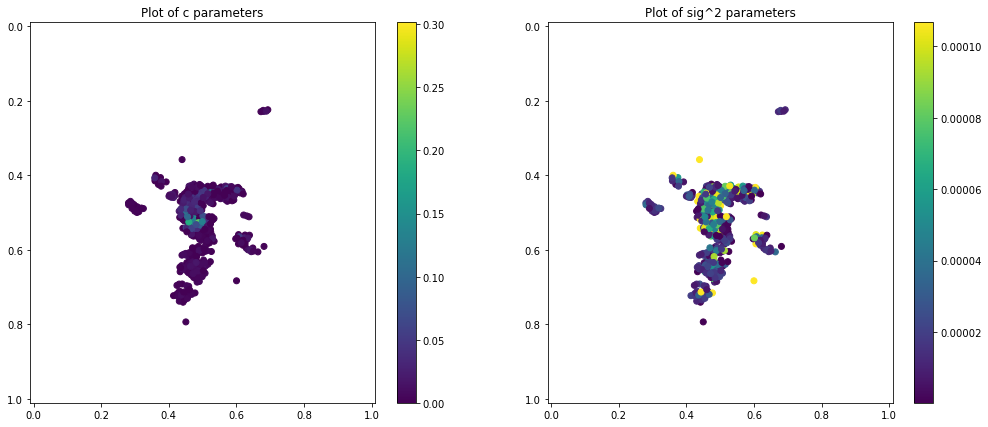

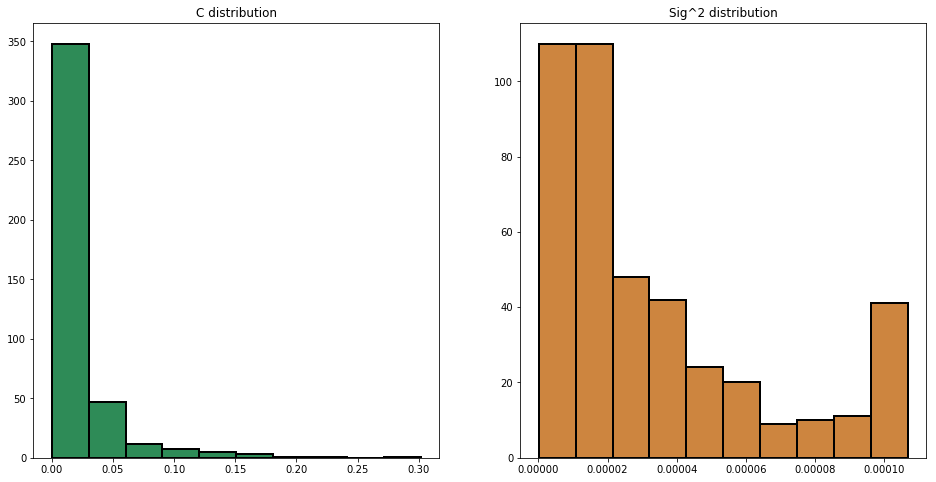

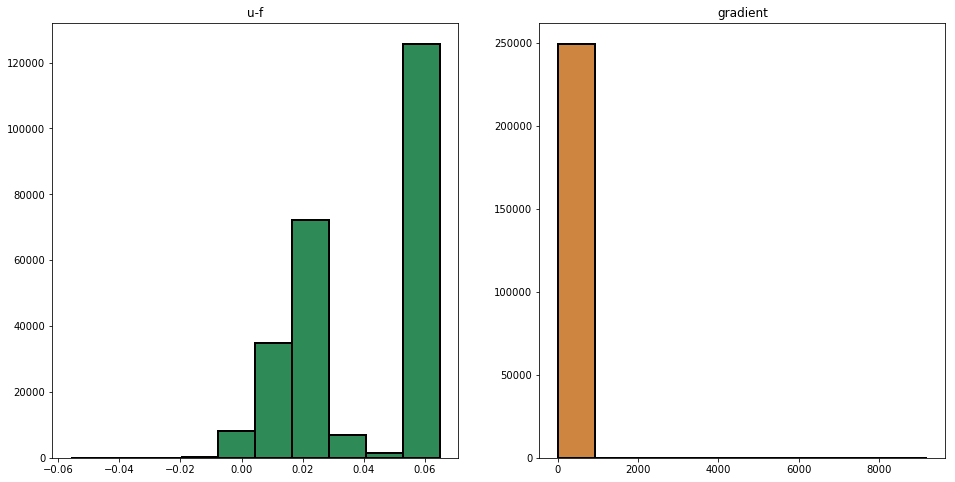

##########################################################################################
Processing 450 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 180100.
nfev: 180110

Residual stats:
Residual RMS: 0.004546758273802392
Residual Variance: 2.065487339162087e-05
Flux Lost: 0.008531532298809673
Flux Addition: 0.009512434989258845
psi1(u-f): 0.012435876965372083
Exceeded Pixels: 3802
Sharpness: 95.39761612823821
psi2(grad u): 2.058225494194323
Total elapsed time: 1281.6099076271057 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.034932738717044574
Mean min distance between collocation and cen

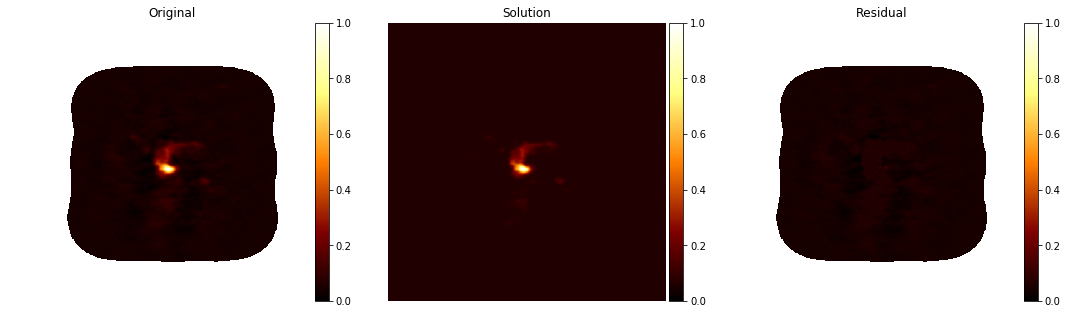

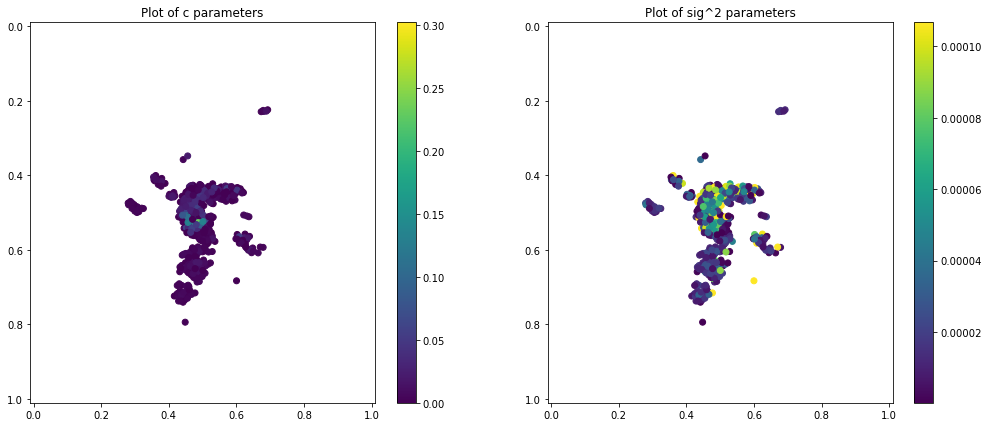

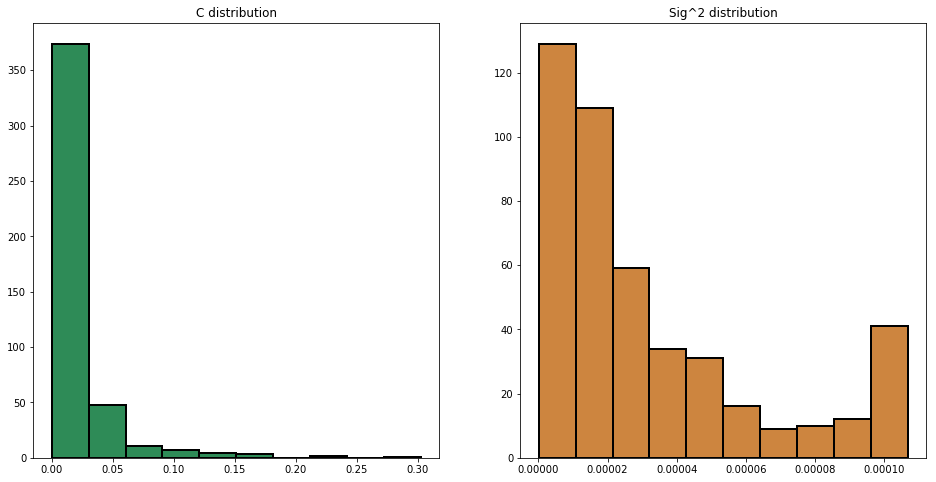

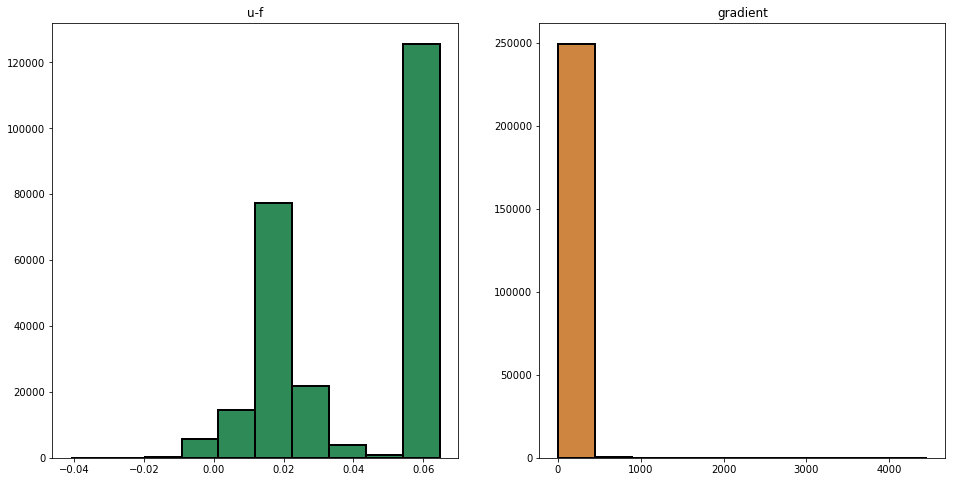

##########################################################################################
Processing 475 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 190100.
nfev: 190112

Residual stats:
Residual RMS: 0.003230173343713587
Residual Variance: 1.0424237589013312e-05
Flux Lost: 0.006642315315096863
Flux Addition: 0.007362688426032702
psi1(u-f): 0.0038876652400495052
Exceeded Pixels: 3727
Sharpness: 95.73414452802997
psi2(grad u): 2.078758087492512
Total elapsed time: 1476.1152865886688 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03515438862725504
Mean min distance between collocation and ce

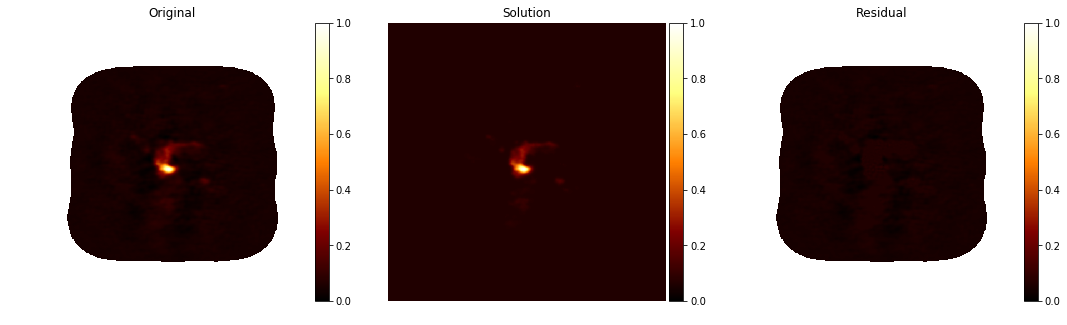

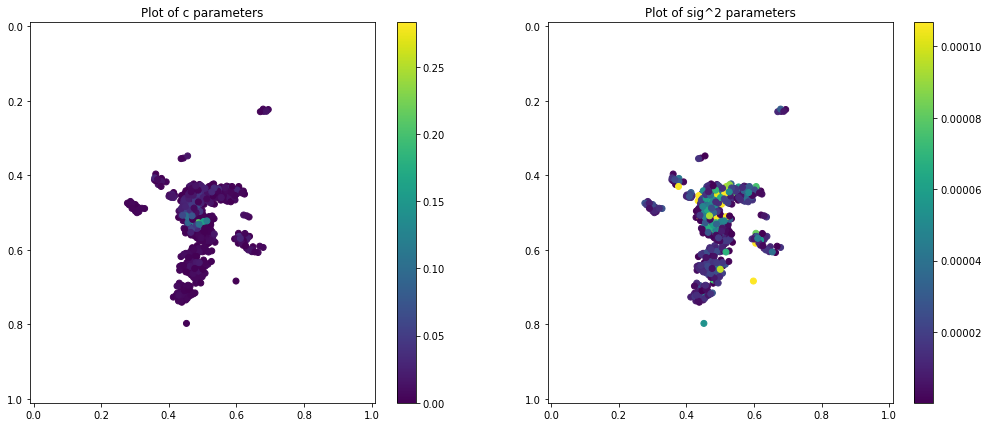

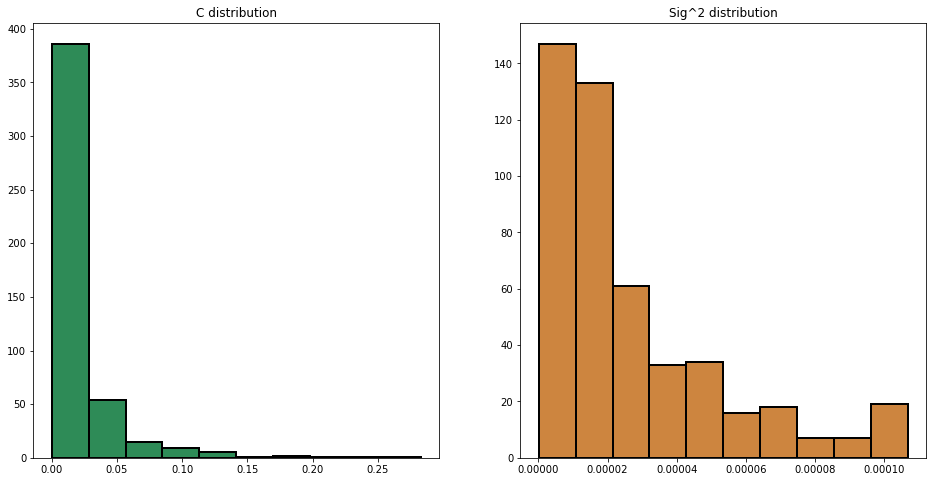

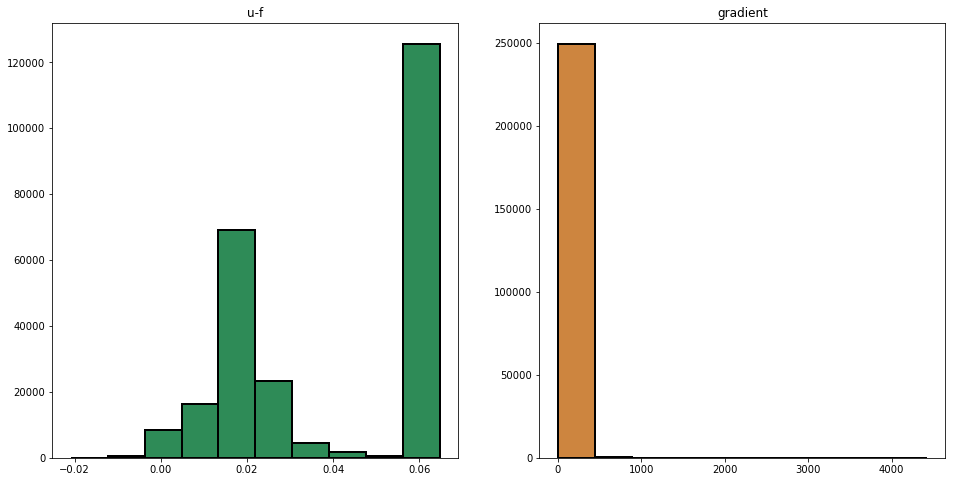

##########################################################################################
Processing 500 centers example
##########################################################################################


 
##########################################################################################
FINAL RESULTS:
##########################################################################################

Solver Output:
success: False
status: 5
message: Number of calls to function has reached maxfev = 200100.
nfev: 200112

Residual stats:
Residual RMS: 0.0024453803755821375
Residual Variance: 5.976667927196168e-06
Flux Lost: 0.005219661474768199
Flux Addition: 0.005632786007682912
psi1(u-f): 0.0018083585876305756
Exceeded Pixels: 3735
Sharpness: 95.69797014037033
psi2(grad u): 2.0978790592151744
Total elapsed time: 1501.337613105774 [s]

Coverage of solution:
Hausdorff distance between collocation and center points: 0.03231266225674085
Mean min distance between collocation and ce

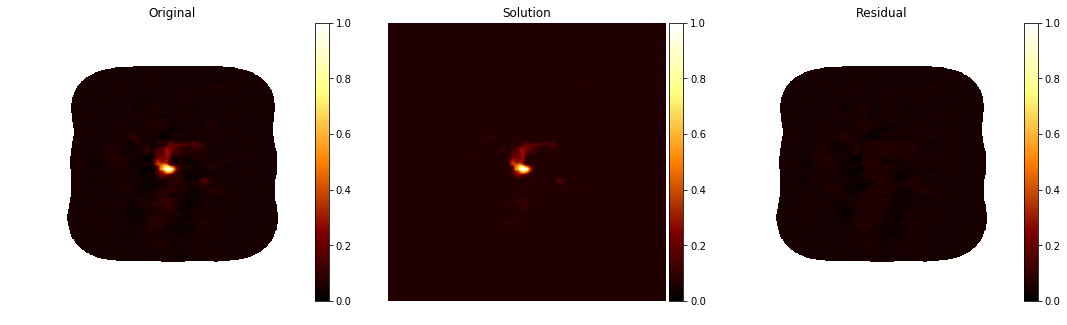

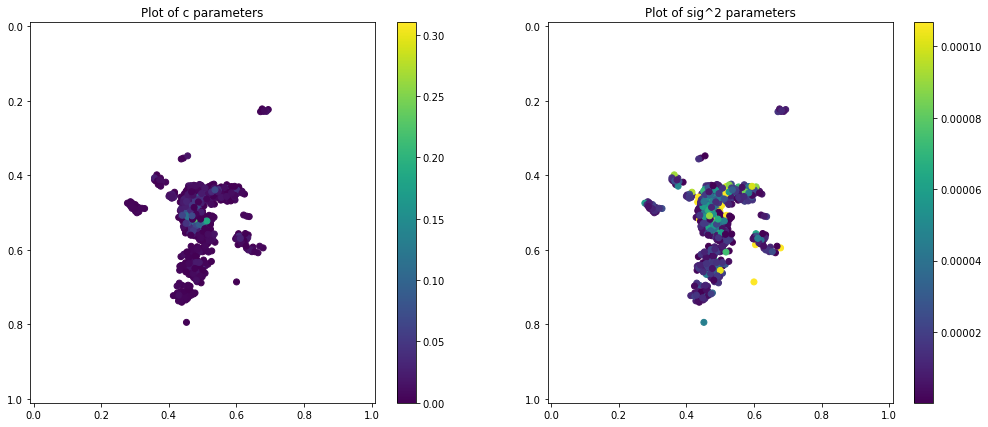

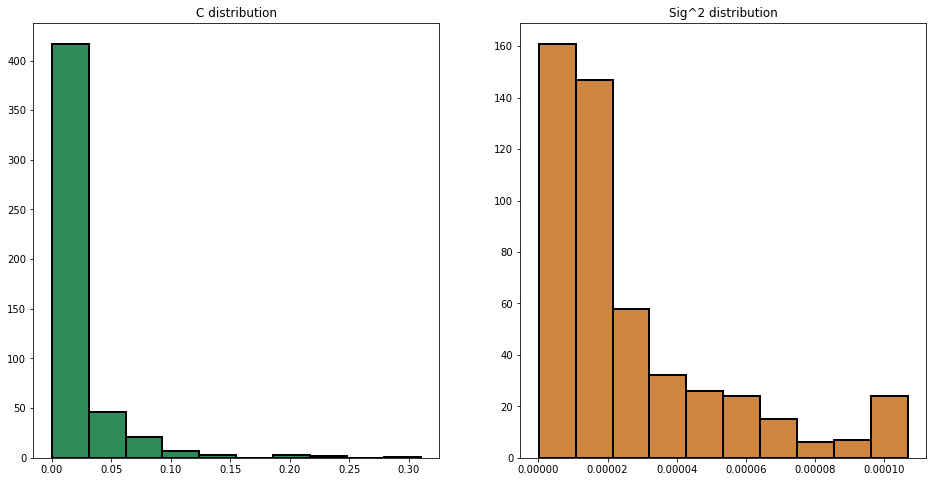

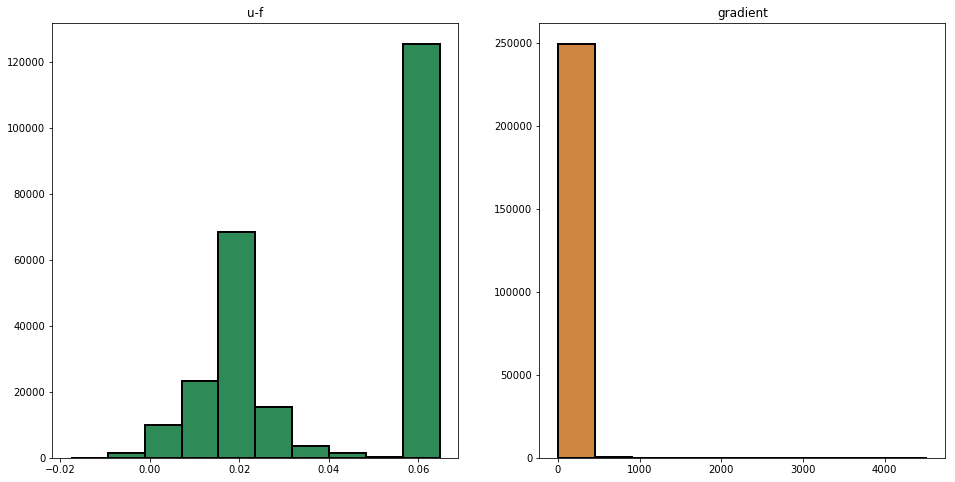

In [7]:
for elm in elm_list:
    print('#'*90)
    print('Processing {0} centers example'.format(len(elm.c)))
    print('#'*90 + '\n')
    nfev = 100*(len(elm.get_params())+1)
    elm_solver(elm, method='standard', max_nfev=nfev)
    # for memory reasons
    #del elm.data; del elm.mask; del elm.dfunc
    
# pickling results
target = open("../results/exp01_m{0}_antennae.pkl".format(method), "wb")
pickle.dump(elm_list, target)
target.close()

## Analysis of results in `Antennae North` (`method=1`)

In [4]:
elm_list = pickle.load( open('../results/exp01_m1_antennae.pkl', 'rb') )

n_center = np.array( [len(elm.c) for elm in elm_list] )
r_stats = [elm.residual_stats for elm in elm_list]
times = np.array([elm.elapsed_time for elm in elm_list])

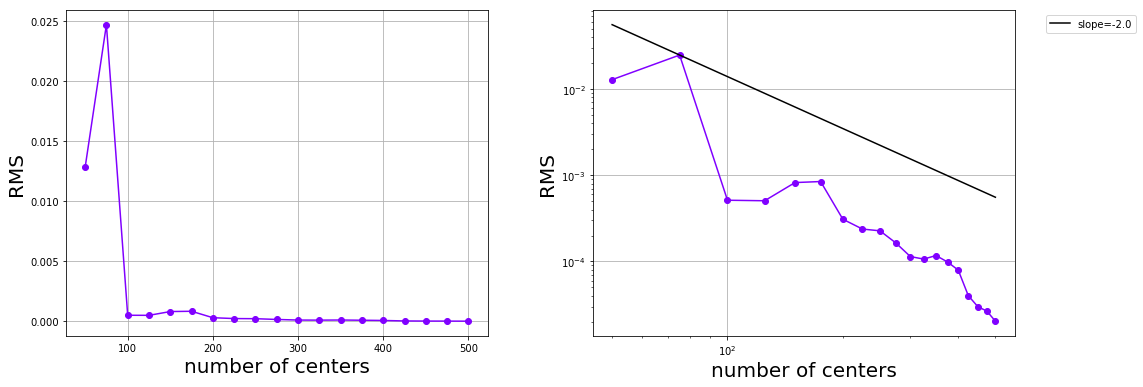

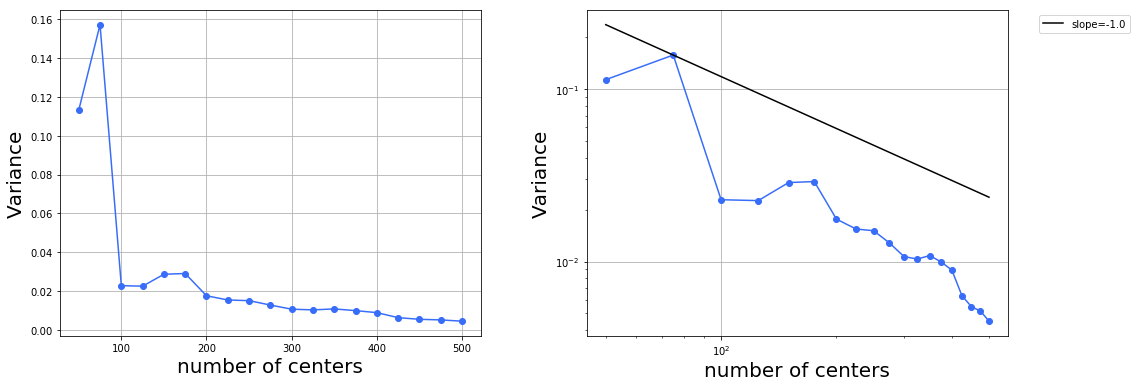

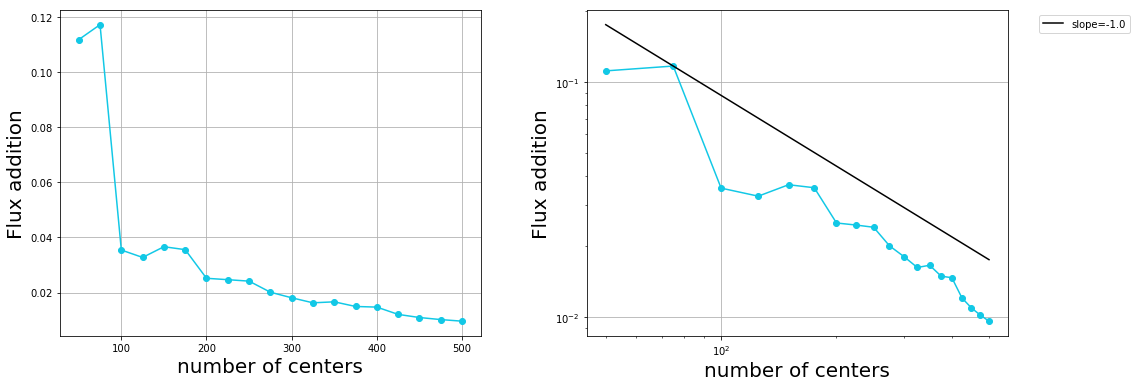

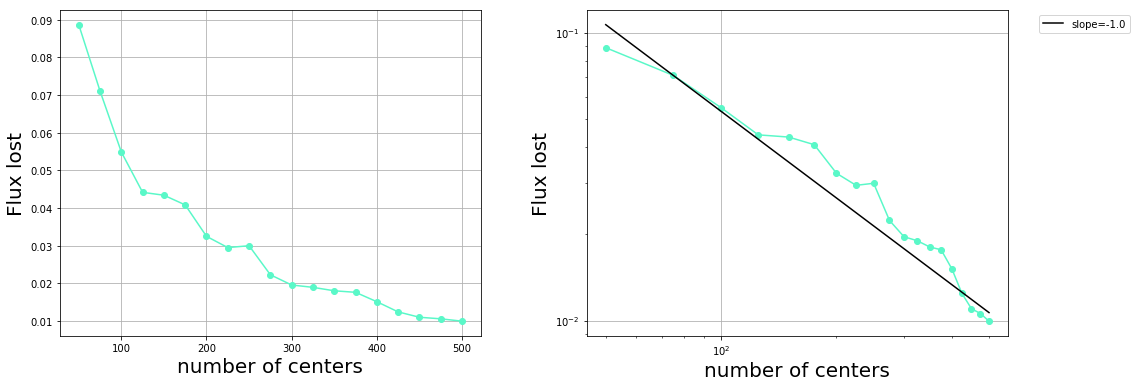

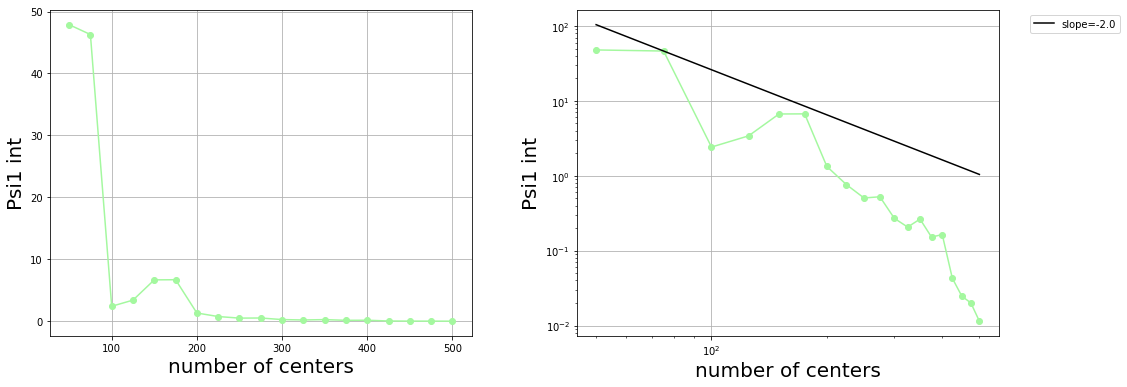

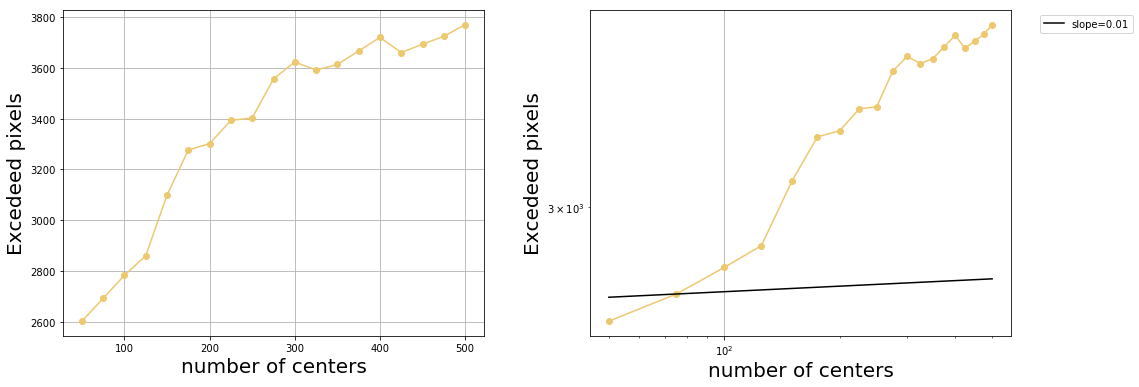

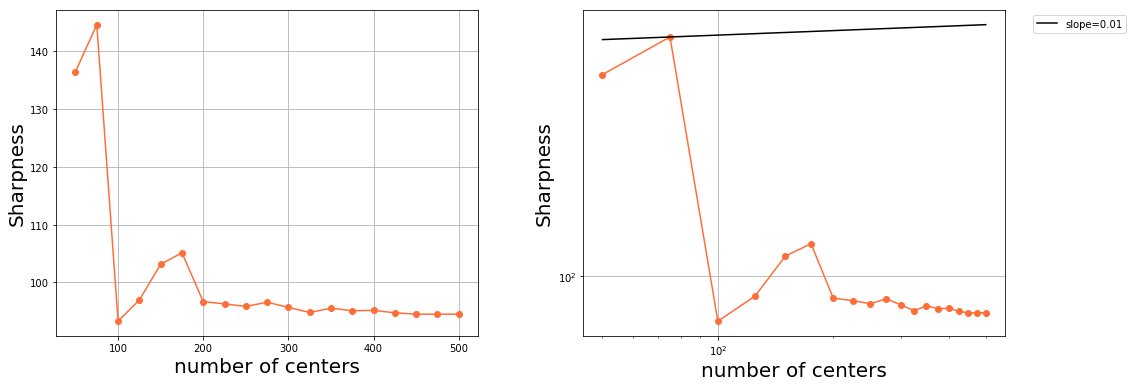

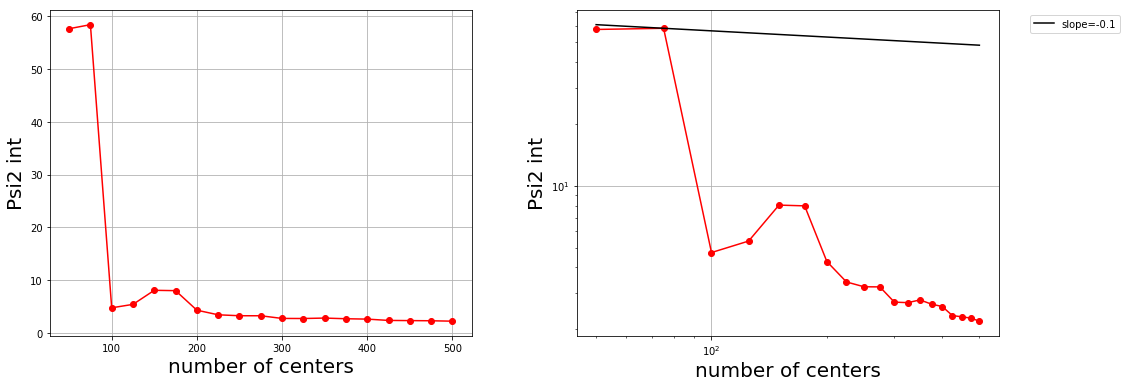

In [5]:
stats_plot(n_center, r_stats, x_label='number of centers', loglog=True, slopes=[-2.,-1.,-1.,-1.,-2.,0.01,0.01,-0.1])

## Analysis of results in `Antennae North` (`method=2`)

In [6]:
elm_list = pickle.load( open('../results/exp01_m2_antennae.pkl', 'rb') )

n_center = np.array( [len(elm.c) for elm in elm_list] )
r_stats = [elm.residual_stats for elm in elm_list]
times = np.array([elm.elapsed_time for elm in elm_list])

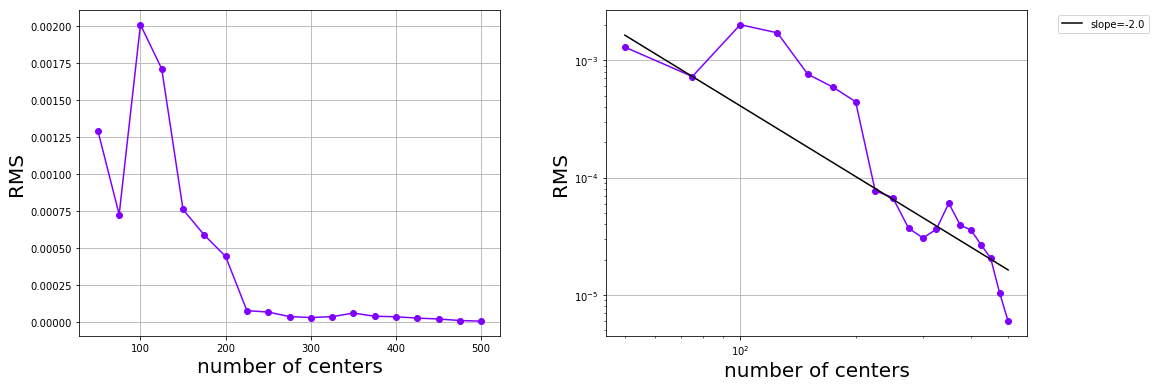

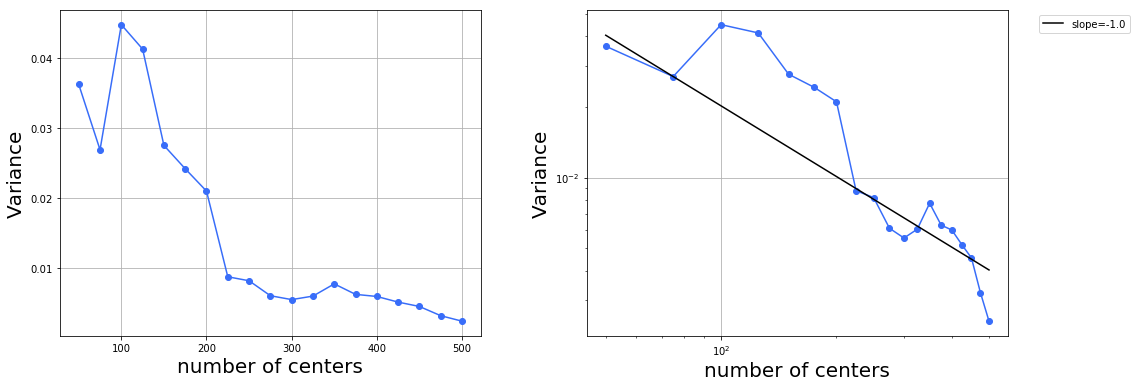

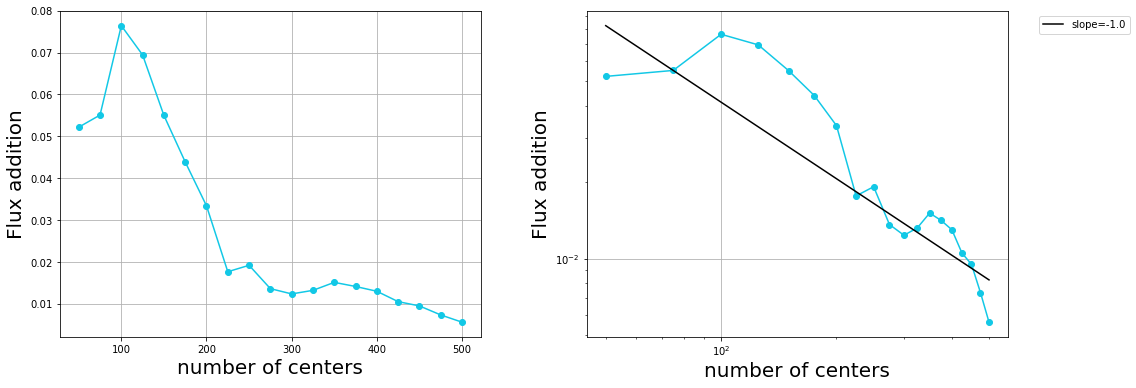

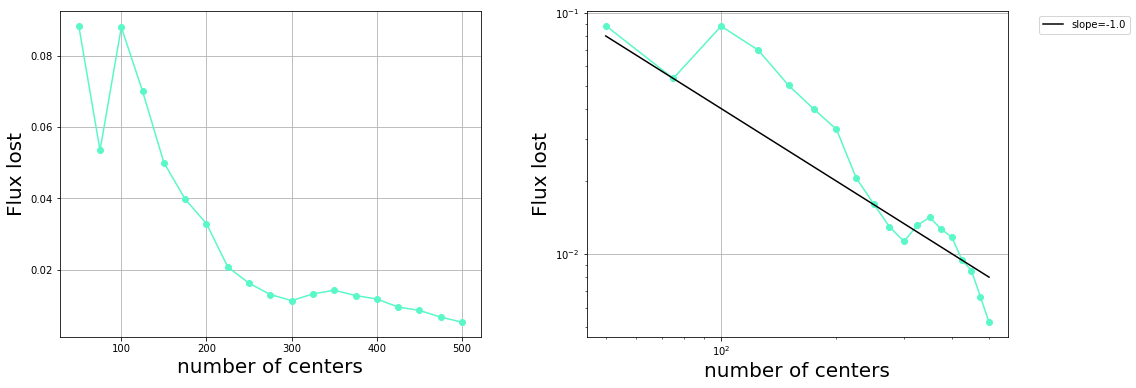

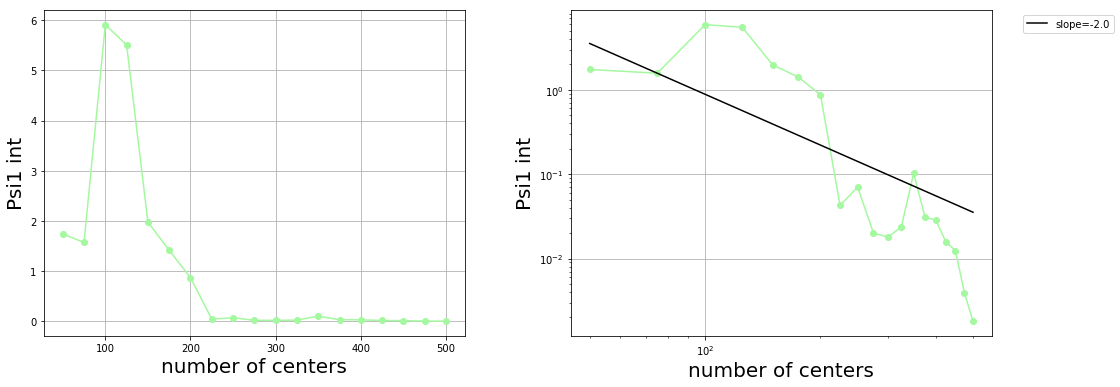

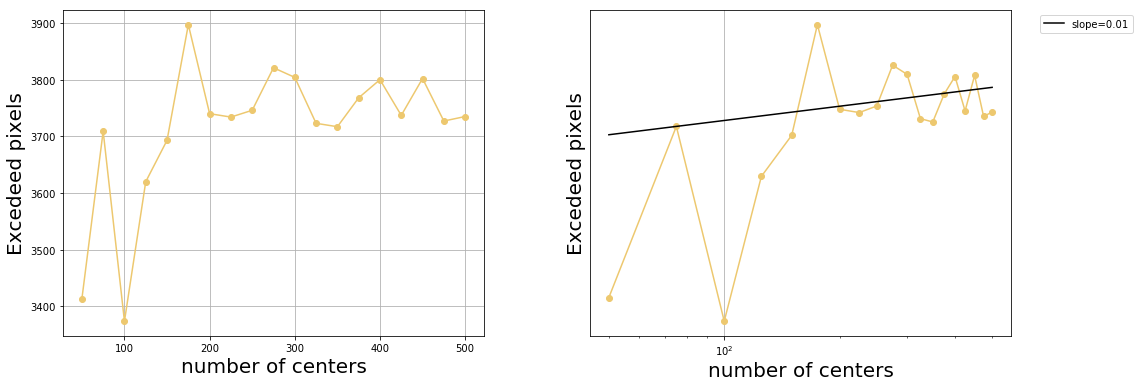

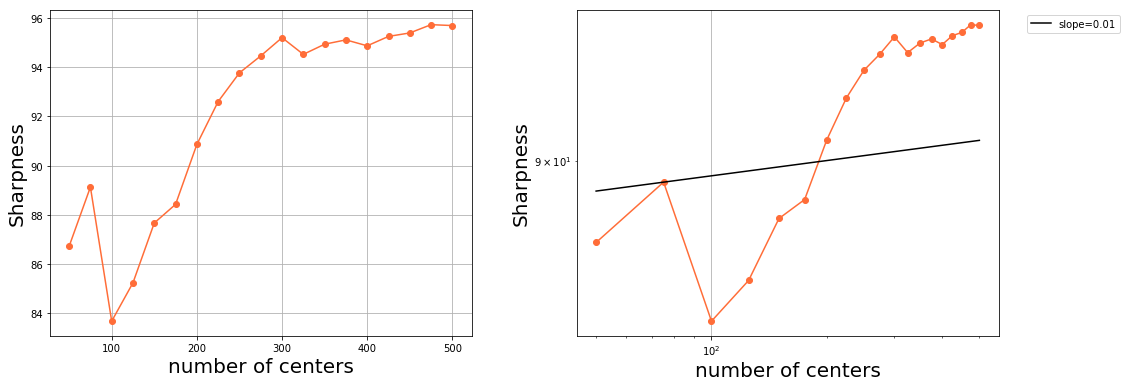

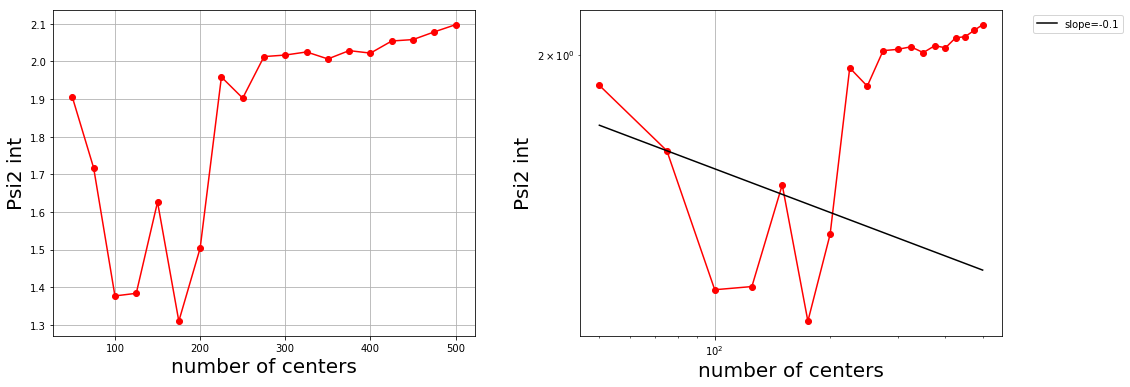

In [7]:
stats_plot(n_center, r_stats, x_label='number of centers', loglog=True, slopes=[-2.,-1.,-1.,-1.,-2.,0.01,0.01,-0.1])